# Unveiling the Secrets of Wine Quality

Bypassing traditional tasting methods, this project employs data analysis to predict the quality of wine based on its chemical features.

## 🍷 1. Introduction about the Data Set

### 📖 1.1 General Information:
- **Provided by**: [The UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/109/wine).
- **Donated by**: Paulo Cortez, Antonio Cerdeira, Fernando Almeida, Telmo Matos, and Jose Reis.
   - 📜 **Their paper**: [Modeling wine preferences by data mining from physicochemical properties](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf).
   - 🧐 **Main idea**: Using data mining to understand how various factors influence wine quality, offering insights into wine production and certification. 
   - ⚒️ **Approach**: Support Vector Machines (SVM), Neural Networks (NN), and Multiple Regression (MR) techniques.
   - 🧰 **Conclusion**: 
     - For assessing wine quality, the Support Vector Machine (SVM) method outperforms other techniques in accuracy, especially for white wines.
     - Alcohol level is a key factor in determining wine quality. Citric acid and residual sugar are more significant in white wines, whereas sulphates are highly important in both types.

### 🍇 1.2 Info about the Wine:
- **Types**: Both white and red wines from the Vinho Verde region in northwestern Portugal 🇵🇹.
- **Production**: Represents 15% of Portuguese production.

### 📊 1.3 Info about the Datasets:
- **Wines**: 1599 red and 4898 white samples.
- **Collection**:
   - ⏳ Timeframe: May 2004 to February 2007.
   - 🏷️ Type: Only protected designation of origin samples by CVRVV (Comissão de Viticultura da Região dos Vinhos Verdes), focused on enhancing the quality and marketing of vinho verde.
- **Quality Assessment**:
   - Rated by at least three sensory assessors (blind tastes), on a 0 (very bad) to 10 (excellent) scale. The final score is the median of these ratings.
- **Chemical Features Tested**:
   - 🧪 Data recorded by iLab, a computerized system managing wine sample testing.
   - Tests include density, alcohol, pH values, etc.
- **Limitation**:
  - Lack of Temporal Information:
    - We are unable to analyze variations in wine quality across different years, also making it impossible for us to identify the relationship between weather conditions and wine quality.
  - Lack of Brand and Public Preference Data: 
    - We are unable to establish a direct link between wine quality attributes and consumer preferences or sales performance. 

## 2. Research Questions and Motivations

### 2.1 Research Questions
Our reserach questions enhances and expands upon prior studies by:
  
- 🛠️ **Model Predicting Quality of Wine**: Developing a systematic pipeline to contrast various models based on linear model. This includes tuning hyperparameters and evaluating performance scores.
- 🍇 **Quality Wine Recipes**: Based on the models and their performance we try to create the list of the most important feature influancing the quality of wine for both **top-quality** and **poor-quality wines**.

### 2.2 Motivations:
- **Cultural Significance**: Residing in France, a nation celebrated for its wine tradition, we seek to deepen our understanding of wine. This analysisfosters a greater appreciation of this heritage.
- 🍾 **Enhancing Wine Production:** Providing actionable insights for quality improvement through advanced statistical and machine learning techniques.
- 📊 **Analytical Depth:** Leveraging data-driven methods to explore wine quality nuances. This exploration will enhance our analytical skills while shedding light on hidden characteristics within wines.

## 3. Data Analysis

In [508]:
#from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

from sklearn import metrics

from scipy.stats import zscore
from scipy.stats import pearsonr
import scipy.stats as stats

### 3.1 Extract Data: Reading from CSV Files

In [509]:
# These csv files are downloaded from the UCI website.

df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")

df_red_wine = pd.read_csv("data/winequality-red.csv",sep=";")

df_red_wine
df_white_wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [678]:
df_white_wine.sort_values(['alcohol'])

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3265            4.2             0.215         0.23            5.10      0.041   
2625            4.5             0.190         0.21            0.95      0.033   
3839            6.2             0.310         0.23            3.30      0.052   
4020            6.4             0.370         0.12            5.90      0.056   
3835            6.2             0.310         0.23            3.30      0.052   
...             ...               ...          ...             ...        ...   
3904            5.0             0.455         0.18            1.90      0.036   
2945            4.9             0.330         0.31            1.20      0.016   
1099            5.8             0.290         0.21            2.60      0.025   
4503            5.8             0.610         0.01            8.40      0.041   
3918            6.4             0.350         0.28            1.60      0.037   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3265                 64.0                 157.0  0.99688  3.42       0.44   
2625                 89.0                 159.0  0.99332  3.34       0.42   
3839                 34.0                 113.0  0.99429  3.16       0.48   
4020                  6.0                  91.0  0.99536  3.06       0.46   
3835                 34.0                 113.0  0.99429  3.16       0.48   
...                   ...                   ...      ...   ...        ...   
3904                 33.0                 106.0  0.98746  3.21       0.83   
2945                 39.0                 150.0  0.98713  3.33       0.59   
1099                 12.0                 120.0  0.98940  3.39       0.79   
4503                 31.0                 104.0  0.99090  3.26       0.72   
3918                 31.0                 113.0  0.98779  3.12       0.40   

      alcohol  quality  color  
3265     8.00        3      2  
2625     8.00        5      2  
3839     8.40        5      2  
4020     8.40        4      2  
3835     8.40        5      2  
...       ...      ...    ...  
3904    14.00        7      2  
2945    14.00        8      2  
1099    14.00        7      2  
4503    14.05        7      2  
3918    14.20        7      2  

[4898 rows x 13 columns]

In [511]:
df_red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [512]:
wine_lists = [df_red_wine, df_white_wine]

df_white_wine.wine_type = "White Wine"
df_red_wine.wine_type = "Red Wine"

def get_wine_str(wine_type_df):
    return getattr(wine_type_df, 'wine_type', "Unknown Wine")

### 3.2 Transformation

Here we want to create QQ Plots to understand if the features follow normal distribution or not.

In [513]:
def check_numeric_columns(wine_type_df):
    return wine_type_df.select_dtypes(include=[np.number]).columns

In [666]:
## Q-Q 
# boxplot - log scale 

def create_qq_plot(wine_type_df):
    wine_type = get_wine_str(wine_type_df)

    # Select only the numerical columns from the DataFrame
    numeric_columns = check_numeric_columns(wine_type_df)

    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    # Loop over the numerical columns and create a Q-Q plot for each
    for i, column in enumerate(numeric_columns):  
        
        data = wine_type_df[column]
        axs[i].hist(data, bins=20, color='skyblue', edgecolor='black')
        axs[i].set_title(column, fontsize=16)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')
        #data = wine_type_df[column]
        #stats.probplot(data, dist="norm", plot=axs[i])
        #axs[i].set_title(column, fontsize = 16)
        #3axs[i].set_xlabel('')
        #axs[i].set_ylabel('')

    # Adjust layout to prevent overlap
    fig.suptitle(f"QQ Plots for {wine_type}", fontsize=20, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [669]:
def create_plots(plot_function, list = df_white_wine):
    for i in list:
        plot_function(i)

IndexError: index 12 is out of bounds for axis 0 with size 12

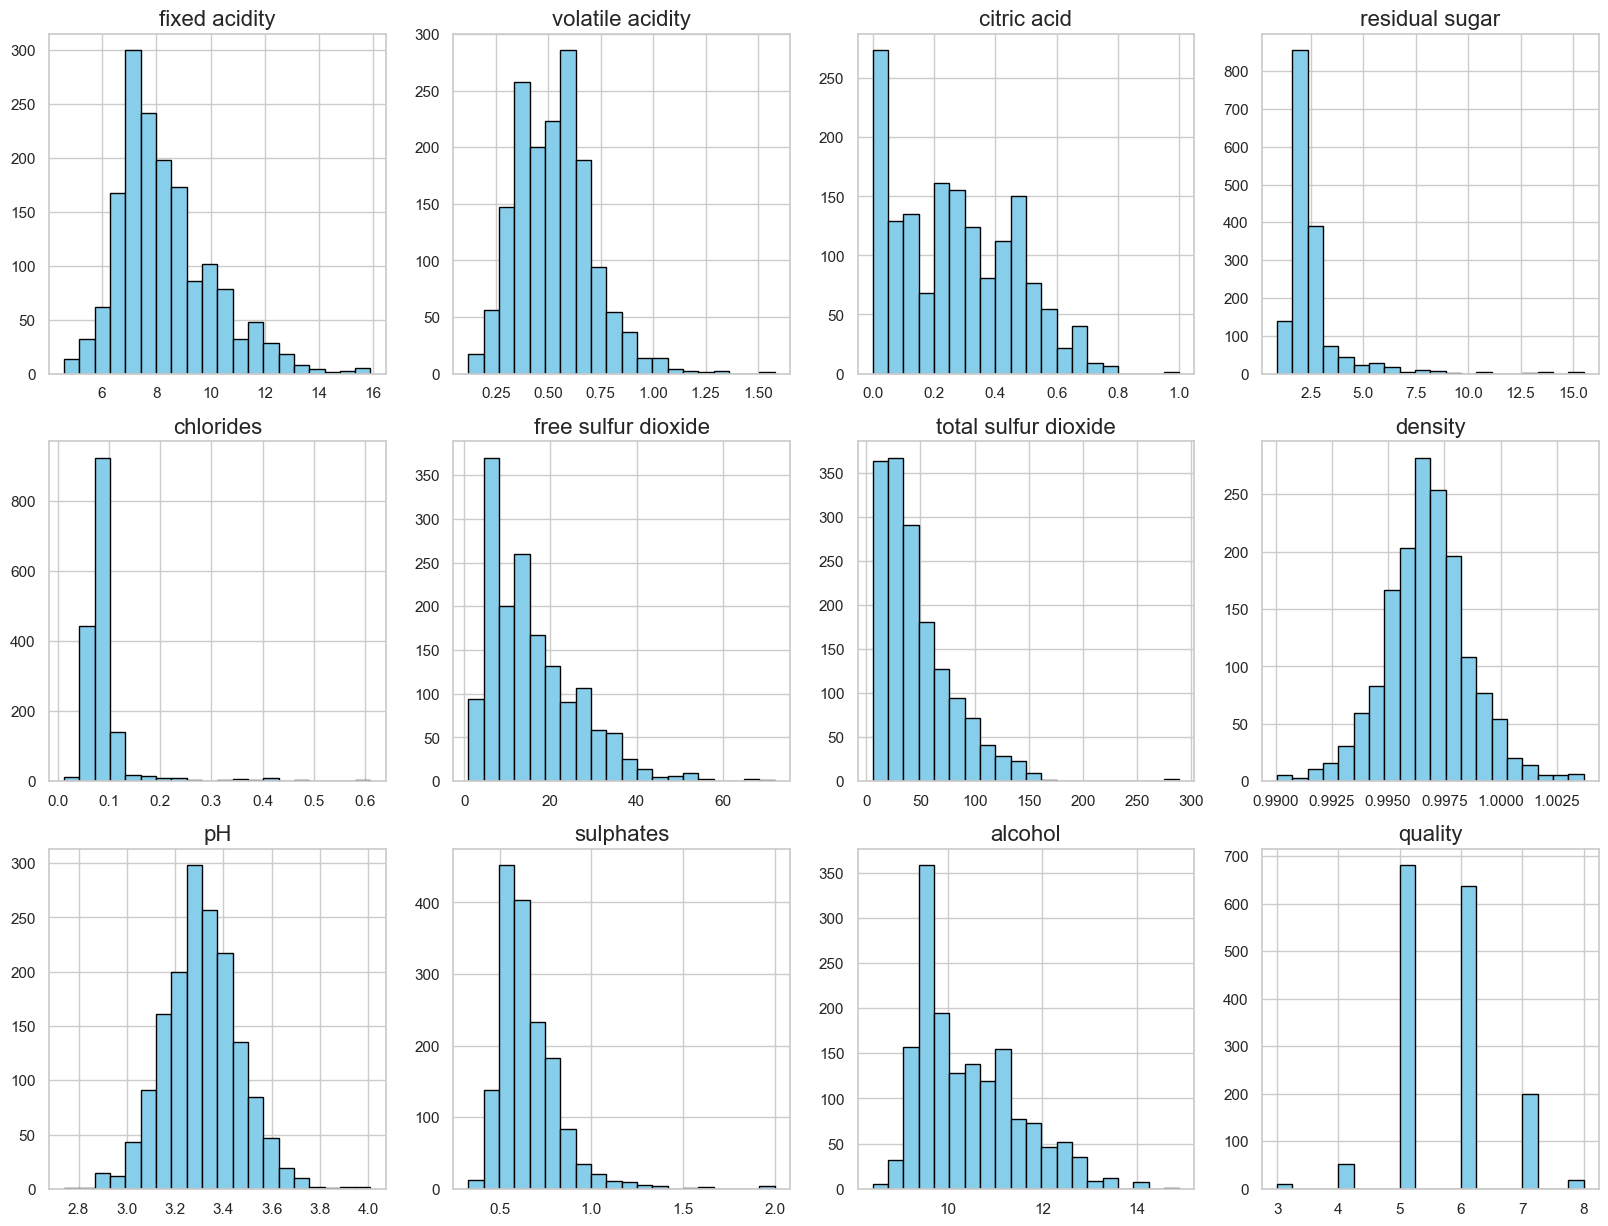

In [672]:
create_qq_plot(df_red_wine)

### Observations from QQ Plots of Red and White Wine Datasets:

1. **Right Skewness**:
   - **Red Wine**: `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.
   - **White Wine**: Similar to Red Wine, `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.

2. **Left Skewness**:
   - **Red Wine**: `Free Sulfur Dioxide`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.
   - **White Wine**: `Volatile Acidity`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.

3. **Implications for Data Processing**:
   - The observed skewness in both datasets suggests the need for normalization transformations. We will continue to calculate skewness coefficient. 
   - Techniques like logarithmic or Box-Cox transformations may be beneficial to address these deviations and improve the homogeneity of the data.

In [517]:
def calculate_skewness_coefficient(wine_type_df):

    print(f"\nThe skewness coefficient of {get_wine_str(wine_type_df)}: \n")

    numerical_columns = wine_type_df.select_dtypes(include=['number']).columns

    for column in numerical_columns:  
        skewness = round(wine_type_df[column].skew(),2)
        print(f"{column}: {skewness}")

In [518]:
create_plots(calculate_skewness_coefficient, wine_lists)


The skewness coefficient of Red Wine: 

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 4.54
chlorides: 5.68
free sulfur dioxide: 1.25
total sulfur dioxide: 1.52
density: 0.07
pH: 0.19
sulphates: 2.43
alcohol: 0.86
quality: 0.22

The skewness coefficient of White Wine: 

fixed acidity: 0.65
volatile acidity: 1.58
citric acid: 1.28
residual sugar: 1.08
chlorides: 5.02
free sulfur dioxide: 1.41
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


**Observations from the skewness coefficient**

1. **White Wine**:
   - Chlorides (5.02): Highly skewness. 
   - Volatile Acidity (1.58), Citric Acid (1.28), Residual Sugar (1.08), Free Sulfur Dioxide (1.41): : Moderate skewness.
2. **Red Wine**:
   - Residual Sugar (4.54) and Chlorides (5.68): Highly skewness
   - Free Sulfur Dioxide (1.25), Total Sulfur Dioxide (1.52), Sulphates (2.43): Moderate skewness.

We are going to do log transformation for features of highly skewness and moderate skewness.

In [519]:
white_wine_log_columns = [
    'chlorides',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'free sulfur dioxide'
]

red_wine_log_columns = [
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'sulphates'
]

log_red_wine_df = df_red_wine.copy()
log_white_wine_df = df_white_wine.copy()

log_red_wine_df[red_wine_log_columns] = np.log(log_red_wine_df[red_wine_log_columns] + 0.001)
log_white_wine_df[white_wine_log_columns] = np.log(log_white_wine_df[white_wine_log_columns]+ 0.001)

log_red_wine_df.wine_type = "Red Wine(Log)"
log_white_wine_df.wine_type = "White Wine(Log)"

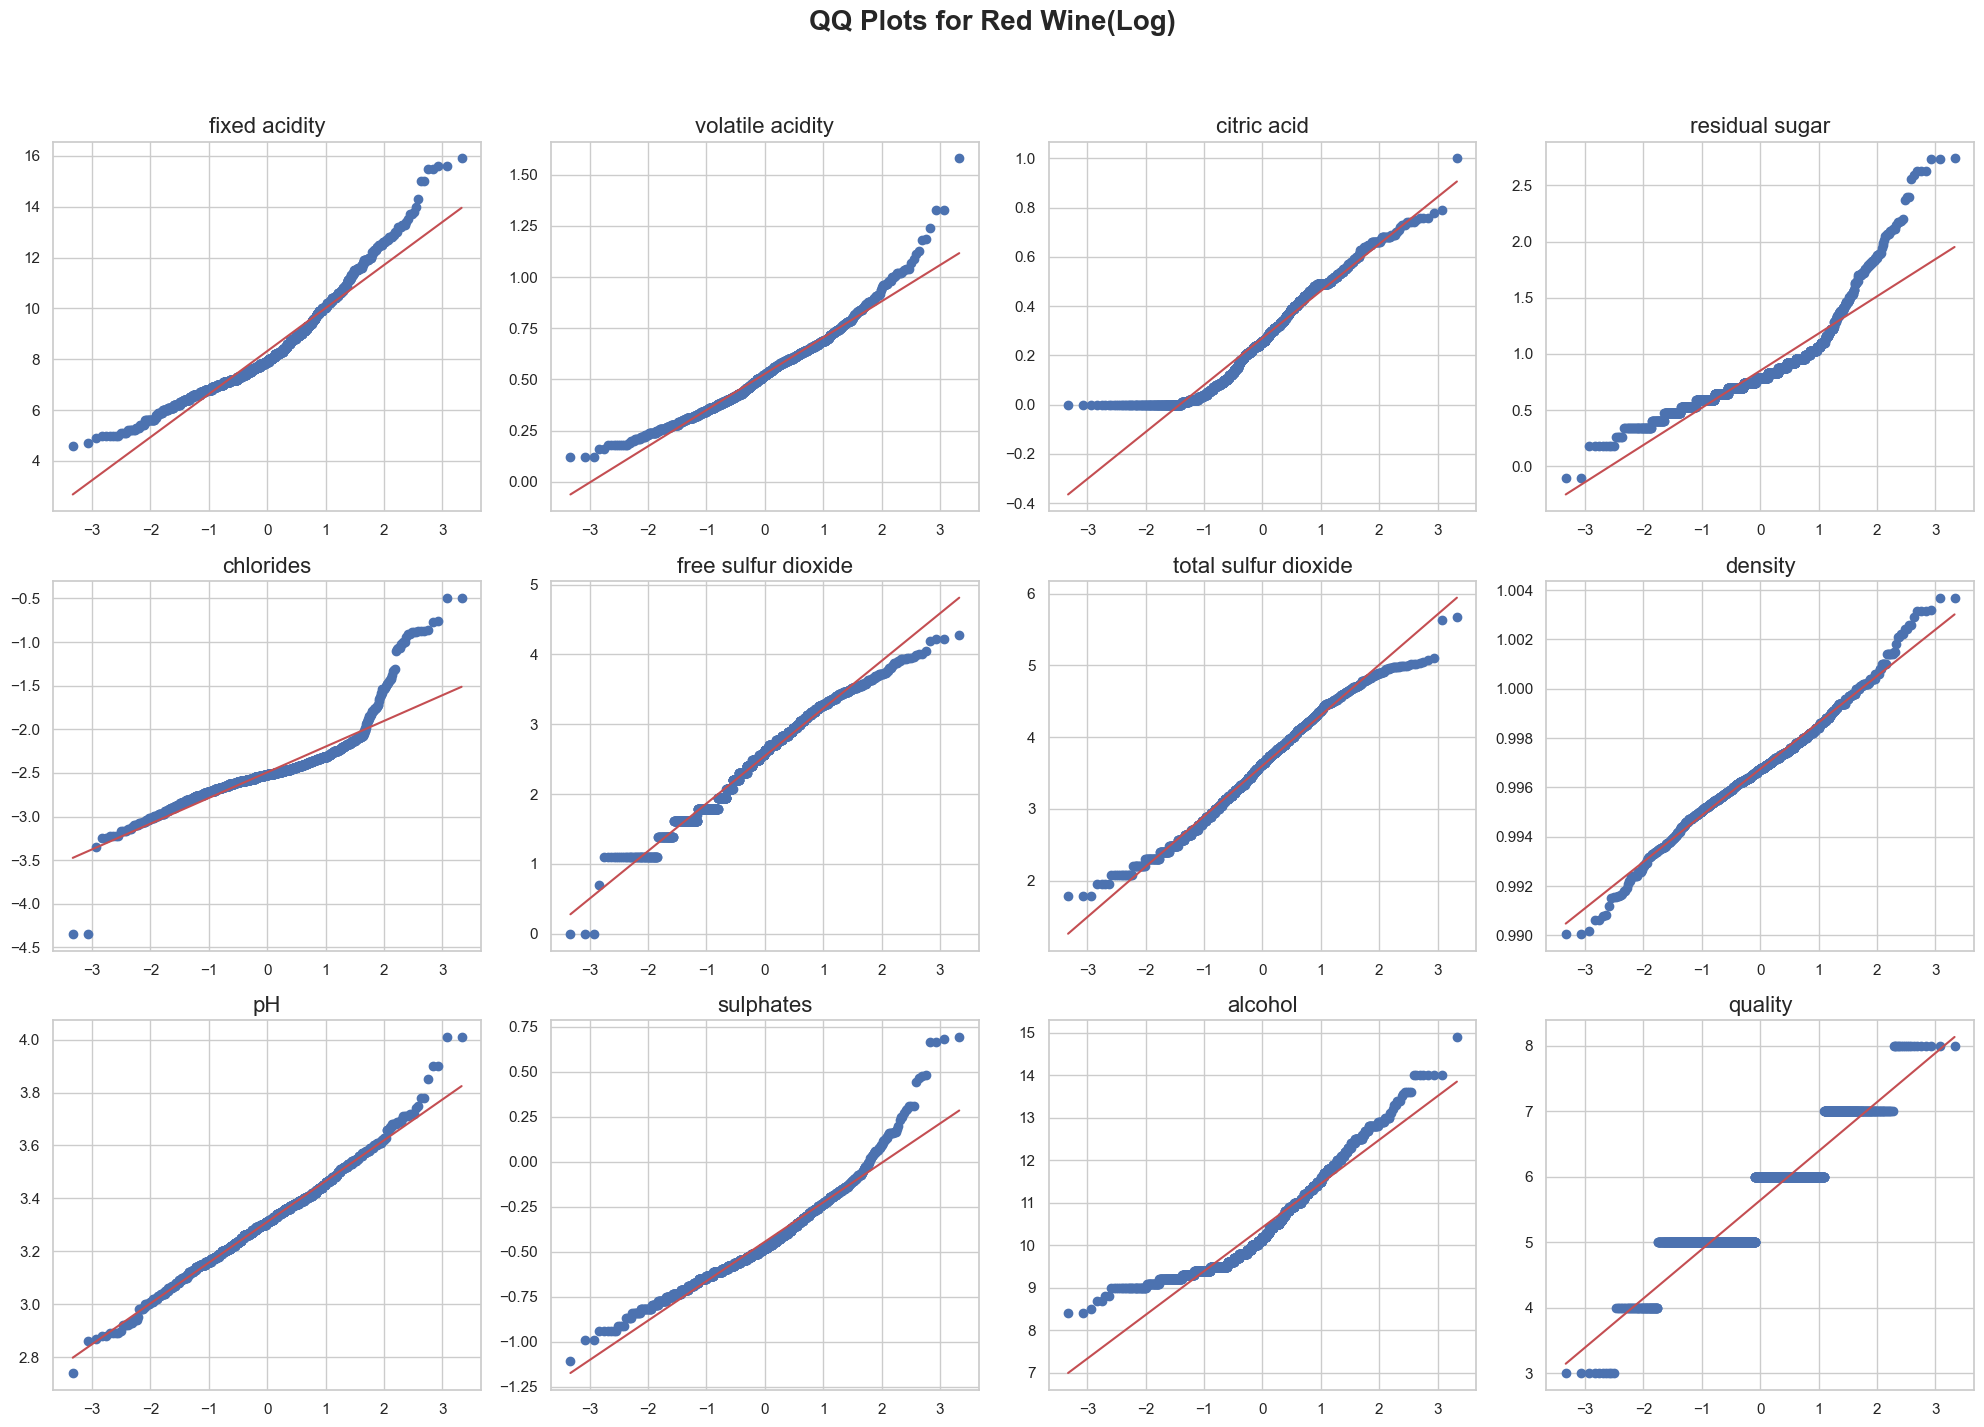

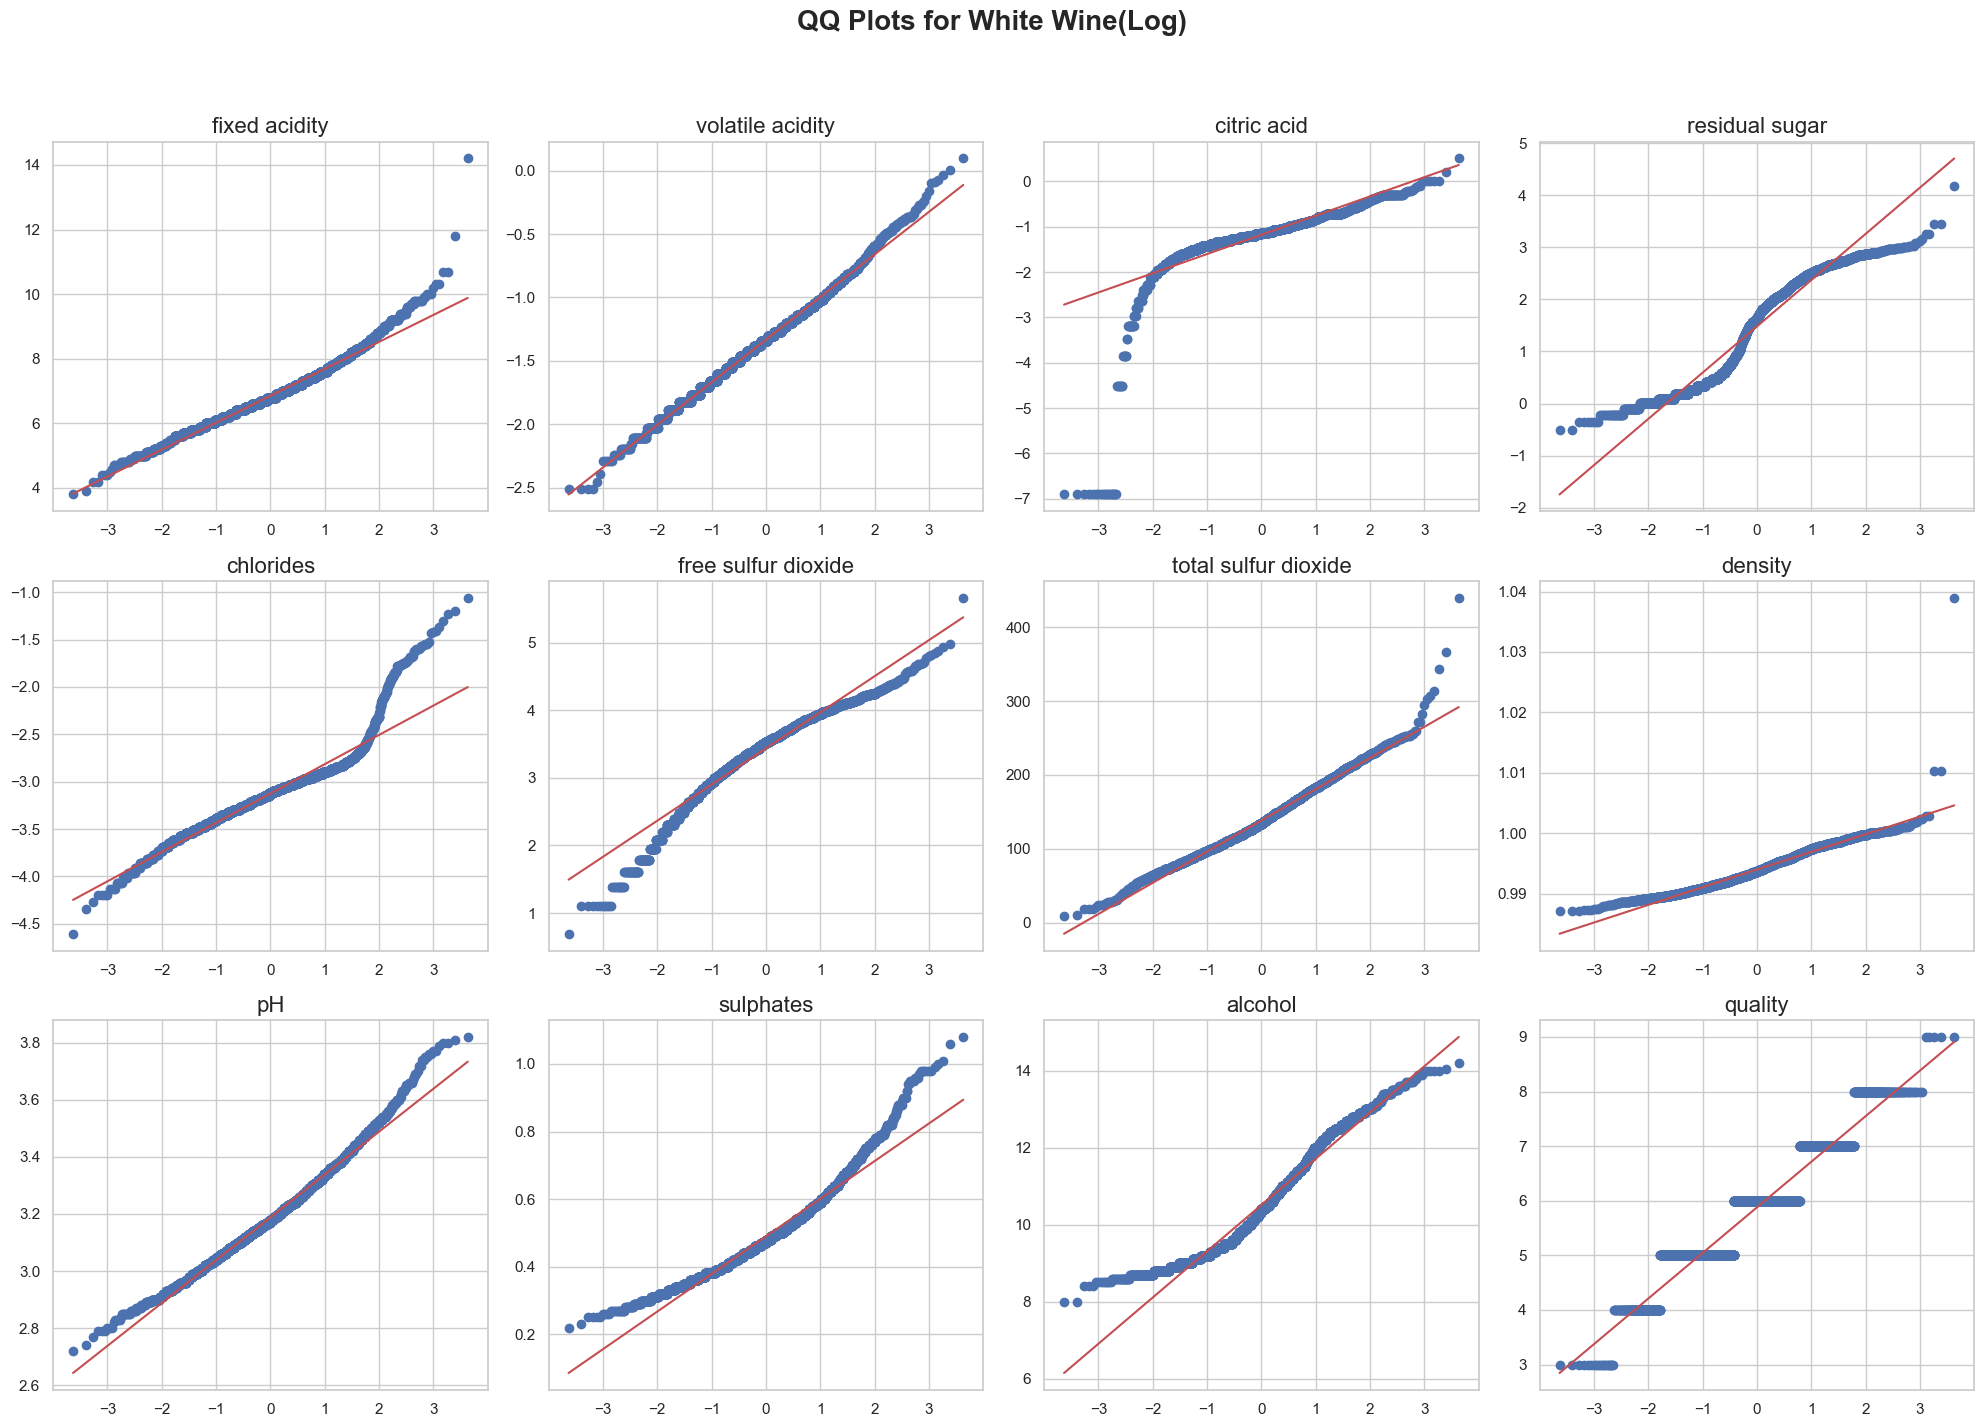


The skewness coefficient of Red Wine(Log): 

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 1.81
chlorides: 1.79
free sulfur dioxide: -0.23
total sulfur dioxide: -0.08
density: 0.07
pH: 0.19
sulphates: 0.92
alcohol: 0.86
quality: 0.22

The skewness coefficient of White Wine(Log): 

fixed acidity: 0.65
volatile acidity: 0.14
citric acid: -5.56
residual sugar: -0.16
chlorides: 1.19
free sulfur dioxide: -0.94
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


In [520]:
log_dfs = [log_red_wine_df, log_white_wine_df]

create_plots(create_qq_plot, log_dfs)
create_plots(calculate_skewness_coefficient, log_dfs)

Observations based on the first log transformation:
1. **Red Wine (Original vs Log-Transformed):**
   - Original: `Residual sugar` 4.54, `Chlorides` 5.68.
   - Log-Transformed: `Residual sugar` 1.81, `Chlorides` 1.79.
   - `Free sulfur dioxide` changed from positive (1.25) to slightly negative skewness (-0.23).

2. **White Wine (Original vs Log-Transformed):**
   - Original: `Volatile acidity` 1.58, `Citric acid` 1.28.
   - Log-Transformed: `Volatile acidity` 0.14, `Citric acid` -5.56 (over-correction).
   - `Residual sugar` reduced from 1.08 to -0.16, `Chlorides` from 5.02 to 1.19.

3. **Minimal Impact on Some Variables:**
   - `Alcohol` and `quality` in both Red and White wines showed minimal changes (around 0.86 and 0.22 respectively).

4. **Avoid Log Transformation For:**
   - Red Wine: `Free sulfur dioxide` and `Total sulfur dioxide`.
   - White Wine: `Citric acid` and `Residual sugar` .

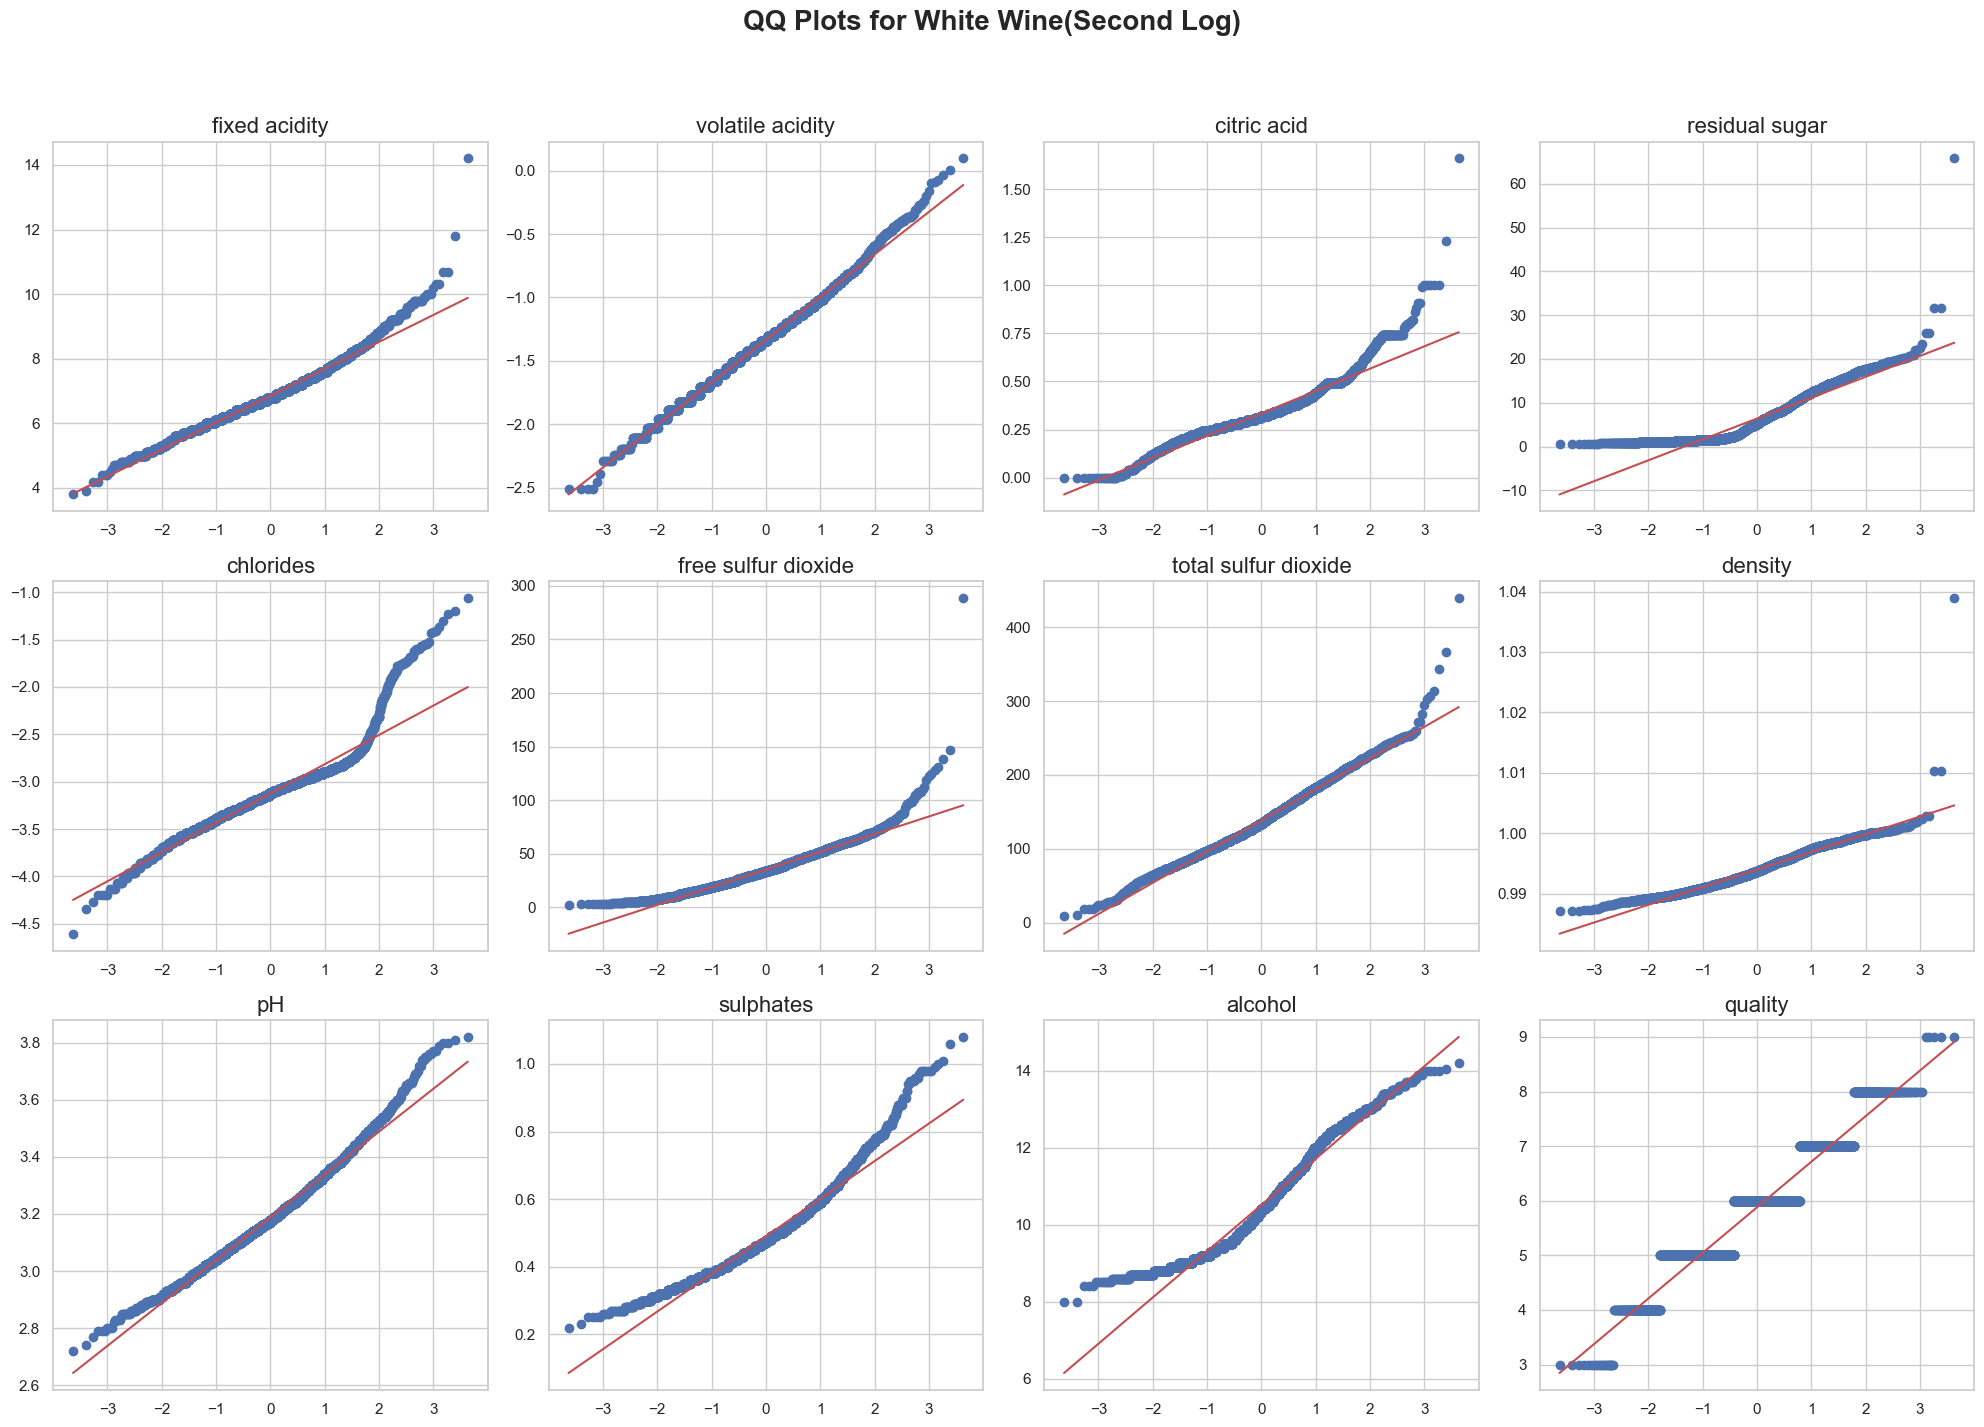

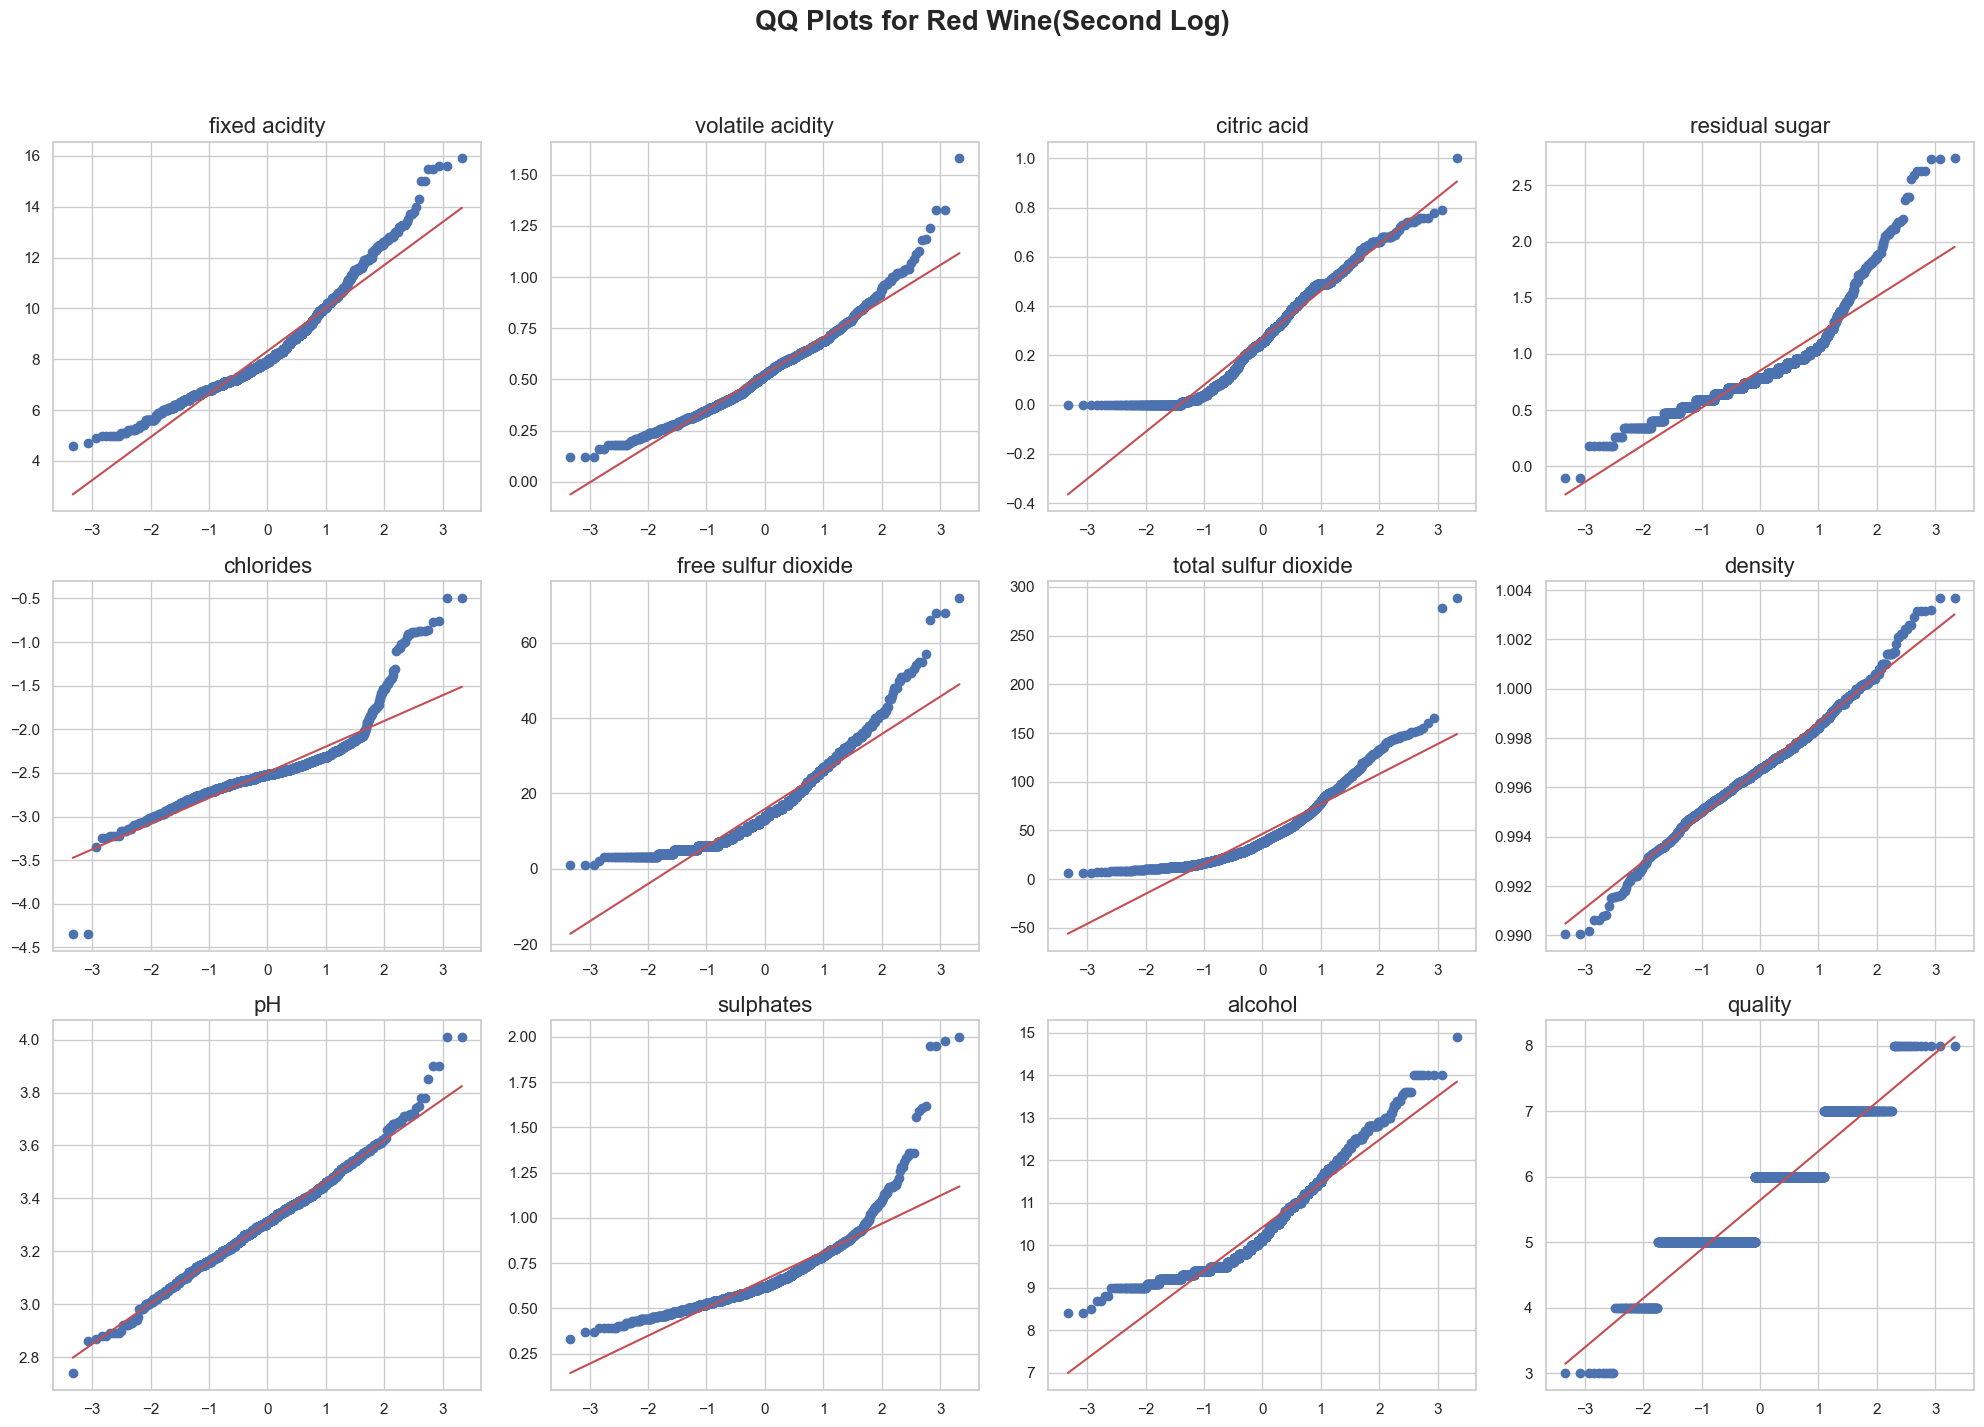


The skewness coefficient of White Wine(Second Log): 

fixed acidity: 0.65
volatile acidity: 0.14
citric acid: 1.28
residual sugar: 1.08
chlorides: 1.19
free sulfur dioxide: 1.41
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16

The skewness coefficient of Red Wine(Second Log): 

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 1.81
chlorides: 1.79
free sulfur dioxide: 1.25
total sulfur dioxide: 1.52
density: 0.07
pH: 0.19
sulphates: 2.43
alcohol: 0.86
quality: 0.22


In [521]:
white_wine_update_log_columns = [
    'chlorides',
    'volatile acidity'
]
red_wine_update_log_columns = [
    'residual sugar',
    'chlorides'
]

log_red_update_wine_df = df_red_wine.copy()
log_white_update_wine_df = df_white_wine.copy()

log_red_update_wine_df[red_wine_update_log_columns] = np.log(log_red_update_wine_df[red_wine_update_log_columns] + 0.001)
log_white_update_wine_df[white_wine_update_log_columns] = np.log(log_white_update_wine_df[white_wine_update_log_columns]+ 0.001)

log_red_update_wine_df.wine_type = "Red Wine(Second Log)"
log_white_update_wine_df.wine_type = "White Wine(Second Log)"

log_update_dfs = [log_white_update_wine_df, log_red_update_wine_df]

create_plots(create_qq_plot, log_update_dfs)
create_plots(calculate_skewness_coefficient, log_update_dfs)

Observations:

1. **White Wine:**
   - Log transformation significantly reduced skewness in `volatile acidity` (from 1.58 to 0.14) and `chlorides` (from 5.02 to 1.19).
2. **Red Wine:**
   - Effective reduction in skewness for `residual sugar` (from 4.54 to 1.81) and `chlorides` (from 5.68 to 1.79).
3. **Conclusion:**
   - The second log transformation was successful in reducing high skewness for key variables in both Red and White Wine datasets.


### 3.3 Clean Data

#### 3.3.1 Check for missing values

We are going to check if there are empty values.

In [522]:
def check_na(wine_type_df):
    print(f'{get_wine_str(wine_type_df)}')
    print(wine_type_df.info())
    print(wine_type_df.isnull().sum())

create_plots(check_na, log_update_dfs)

White Wine(Second Log)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar      

**Observations from Checking Missing Values:**
1. There are no missing data in either dataset.
2. All feature columns are of the float type, and the target column is an integer.

#### 3.3.2 Outlier Analysis

We will create box plots to understand the outliers.

In [523]:
def create_box_plot(wine_type_df):
    feature_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    for i, column in enumerate(feature_columns): 
        sns.boxplot(x='quality', y=column, data=wine_type_df, ax=axs[i], legend=False, color = "grey")
        plt.xticks(fontsize=14) 
        plt.yticks(fontsize=14)

    fig.suptitle(f'Box Plots for {get_wine_str(wine_type_df)}', fontsize=20, weight='bold')
    plt.show()

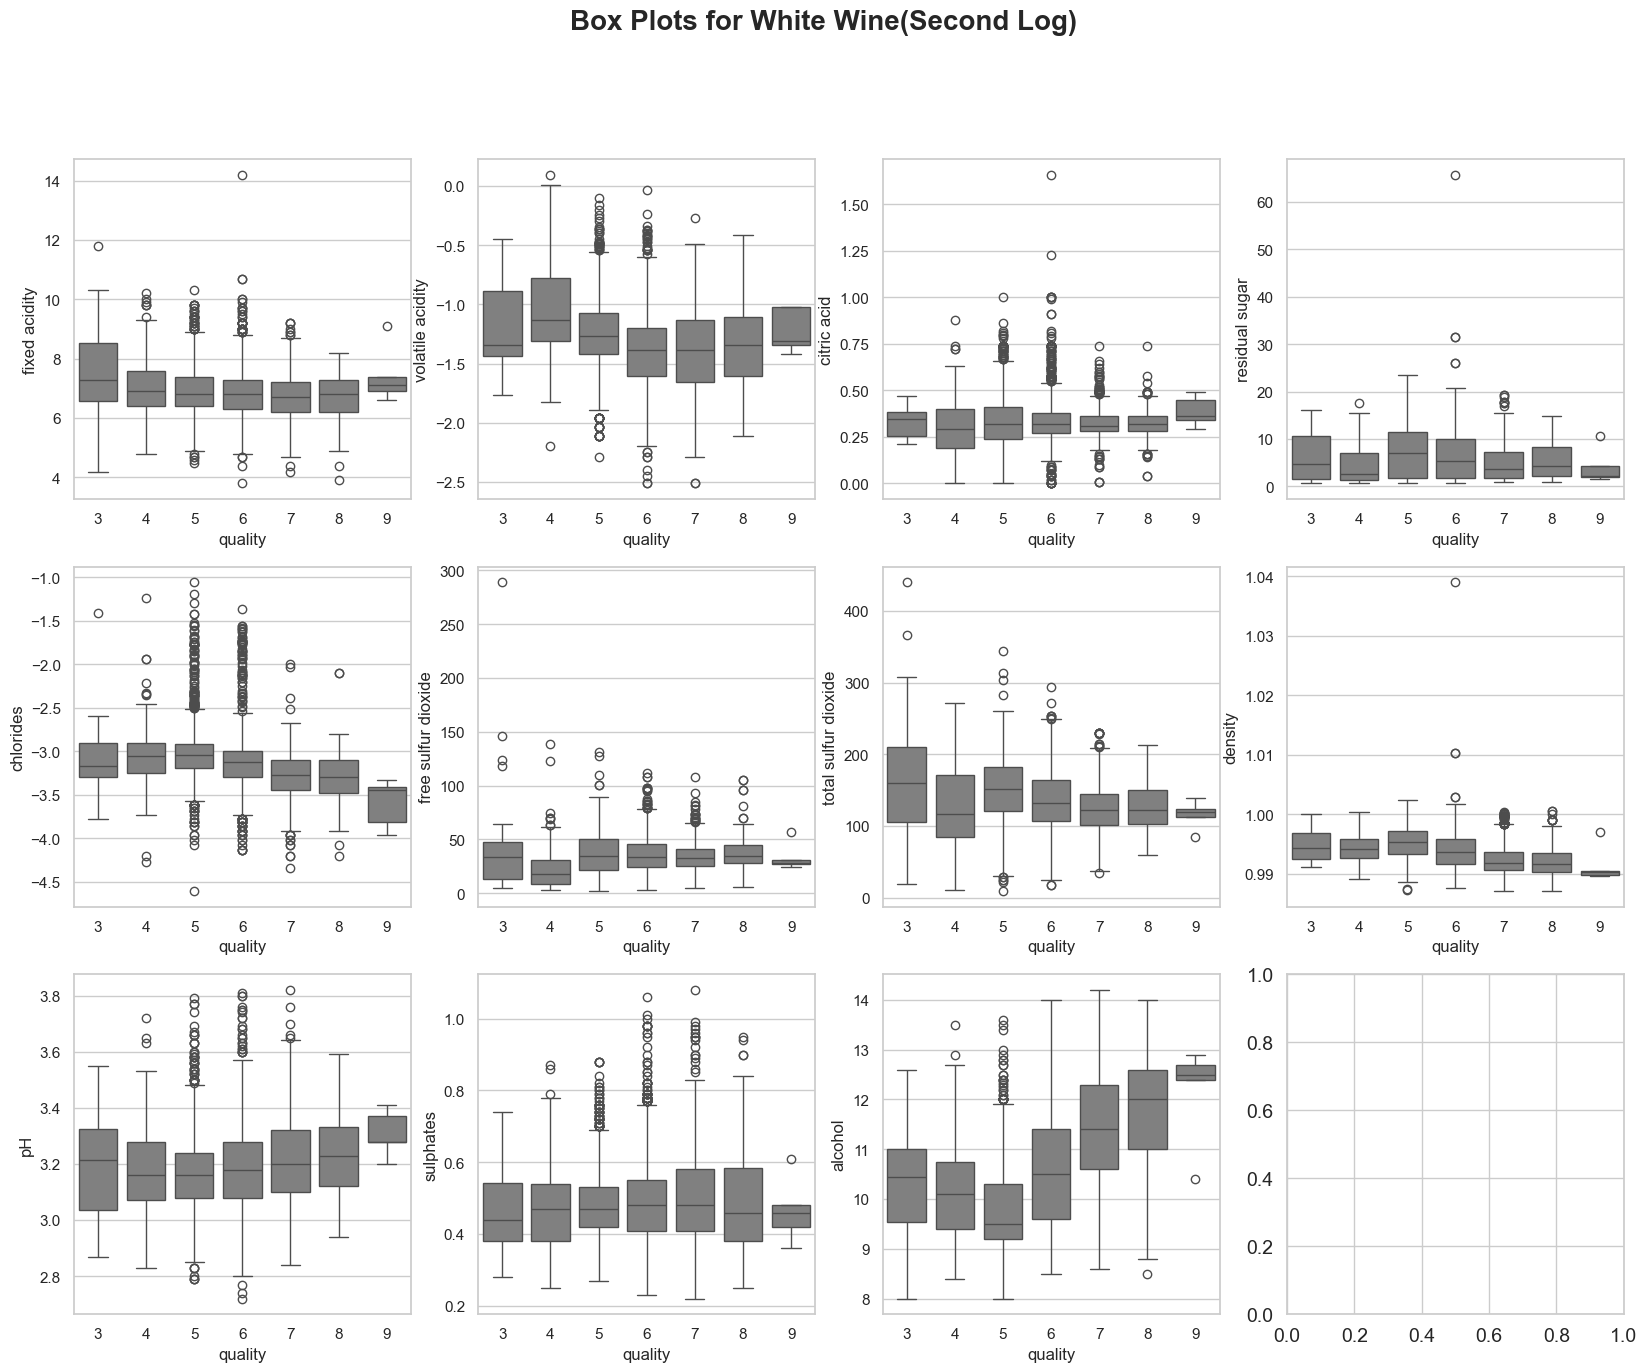

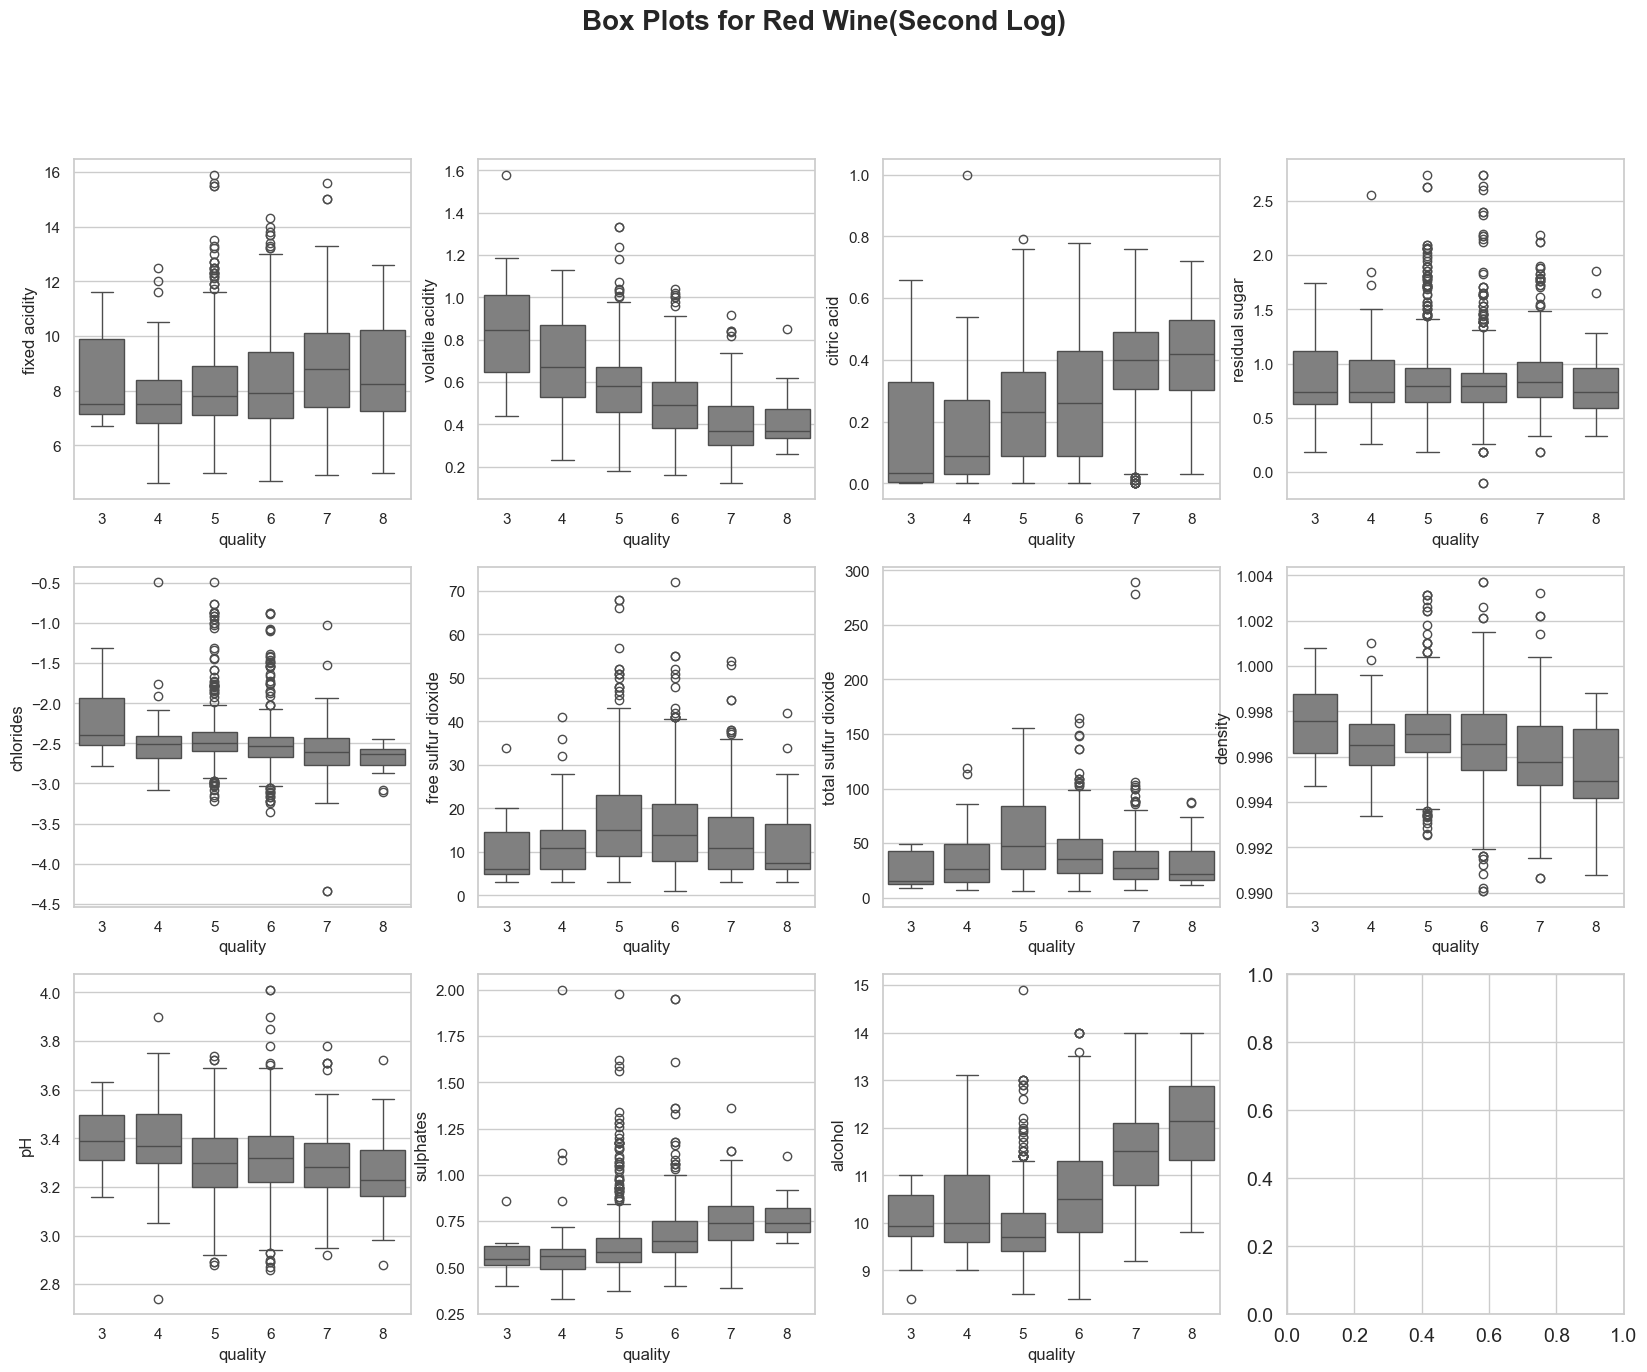

In [524]:
create_plots(create_box_plot, log_update_dfs)

**Observations from Box Plots**
1. It's hard to decide should we delete outliers or not based on these plots. 
2. We are going to develop separate QQ plots for wines classified into different quality categories: bad(3-4), middle(5-6-7), and good(8-9) to better understand our outliers.

In [525]:
bin_edges = [2, 5, 10]
bin_labels = ['poor', 'good']

red_wine_quality_df = log_red_update_wine_df.copy()
white_wine_quality_df = log_white_update_wine_df.copy()

red_wine_quality_df['quality_category'] = pd.cut(red_wine_quality_df['quality'], bins=bin_edges, labels=bin_labels)
white_wine_quality_df['quality_category'] = pd.cut(white_wine_quality_df['quality'], bins=bin_edges, labels=bin_labels)


In [526]:
df_red_poor = red_wine_quality_df[red_wine_quality_df['quality_category'] == 'poor']
df_red_good = red_wine_quality_df[red_wine_quality_df['quality_category'] == 'good']

df_white_poor = white_wine_quality_df[white_wine_quality_df['quality_category'] == 'poor']
df_white_good = white_wine_quality_df[white_wine_quality_df['quality_category'] == 'good']


wine_quality_dfs = [
    df_white_poor,
    df_white_good,
    df_red_poor,
    df_red_good
]


In [527]:
df_white_poor.wine_type = 'White Wine Poor'
df_white_good.wine_type = 'White Wine Good'
df_red_poor.wine_type = 'Red Wine Poor'
df_red_good.wine_type = 'Red Wine Good'

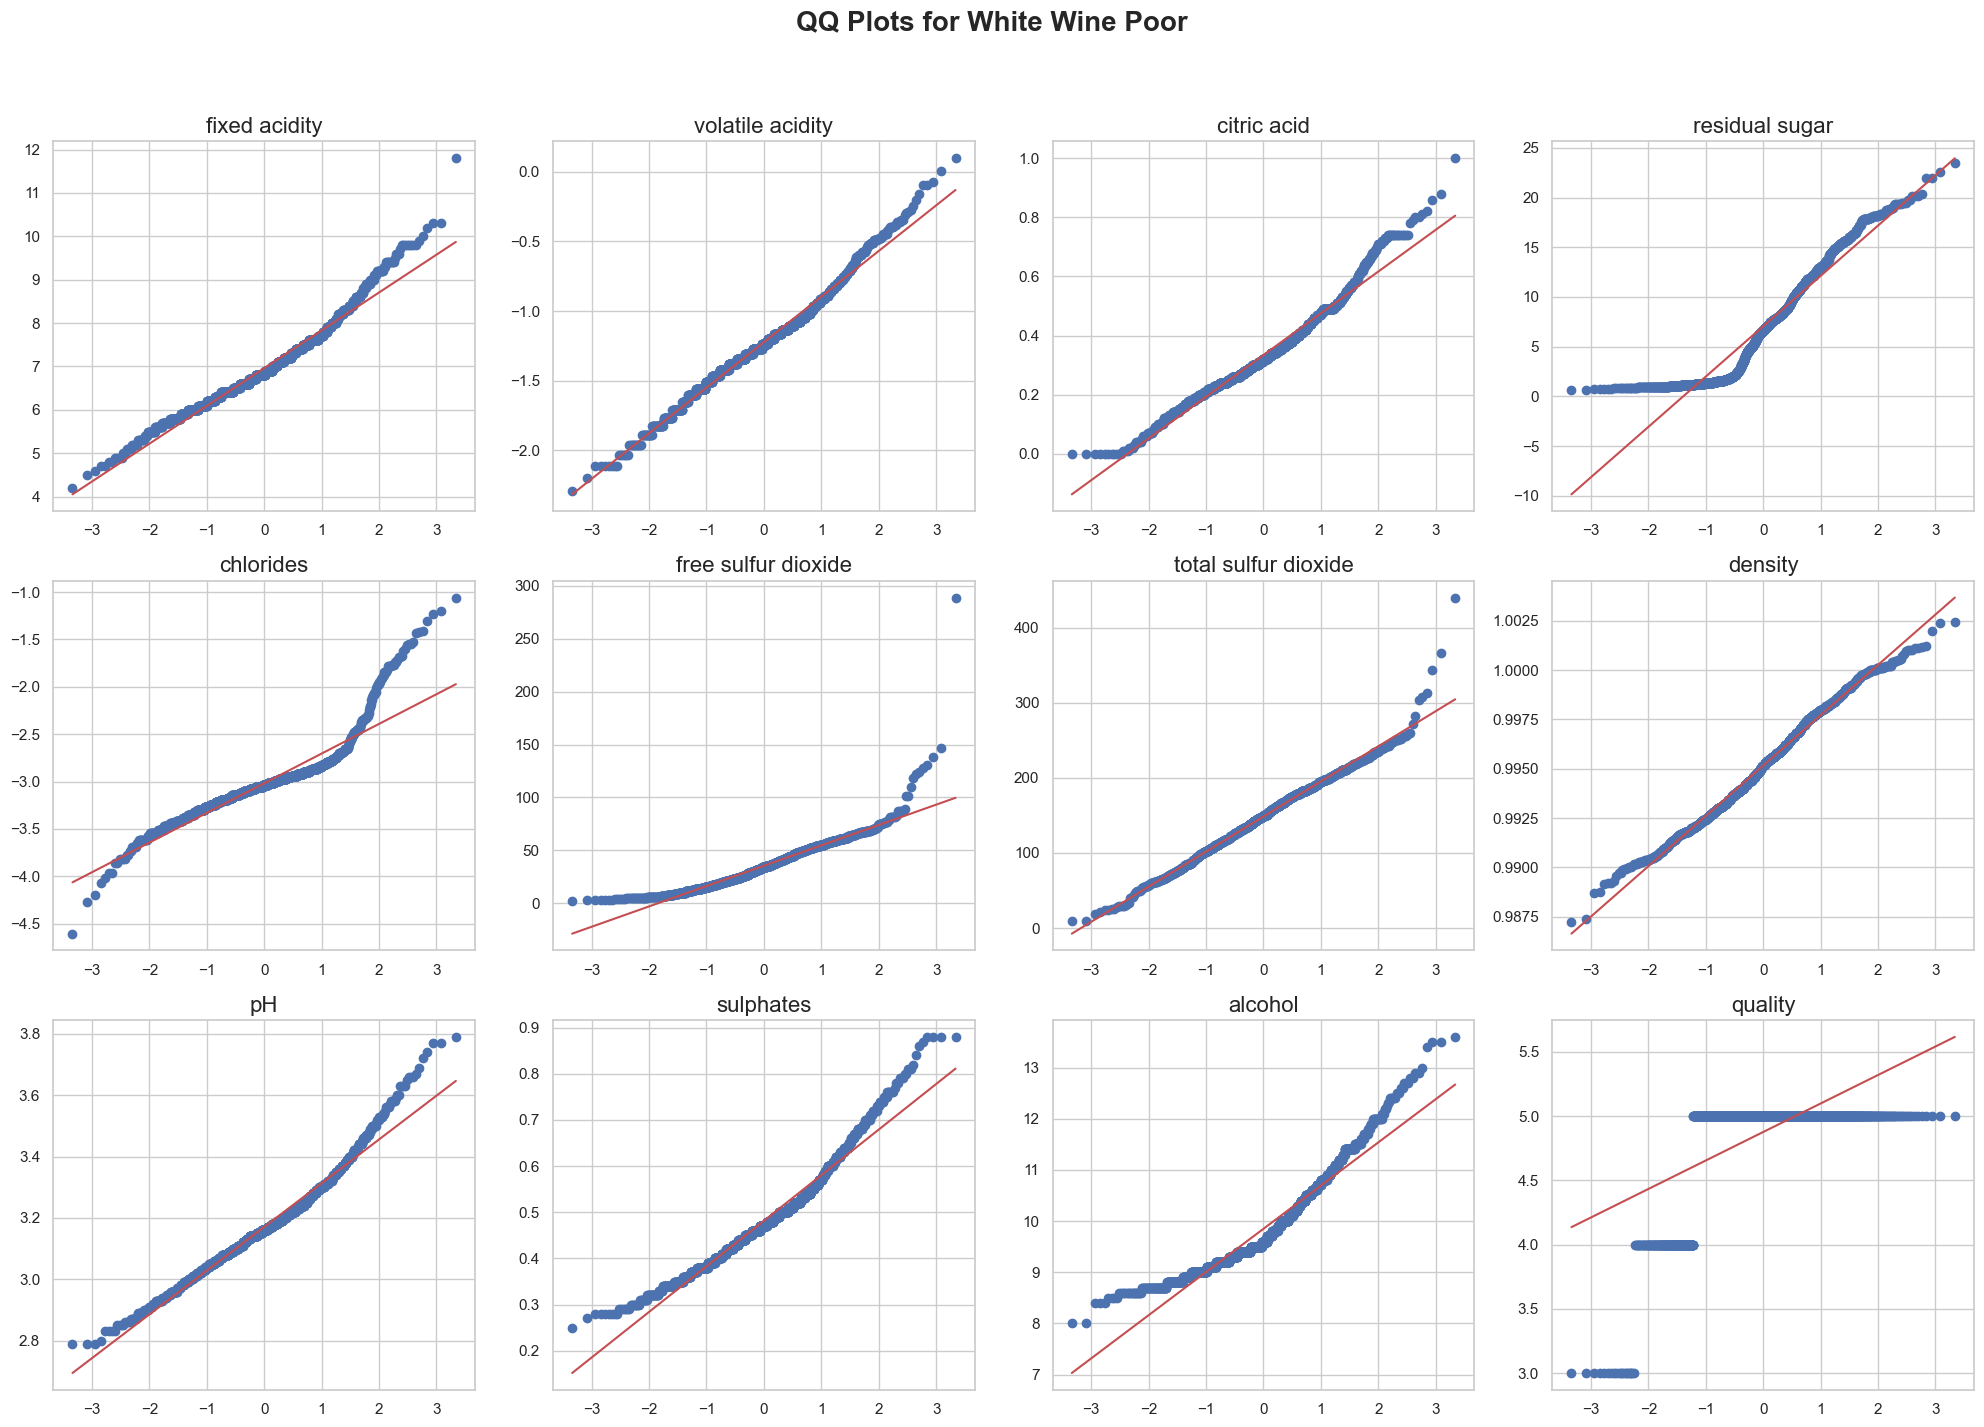

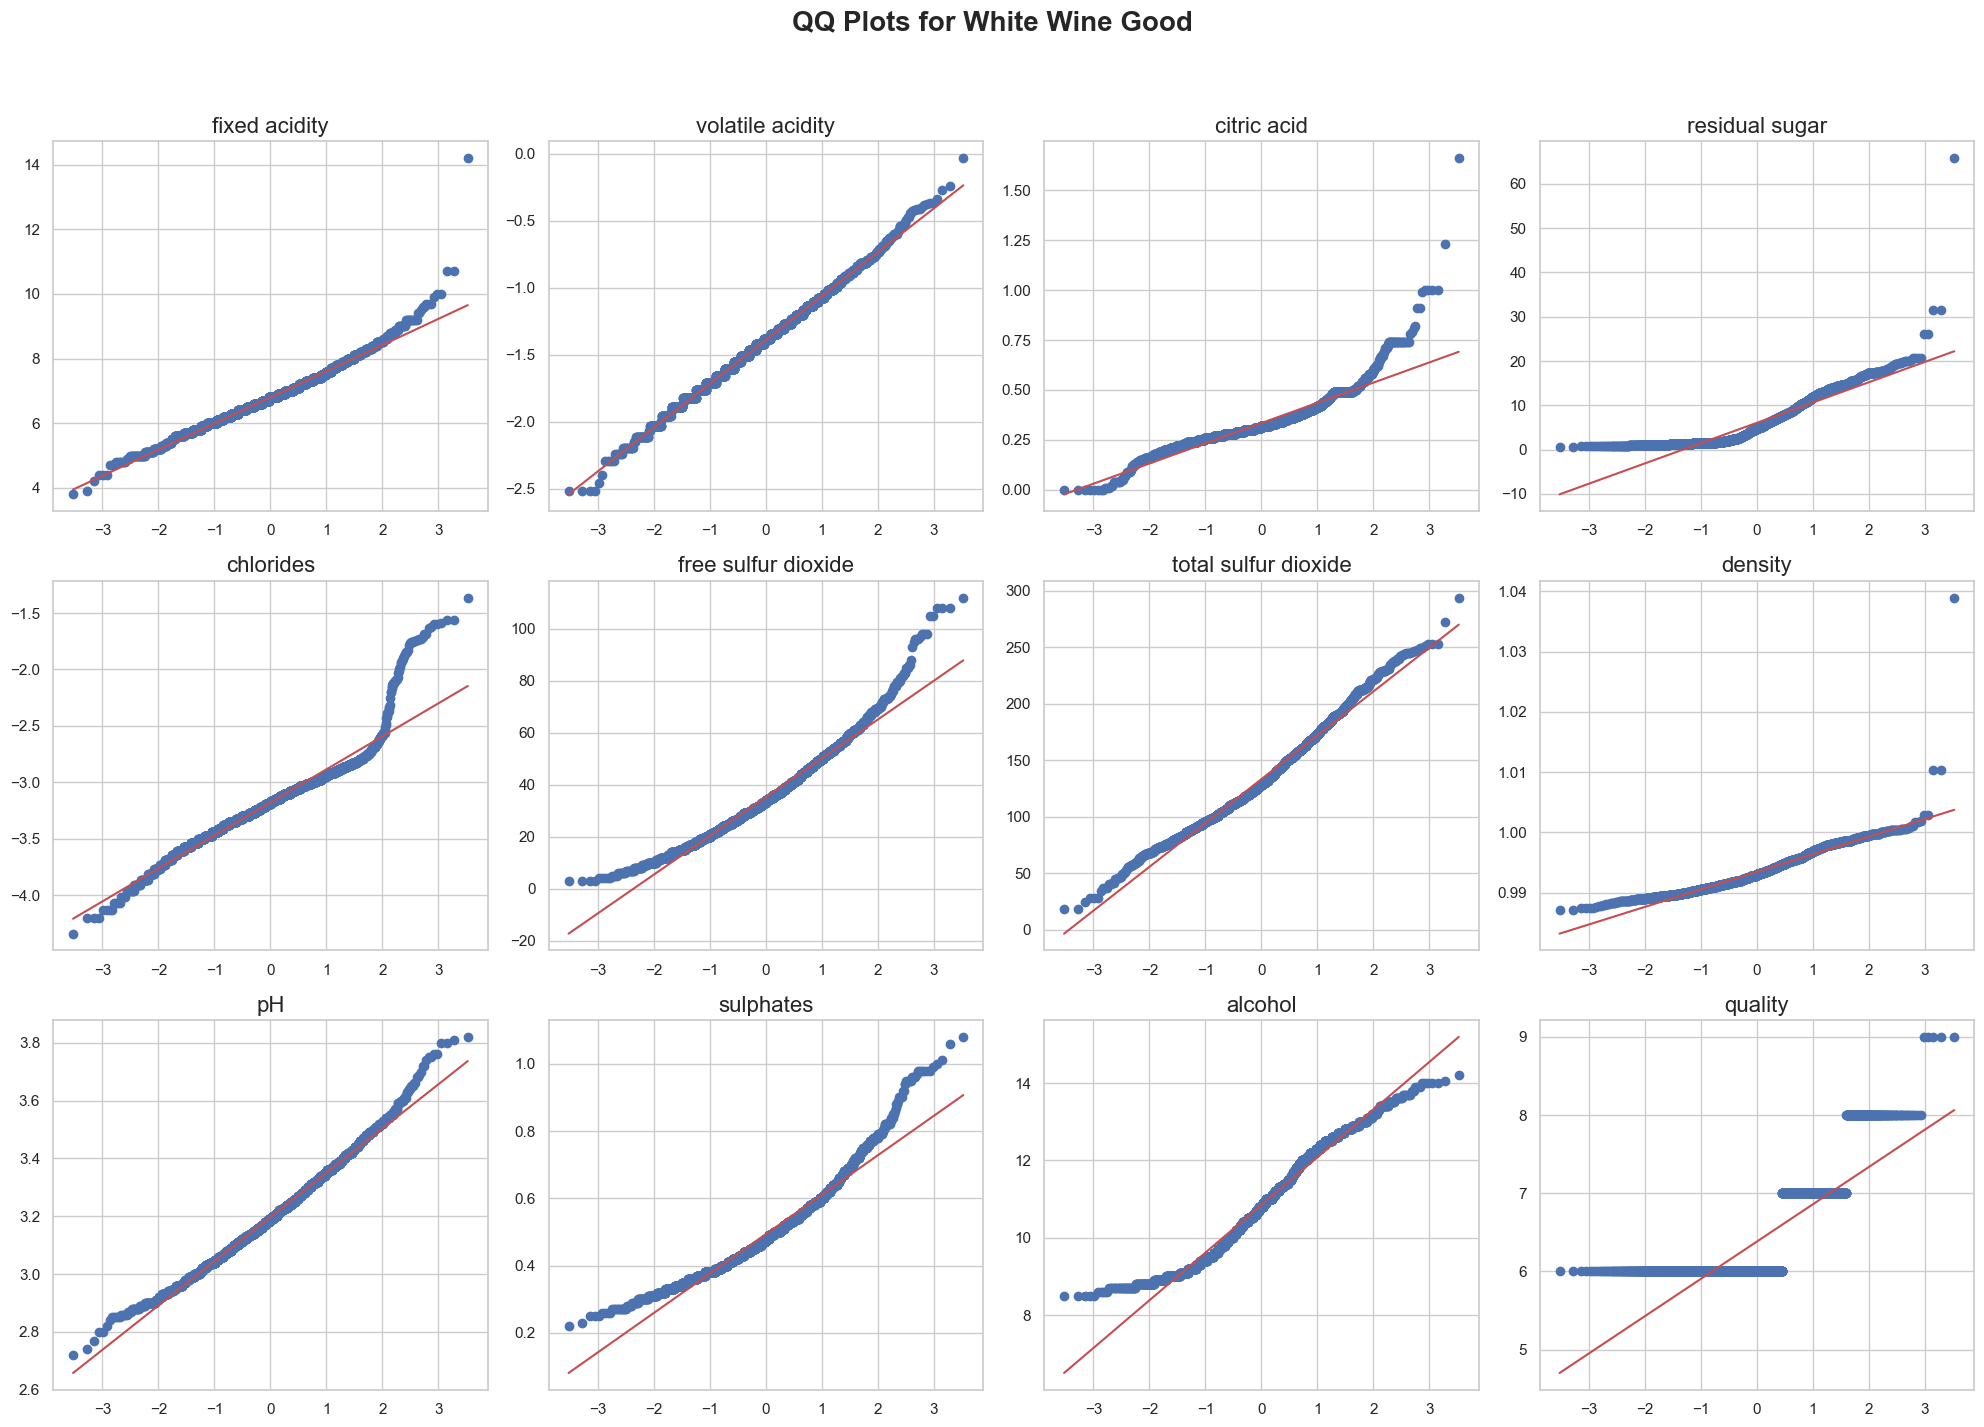

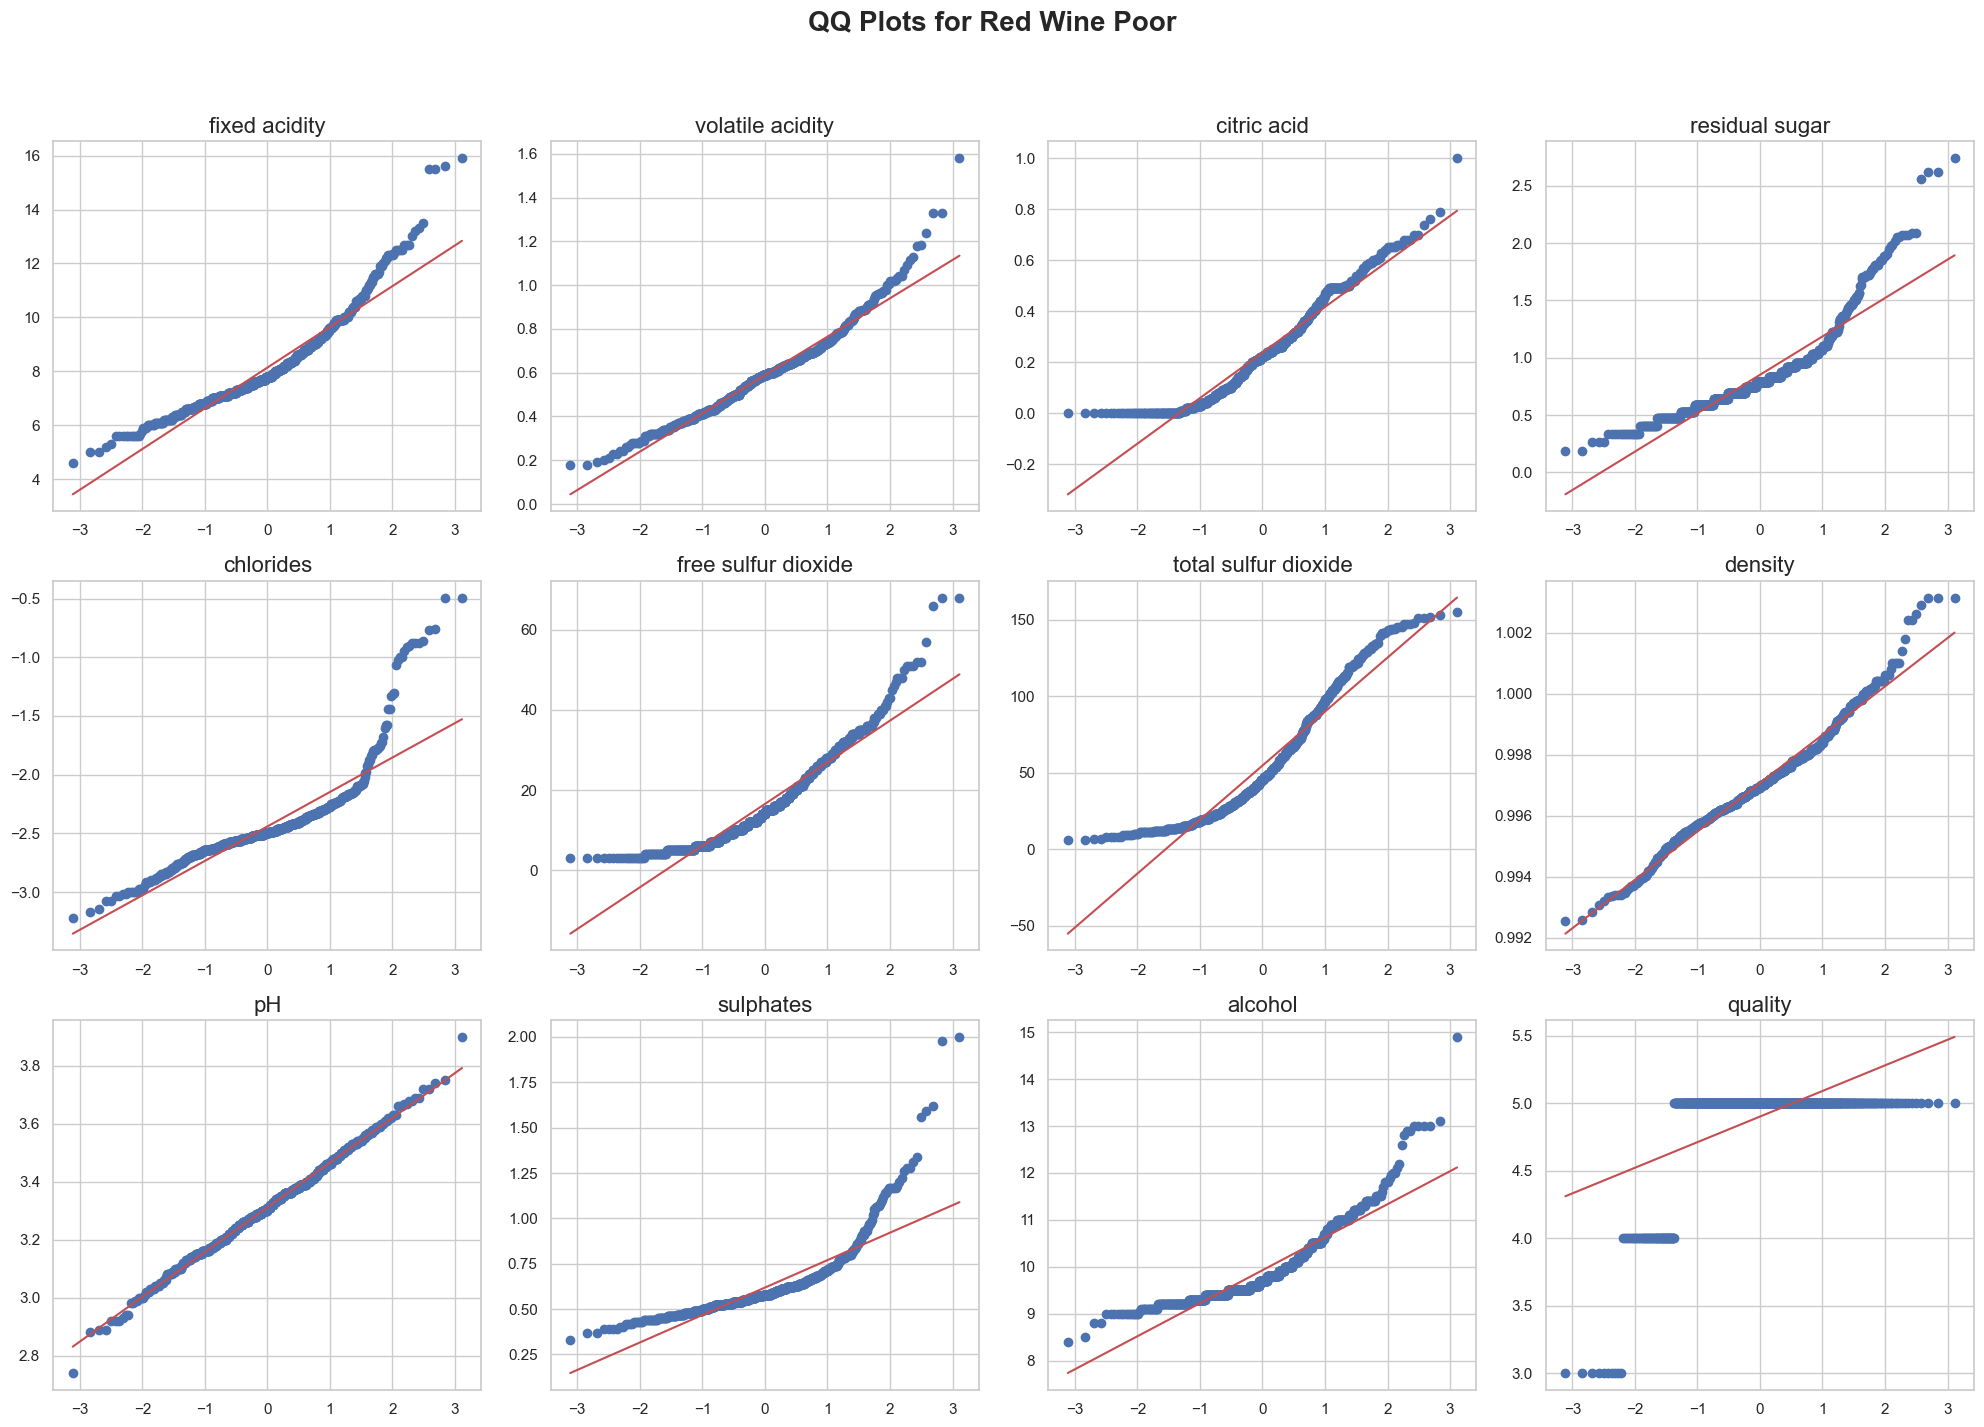

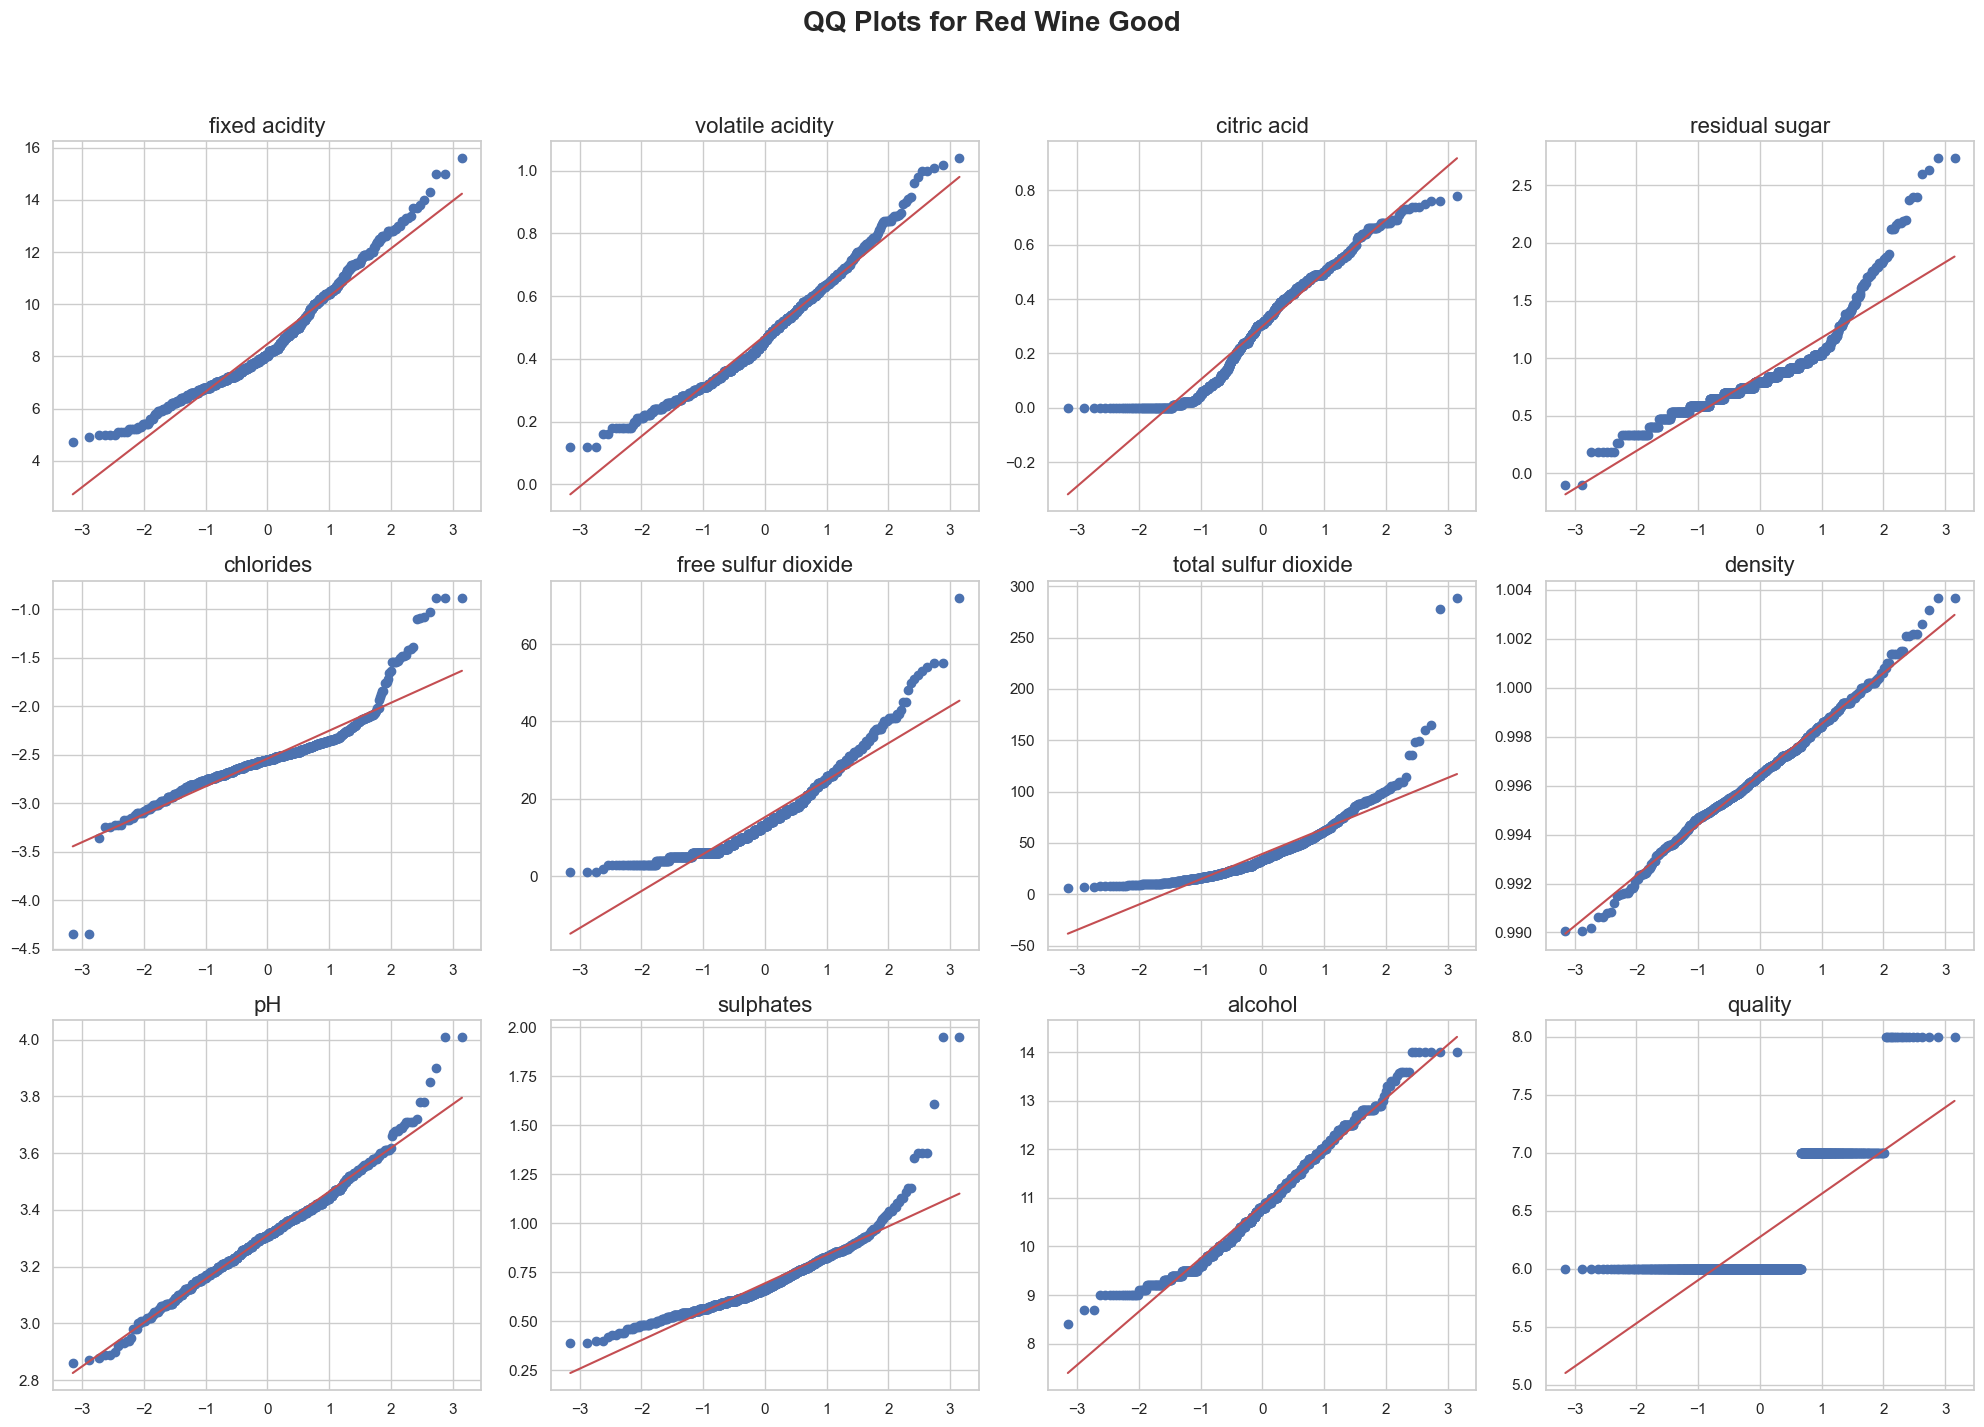

In [528]:
create_plots(create_qq_plot, wine_quality_dfs)

To understand distribution asymmetries, we use skewness coefficient to identify which variables deviate from normality.

In [529]:
create_plots(calculate_skewness_coefficient, wine_quality_dfs)


The skewness coefficient of White Wine Poor: 

fixed acidity: 0.74
volatile acidity: 0.29
citric acid: 0.64
residual sugar: 0.55
chlorides: 1.51
free sulfur dioxide: 1.85
total sulfur dioxide: 0.13
density: 0.08
pH: 0.65
sulphates: 0.81
alcohol: 1.04
quality: -3.01

The skewness coefficient of White Wine Good: 

fixed acidity: 0.56
volatile acidity: 0.07
citric acid: 1.94
residual sugar: 1.39
chlorides: 1.01
free sulfur dioxide: 0.78
total sulfur dioxide: 0.46
density: 1.53
pH: 0.36
sulphates: 0.99
alcohol: 0.17
quality: 1.34

The skewness coefficient of Red Wine Poor: 

fixed acidity: 1.32
volatile acidity: 0.81
citric acid: 0.61
residual sugar: 1.75
chlorides: 2.51
free sulfur dioxide: 1.21
total sulfur dioxide: 0.8
density: 0.46
pH: 0.06
sulphates: 3.08
alcohol: 1.68
quality: -3.68

The skewness coefficient of Red Wine Good: 

fixed acidity: 0.74
volatile acidity: 0.54
citric acid: 0.08
residual sugar: 1.86
chlorides: 1.08
free sulfur dioxide: 1.27
total sulfur dioxide: 2.64
densit

To pinpoint extreme outliers, we use a a threshold of Z-score > 6 to focuse on the most anomalous data points in the wine quality dataset.

In [530]:
def calculate_z_score(wine_type_df):
    z_scores_df = wine_type_df.copy()

    print(f"\nZ Score of {get_wine_str(wine_type_df)}:\n")

    for col in wine_type_df.columns:
        if col != 'quality' and col != 'quality_category':
            z_scores_df[col + ' Z-score'] = zscore(wine_type_df[col])
            
            outliers = abs(z_scores_df[col + ' Z-score']) > 6
            outlier_count = outliers.sum()
            print(f"Outliers in {col}: {outlier_count}")

            if outlier_count > 0:
                print(f"Outlier data for {col}:\n{wine_type_df[outliers]}")
                print("\n") 

In [531]:
create_plots(calculate_z_score, wine_quality_dfs)


Z Score of White Wine Poor:

Outliers in fixed acidity: 0
Outliers in volatile acidity: 0
Outliers in citric acid: 0
Outliers in residual sugar: 0
Outliers in chlorides: 0
Outliers in free sulfur dioxide: 1
Outlier data for free sulfur dioxide:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4745            6.1         -1.343235         0.25             2.9  -3.036554   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4745                289.0                 440.0  0.99314  3.44       0.64   

      alcohol  quality quality_category  
4745     10.5        3             poor  


Outliers in total sulfur dioxide: 1
Outlier data for total sulfur dioxide:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4745            6.1         -1.343235         0.25             2.9  -3.036554   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4745                289.0          

**Observations from Skewness Coefficients and Z-Score Analysis**

### White Wine:
- **Poor Quality White Wine:**
  - Notable skewness in `chlorides` (1.51) and `free sulfur dioxide` (1.85).
  - Outliers are mainly in `free sulfur dioxide` and `total sulfur dioxide`.
- **Good Quality White Wine:**
  - Higher skewness in `citric acid` (1.94) and `density` (1.53).
  - Outliers are present in several attributes, notably in `citric acid` (7 outliers) and `density` (1 outlier).

### Red Wine:
- **Poor Quality Red Wine:**
  - Considerable skewness in `chlorides` (2.51) and `sulphates` (3.08).
  - Outliers are observed in `sulphates` (2) and `alcohol` (1).
- **Good Quality Red Wine:**
  - Skewness is pronounced in `total sulfur dioxide` (2.64) and `sulphates` (2.18).
  - Outliers are mainly in `total sulfur dioxide` (2) and `sulphates` (2).

In [532]:
def delete_outliers(wine_type_df):
    without_outliers_df = wine_type_df.copy()

    for col in without_outliers_df.columns:
        if col != 'quality' and col != 'quality_category':
            without_outliers_df[col + '_Z_score'] = zscore(without_outliers_df[col])

    for col in without_outliers_df.columns:
        if '_Z_score' in col:
            without_outliers_df = without_outliers_df[np.abs(without_outliers_df[col]) <= 6]

    return without_outliers_df.drop(columns=[c for c in without_outliers_df if '_Z_score' in c])

In [533]:
df_white_poor_without_outliers = delete_outliers(df_white_poor)
df_white_good_without_outliers = delete_outliers(df_white_good)
df_red_poor_without_outliers = delete_outliers(df_red_poor)
df_red_good_without_outliers = delete_outliers(df_red_good)

df_white_poor_without_outliers.wine_type = 'White Wine Poor (Without Outliers)'
df_white_good_without_outliers.wine_type = 'White Wine Good (Without Outliers)'
df_red_poor_without_outliers.wine_type = 'Red Wine Poor (Without Outliers)'
df_red_good_without_outliers.wine_type = 'Red Wine Good (Without Outliers)'


In [534]:
wine_quality_without_outliers_dfs = [
    df_white_poor_without_outliers,
    df_white_good_without_outliers,
    df_red_poor_without_outliers,
    df_red_good_without_outliers
]


In [535]:
df_white_without_outliers = delete_outliers(log_white_update_wine_df)
df_red_without_outliers = delete_outliers(log_red_update_wine_df)

df_white_without_outliers.wine_type = 'White Wine (Without Outliers)'
df_red_without_outliers.wine_type = 'Red Wine (Without Outliers)'

wine_without_outliers_dfs = [
    df_white_without_outliers,
    df_red_without_outliers
]

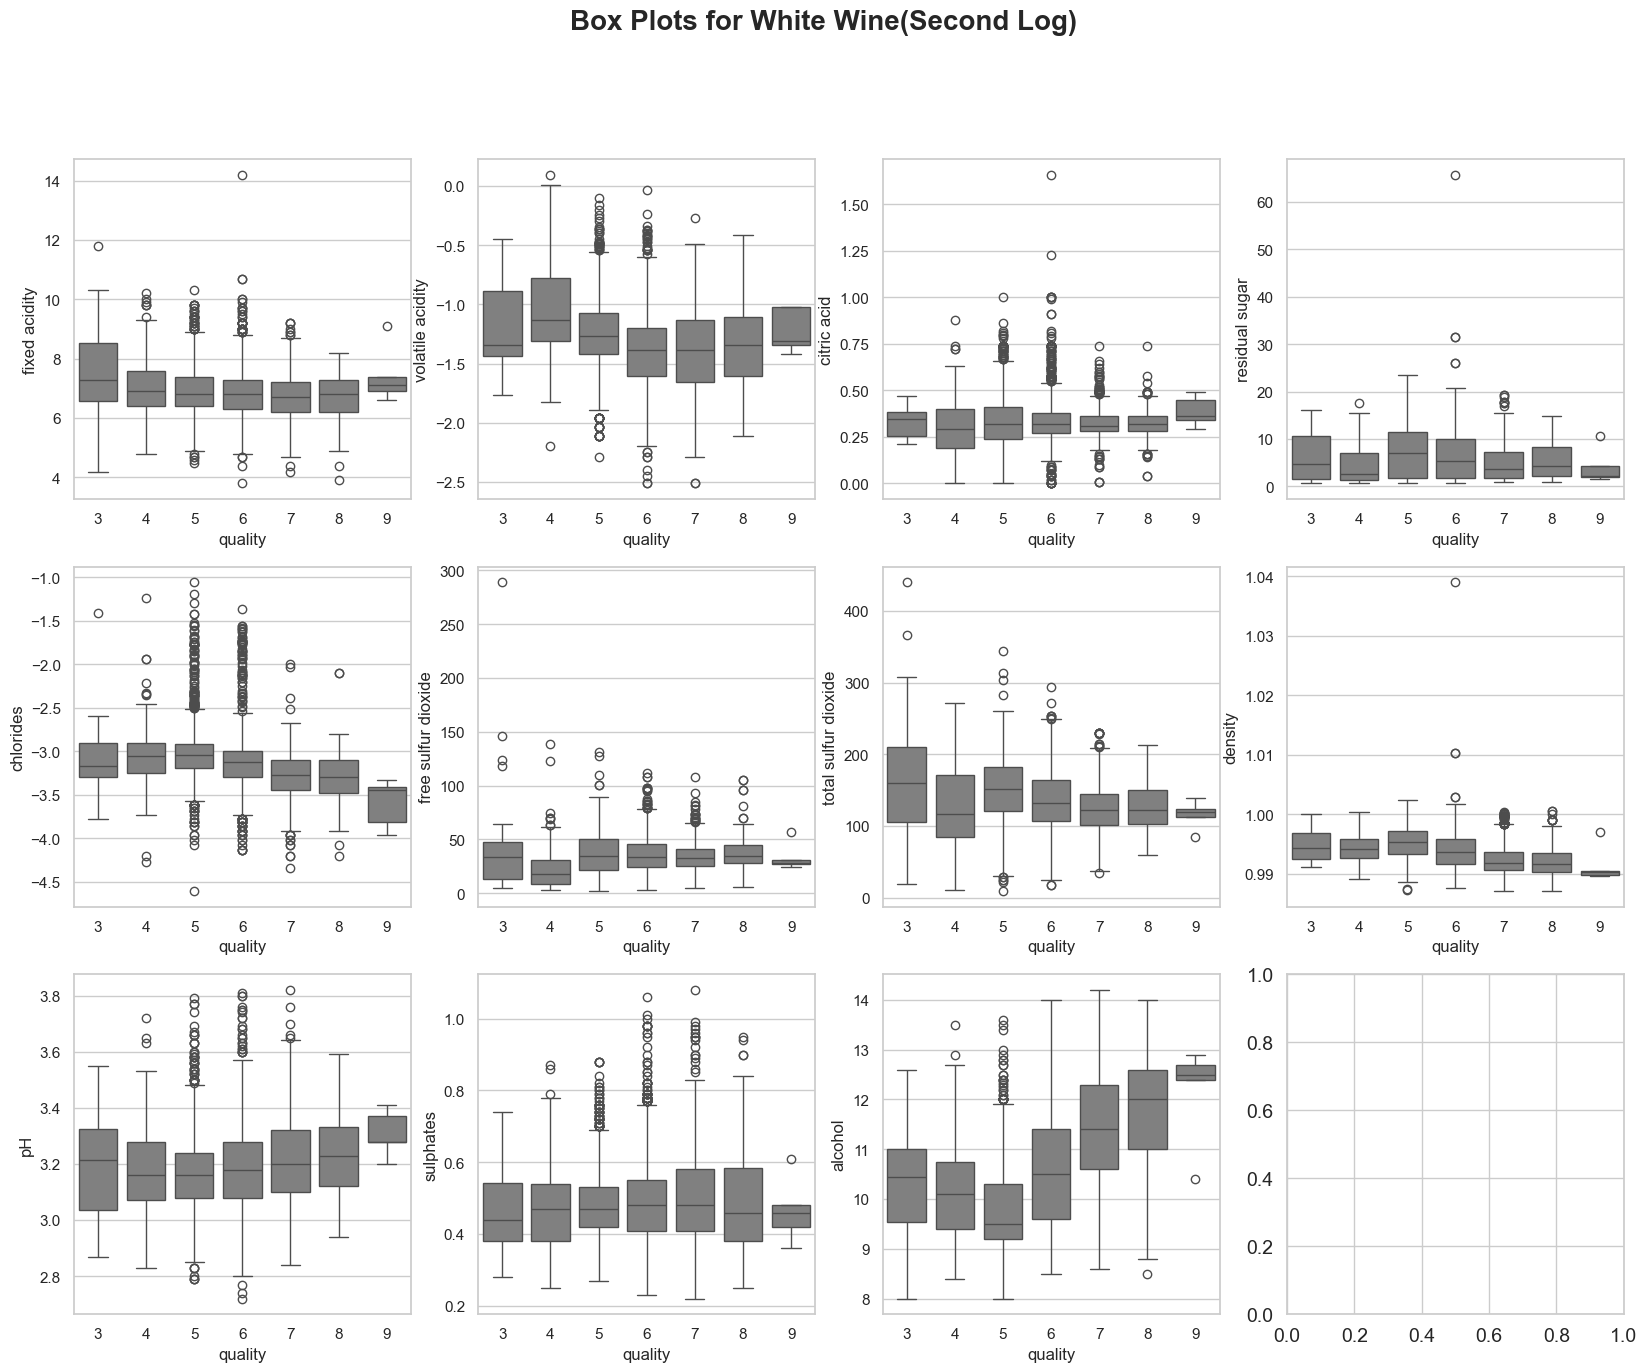

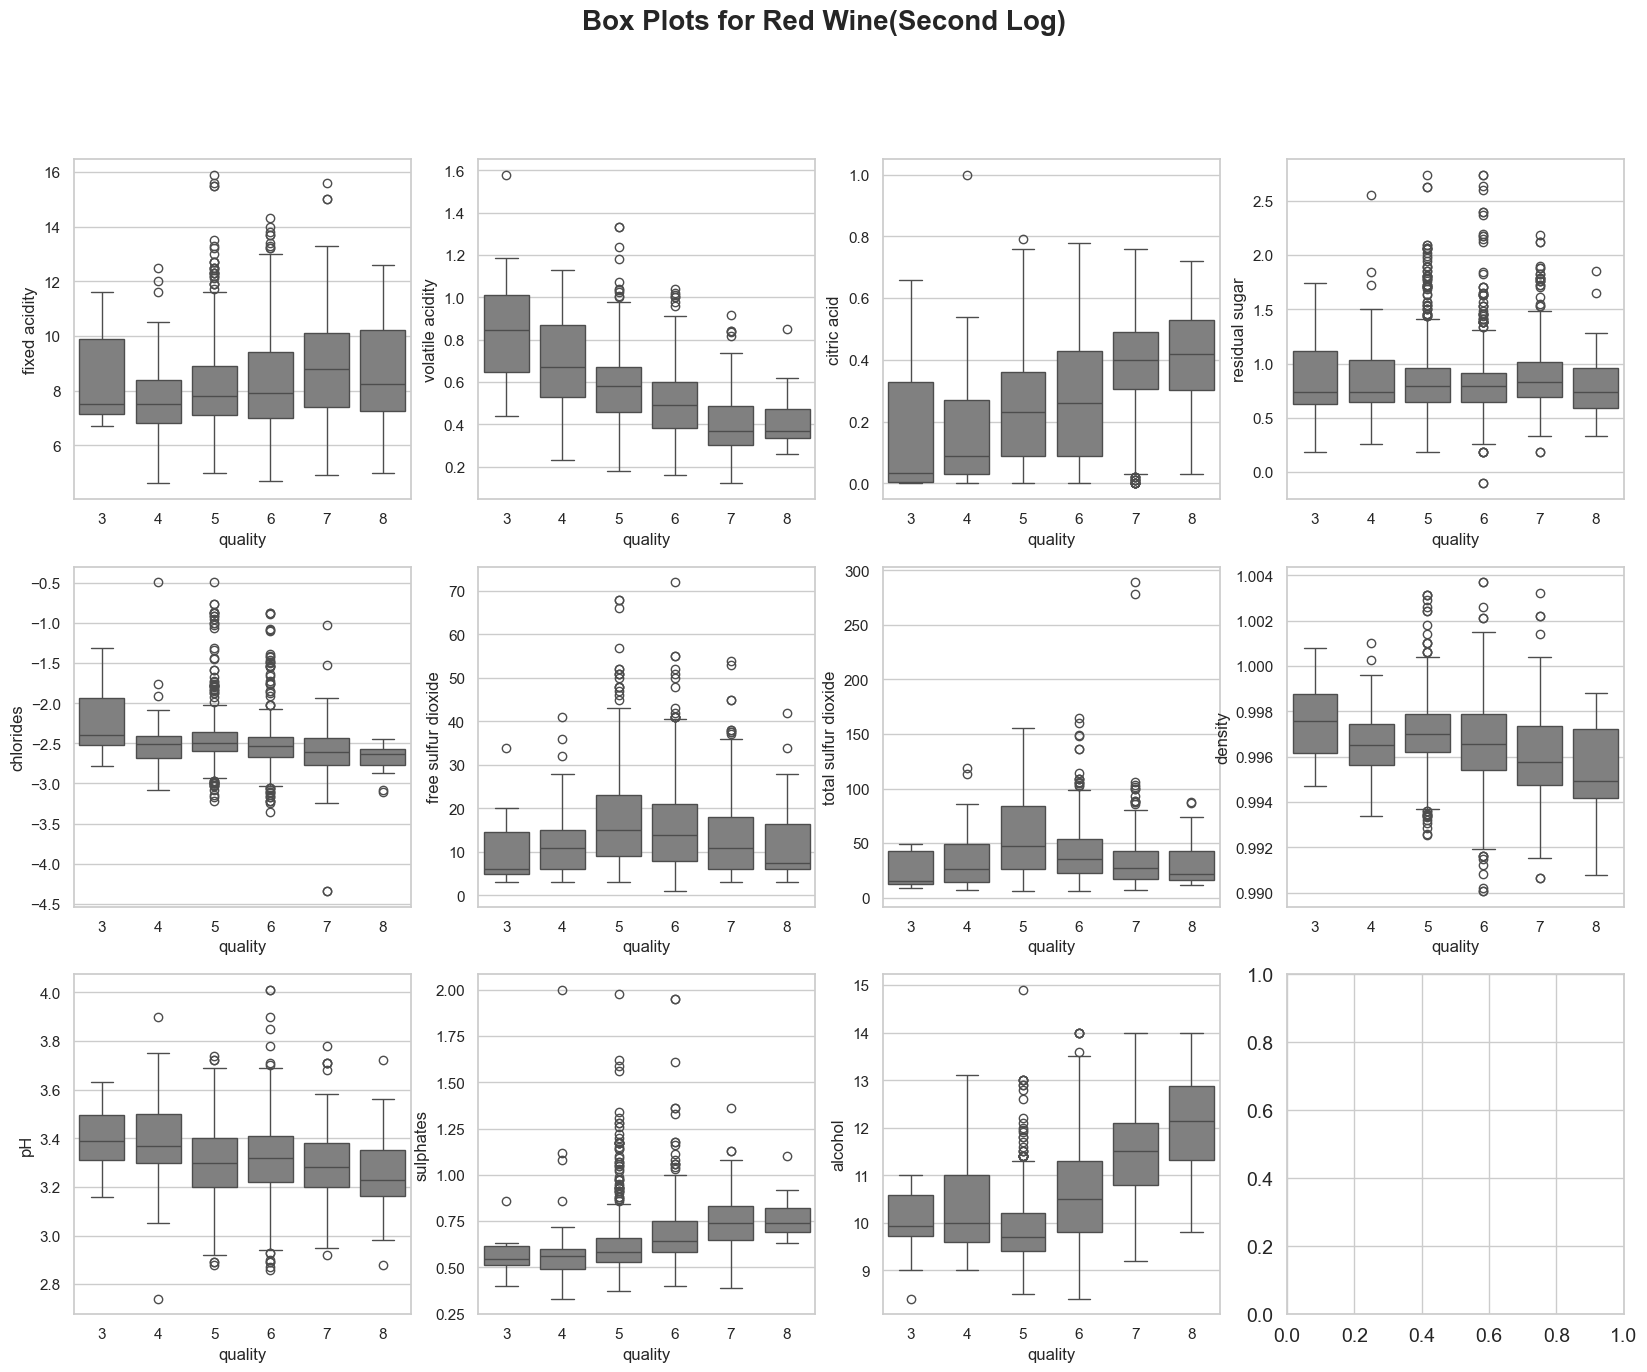

In [536]:
create_plots(create_box_plot, log_update_dfs)

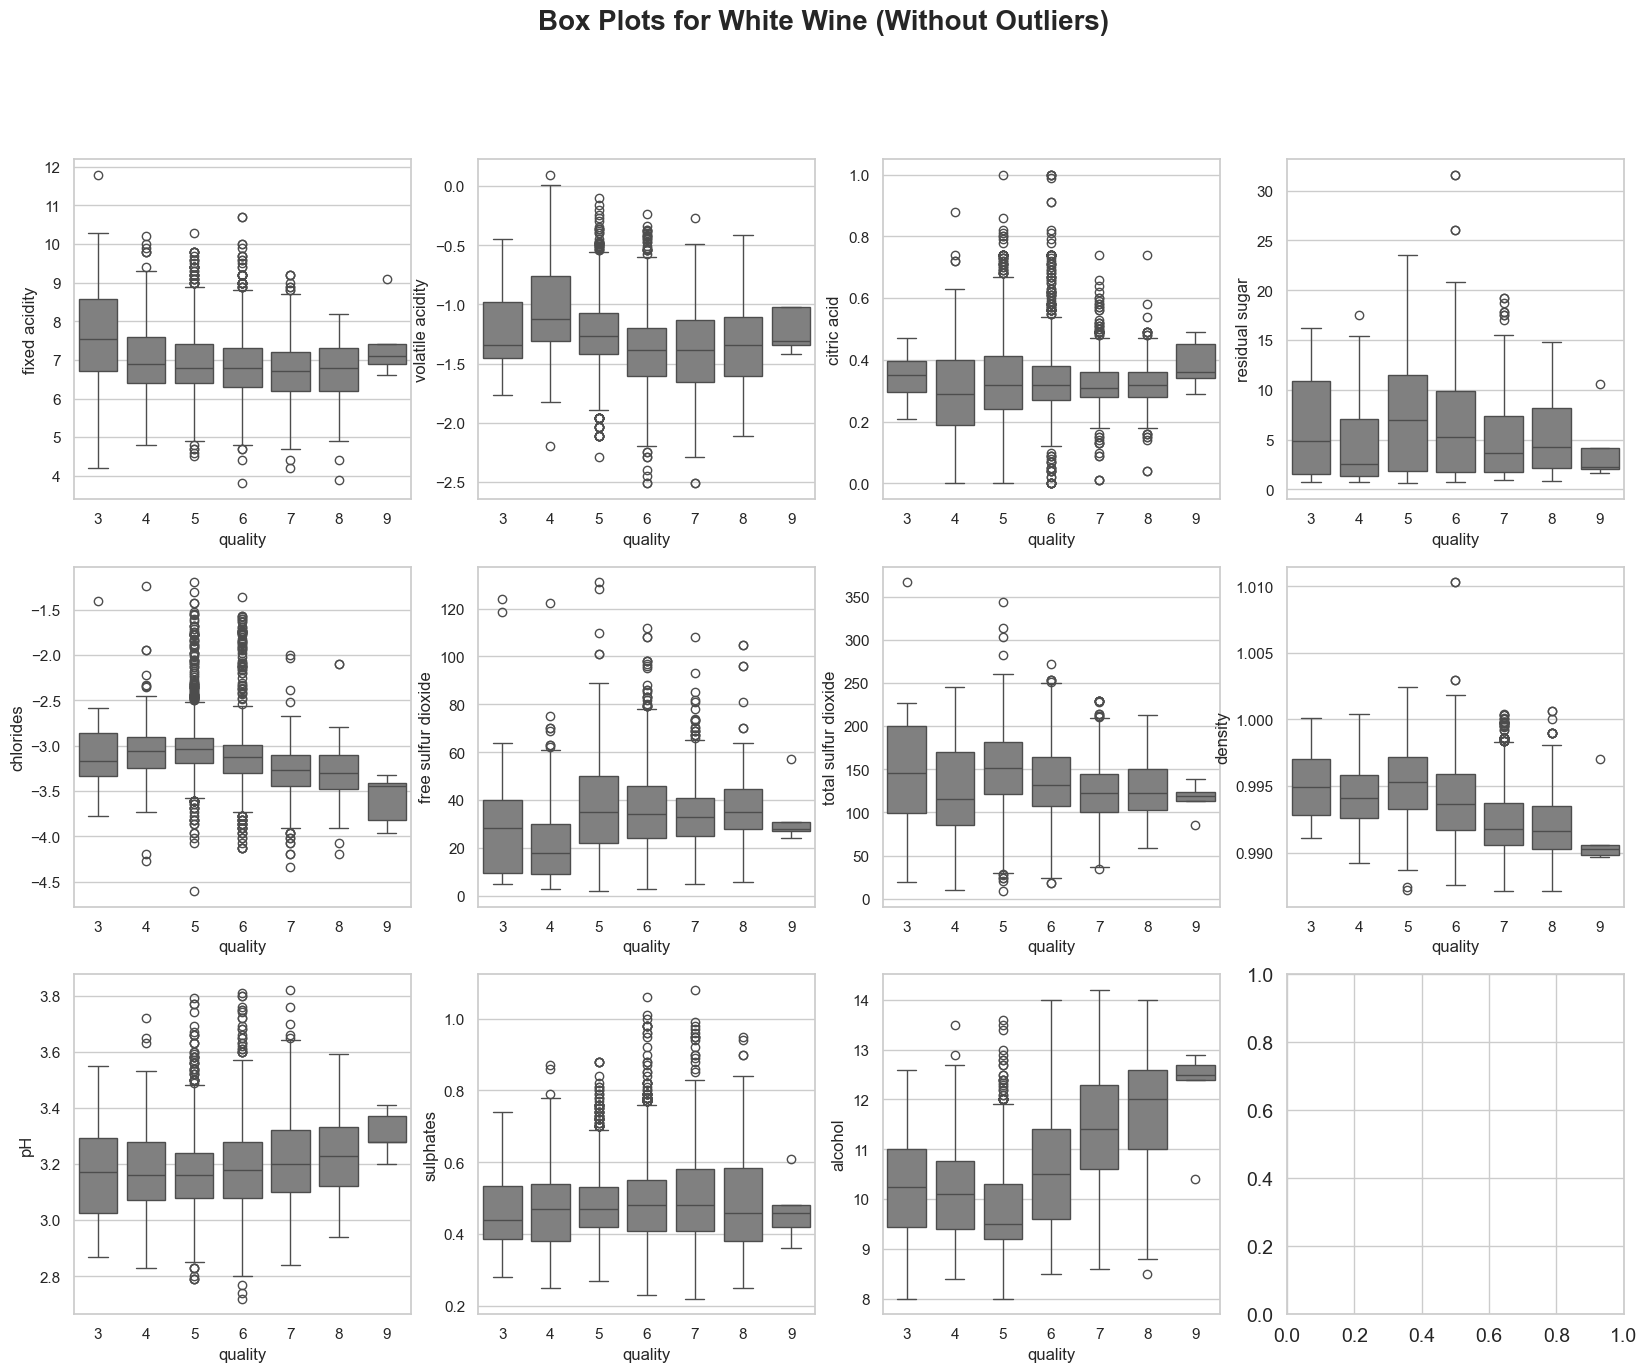

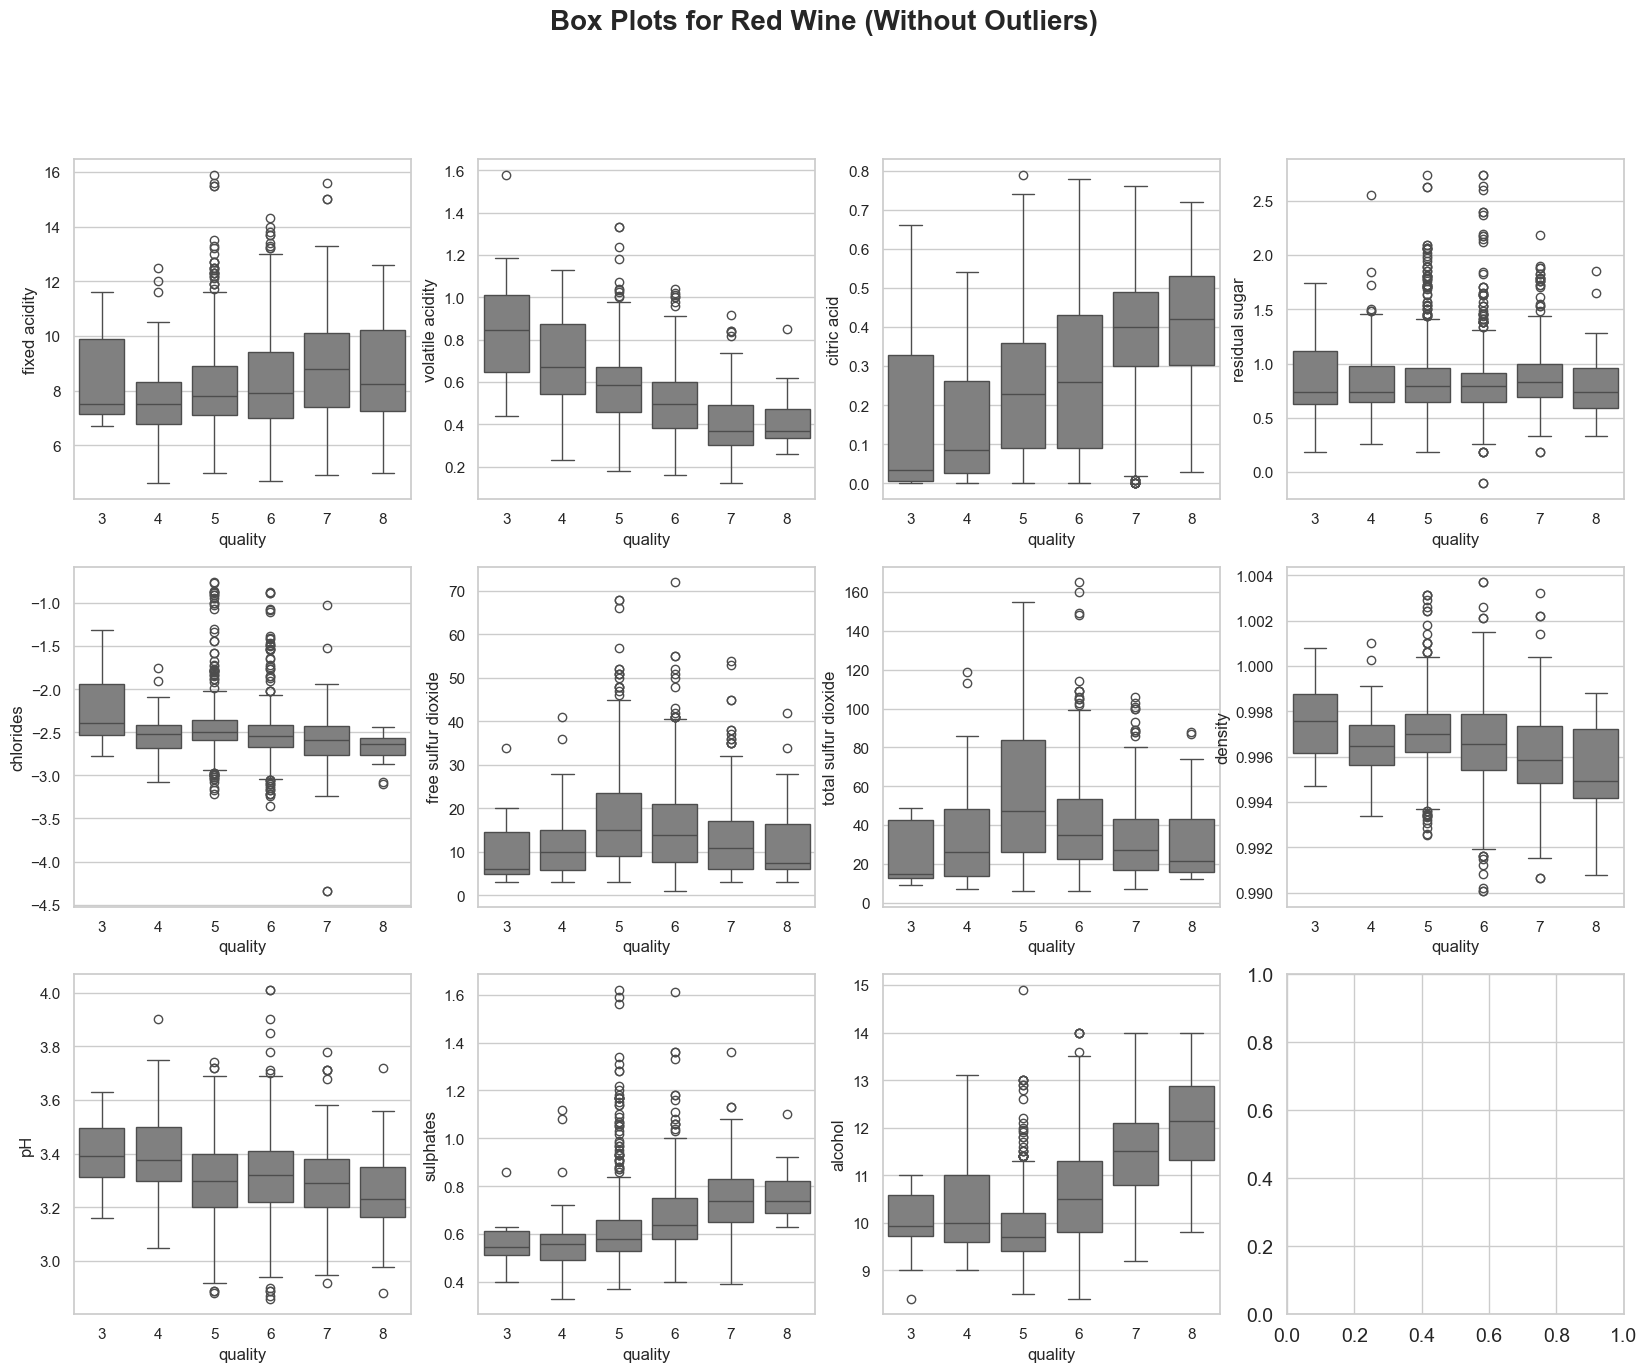

In [537]:
create_plots(create_box_plot, wine_without_outliers_dfs)

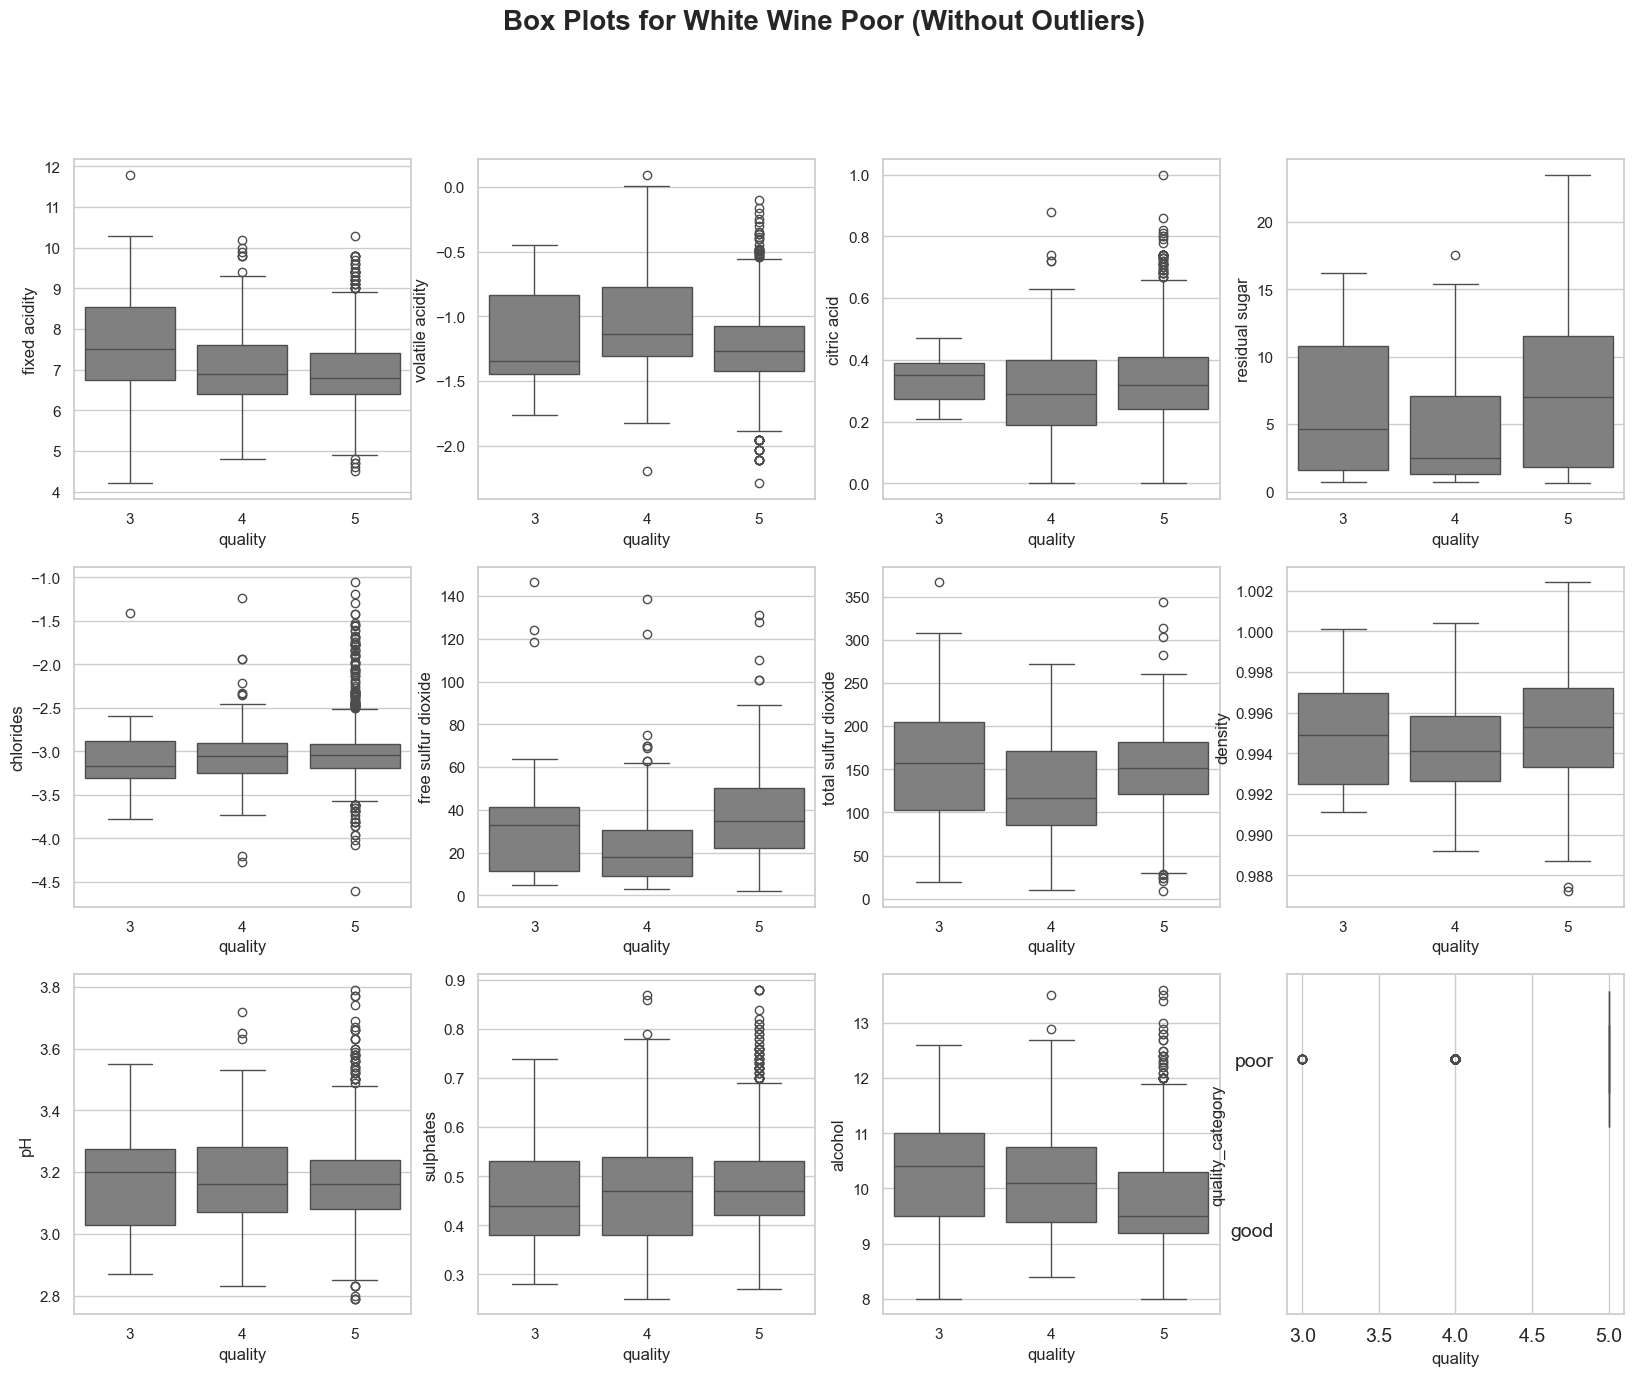

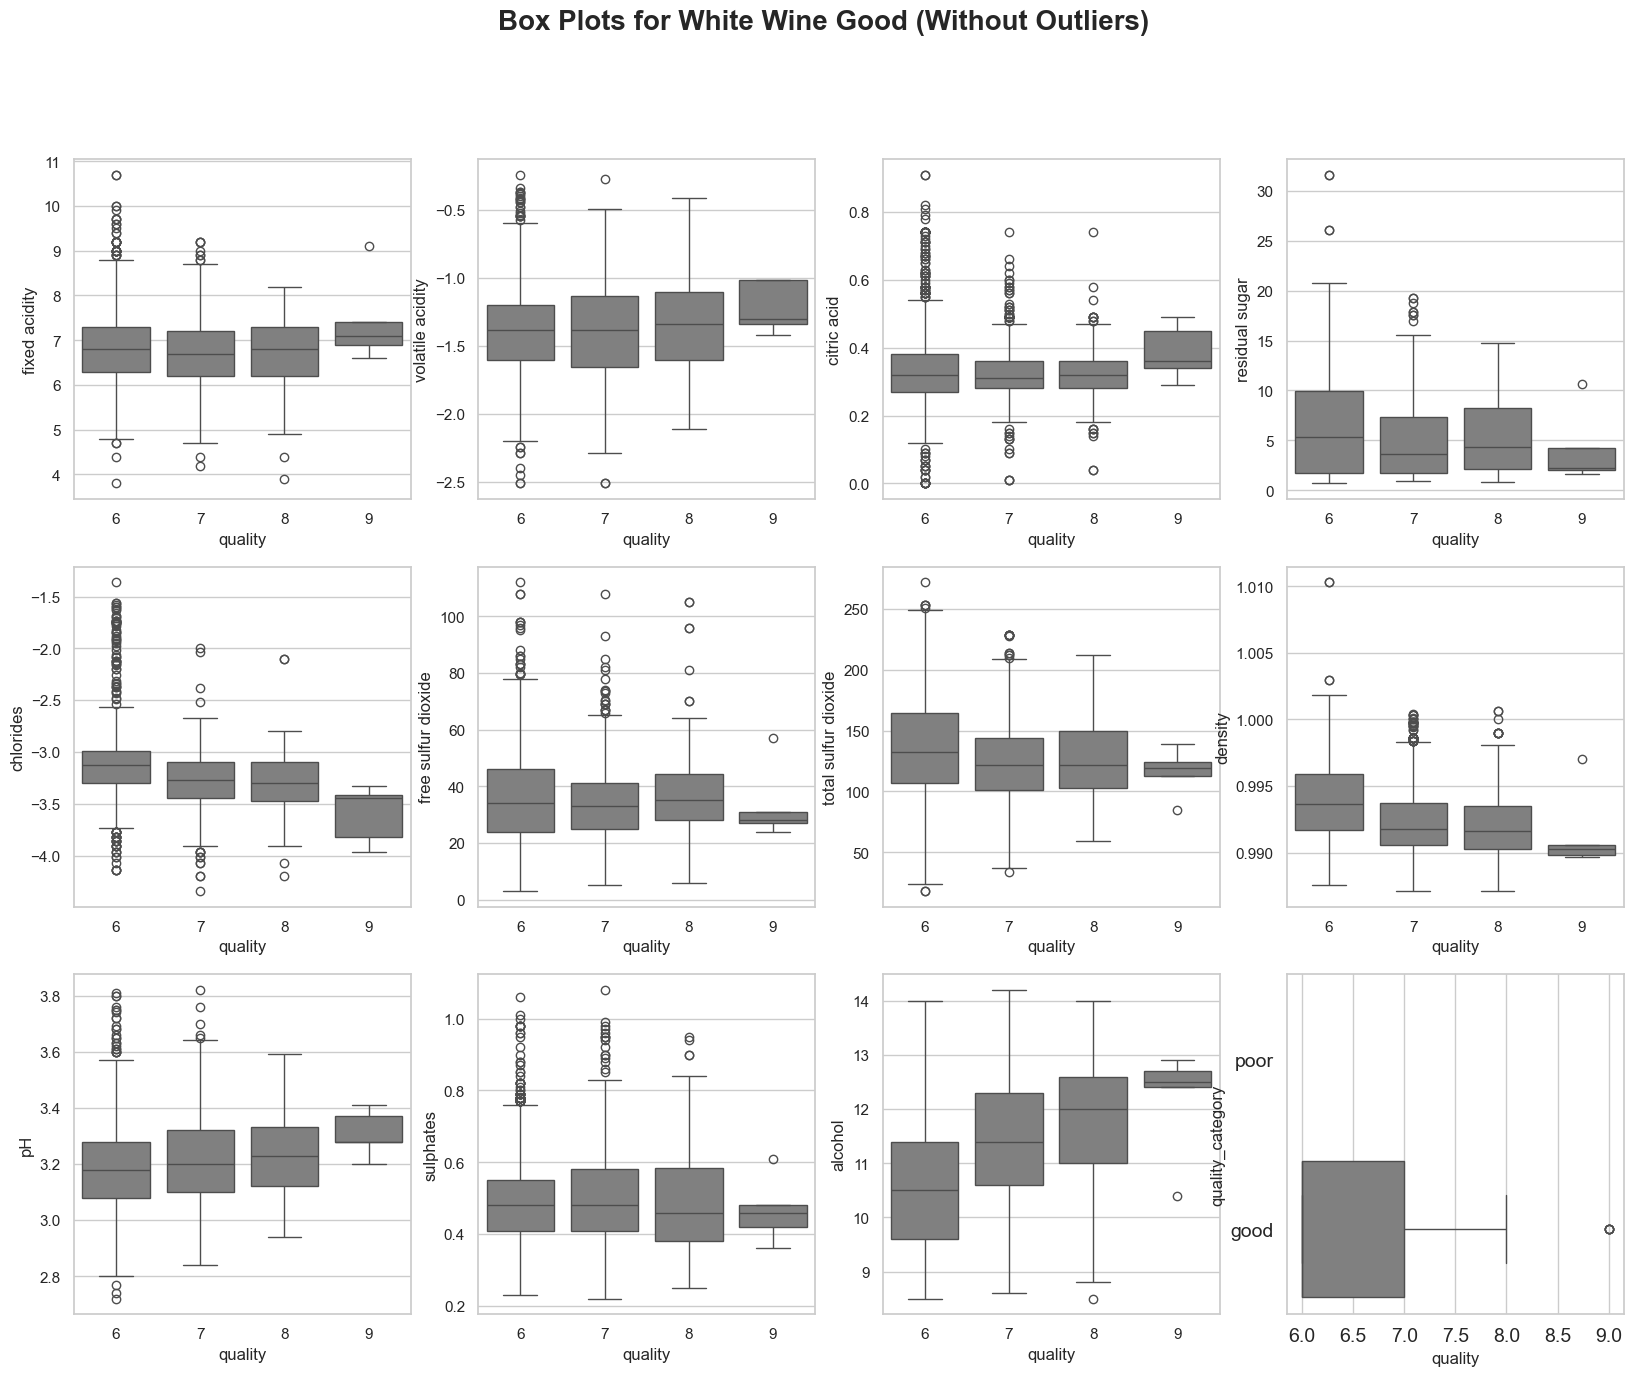

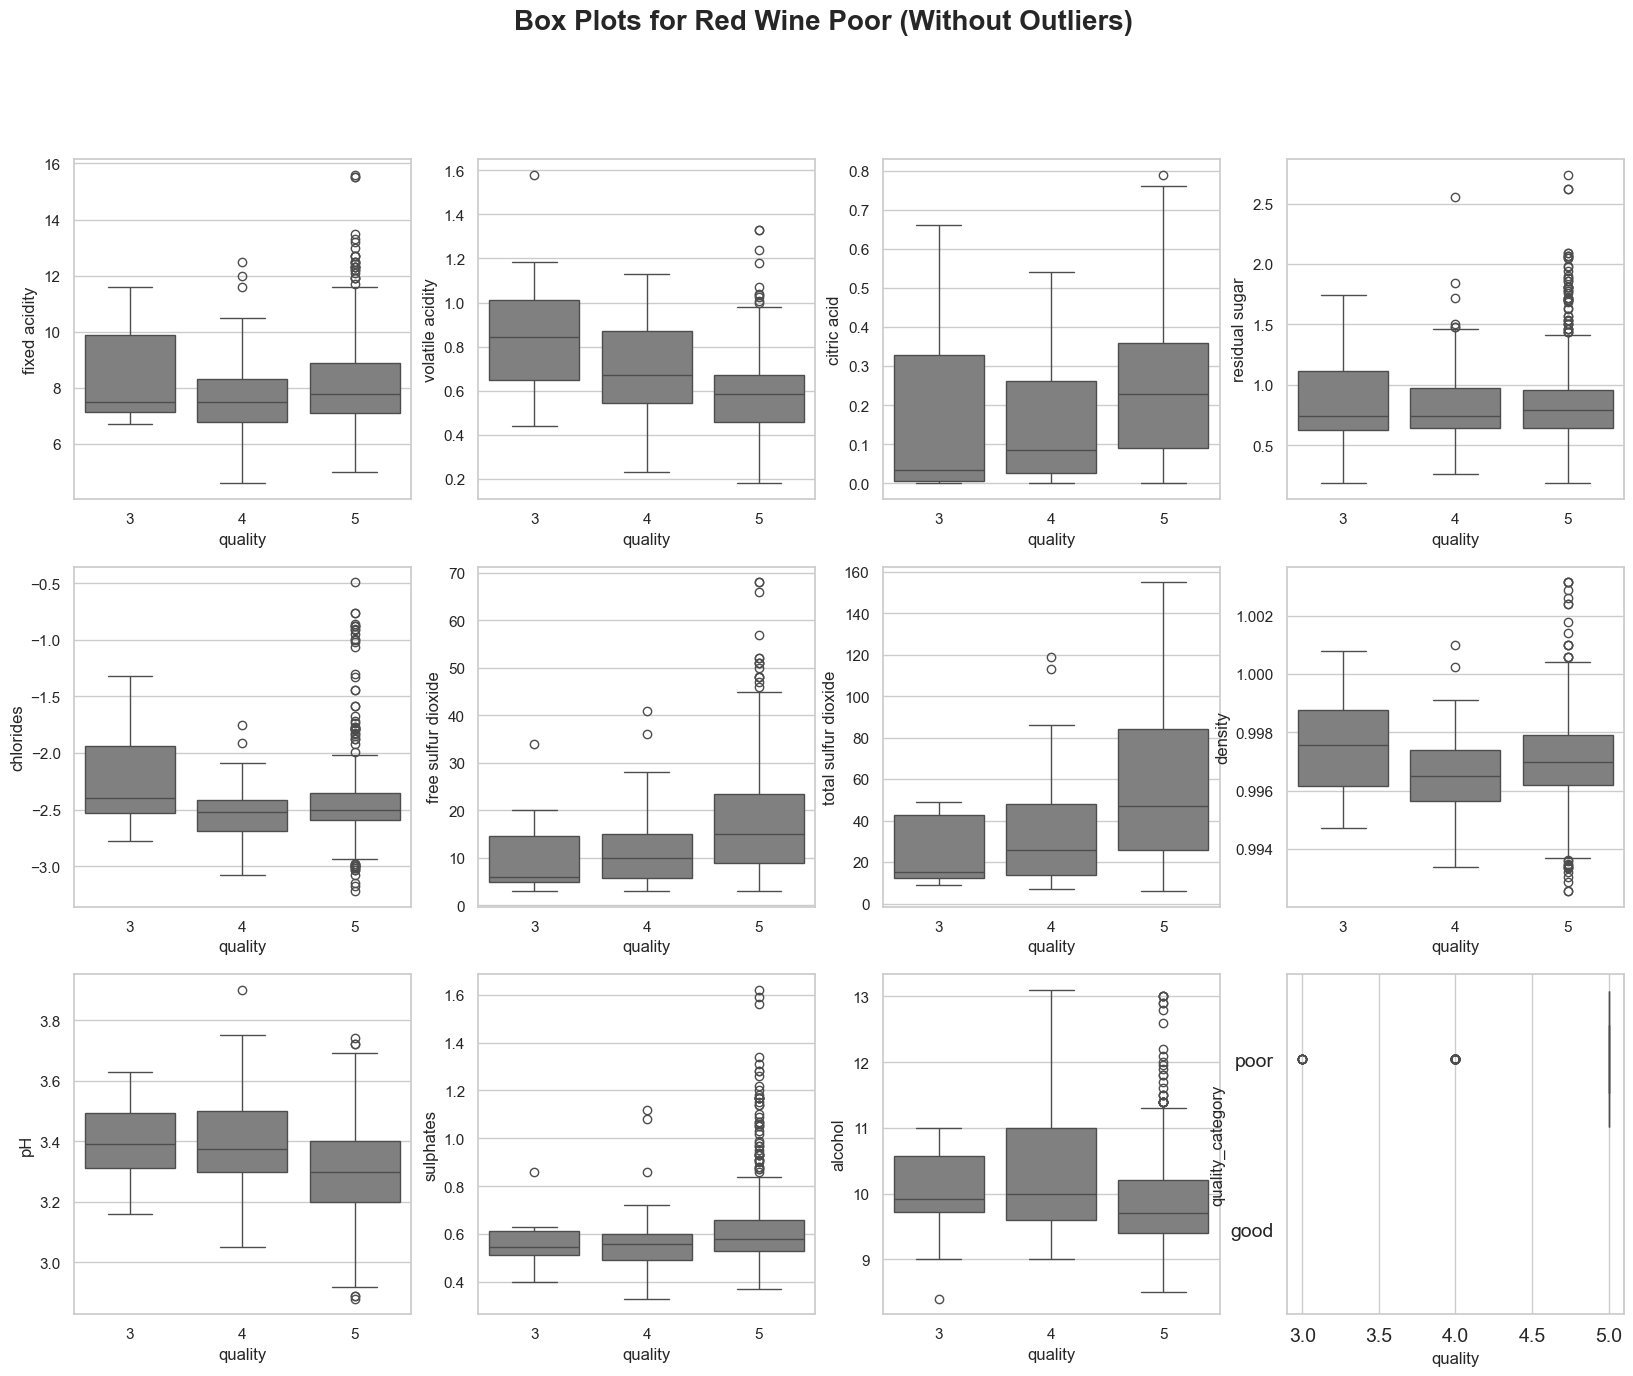

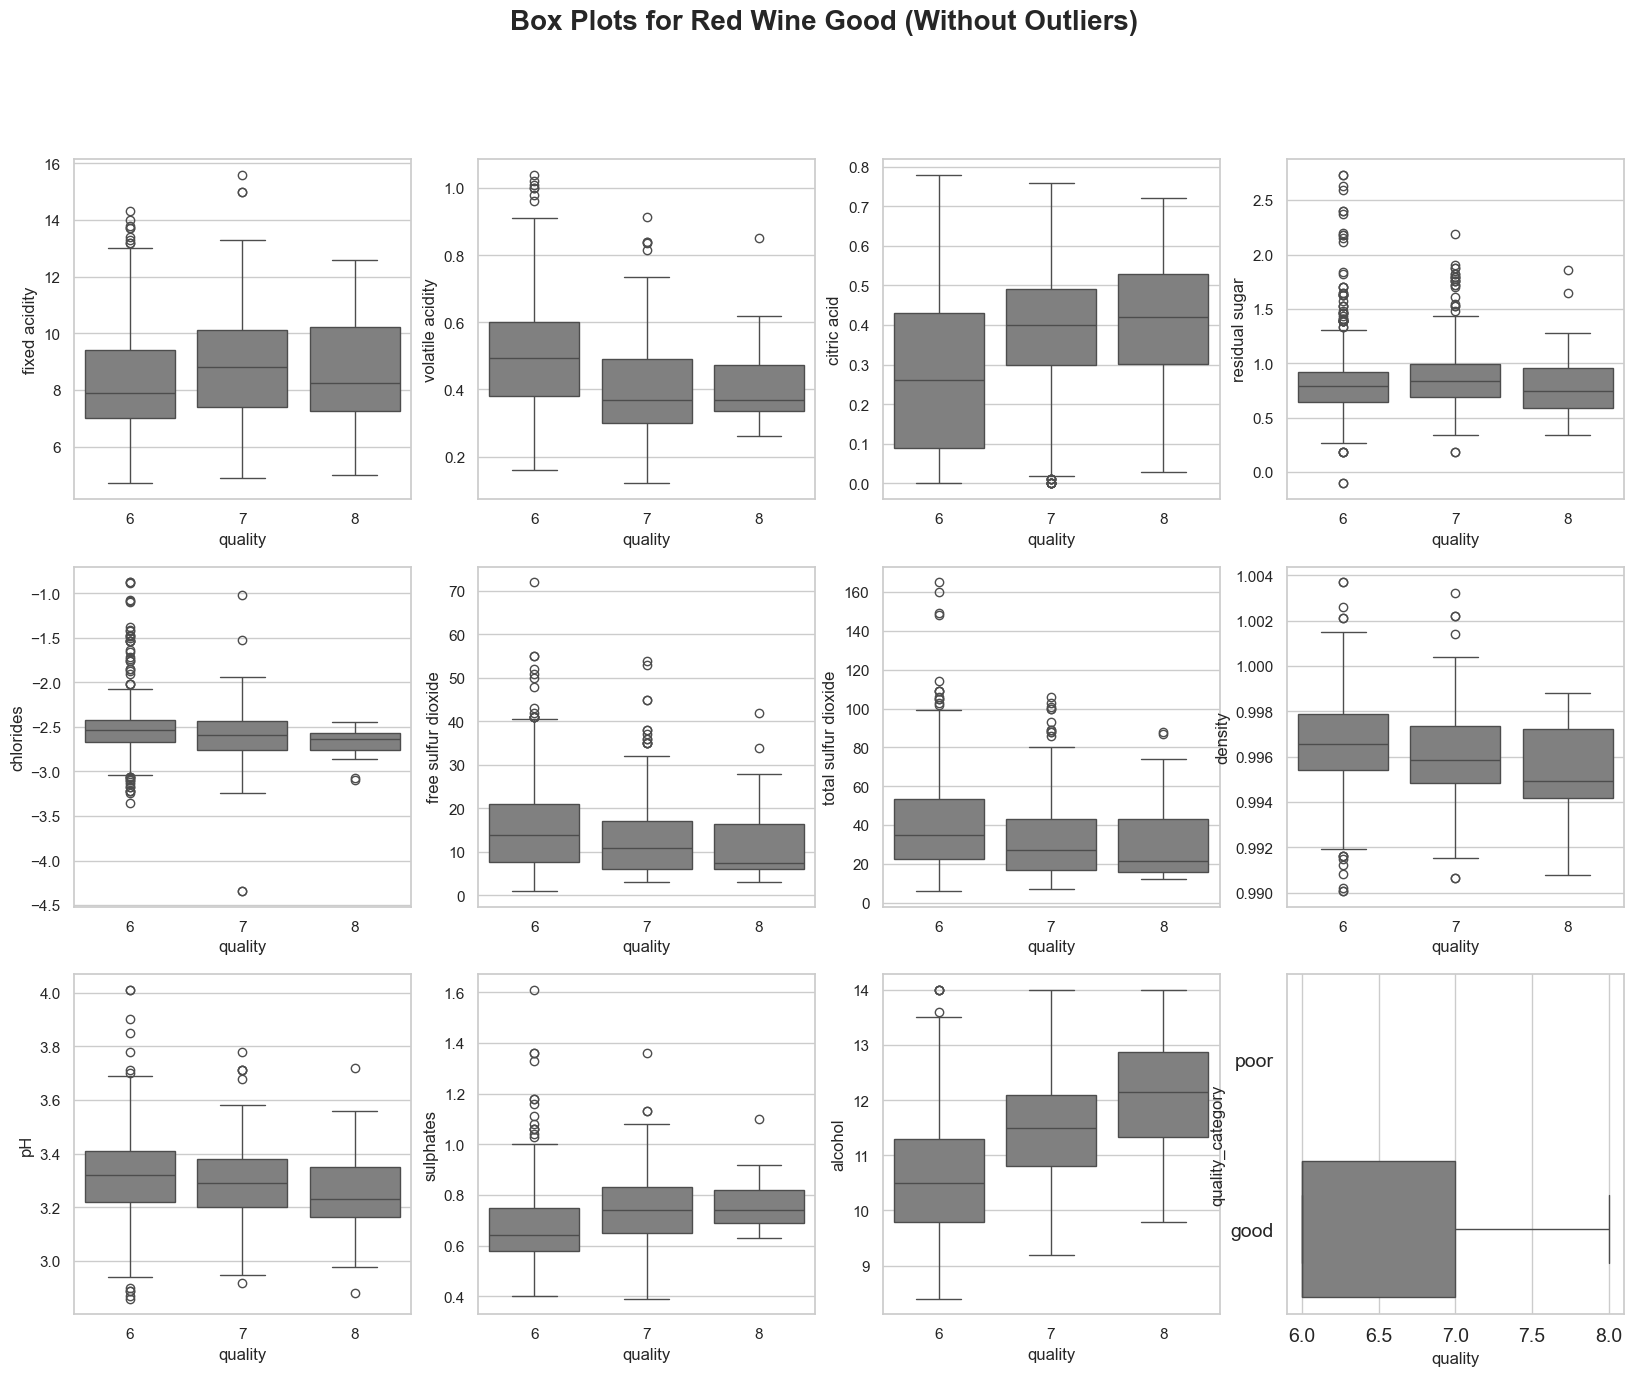

In [538]:
create_plots(create_box_plot, wine_quality_without_outliers_dfs)

Create heatmaps to understant the relationship between features and wine quality score.

In [539]:
def create_corr_matrix(wine_type_df):
       numeric_columns = check_numeric_columns(wine_type_df)
       return wine_type_df[numeric_columns].corr()


def create_clustermap(wine_type_df):
    correlation_matrix = create_corr_matrix(wine_type_df)

    pvalues = correlation_matrix.apply(lambda x: correlation_matrix.columns.map(lambda y: pearsonr(wine_type_df[x.name], wine_type_df[y])[1]))
    
    mask_significant = pvalues > 0.05

    g = sns.clustermap(correlation_matrix, mask=mask_significant, annot=True, square=True,
                       cmap='seismic', row_cluster=True, col_cluster=True,
                       linewidths=.5, vmax=1, vmin=-1, annot_kws={'size': 10}, figsize=(12, 12))

    g.ax_row_dendrogram.set_visible(False)

    g.fig.suptitle(f'Correlation Matrix Clustermap for {get_wine_str(wine_type_df)} ', fontsize=20, weight='bold', y=1.05)
    plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=12, rotation=45, ha='right')
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=12)
    plt.show()

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


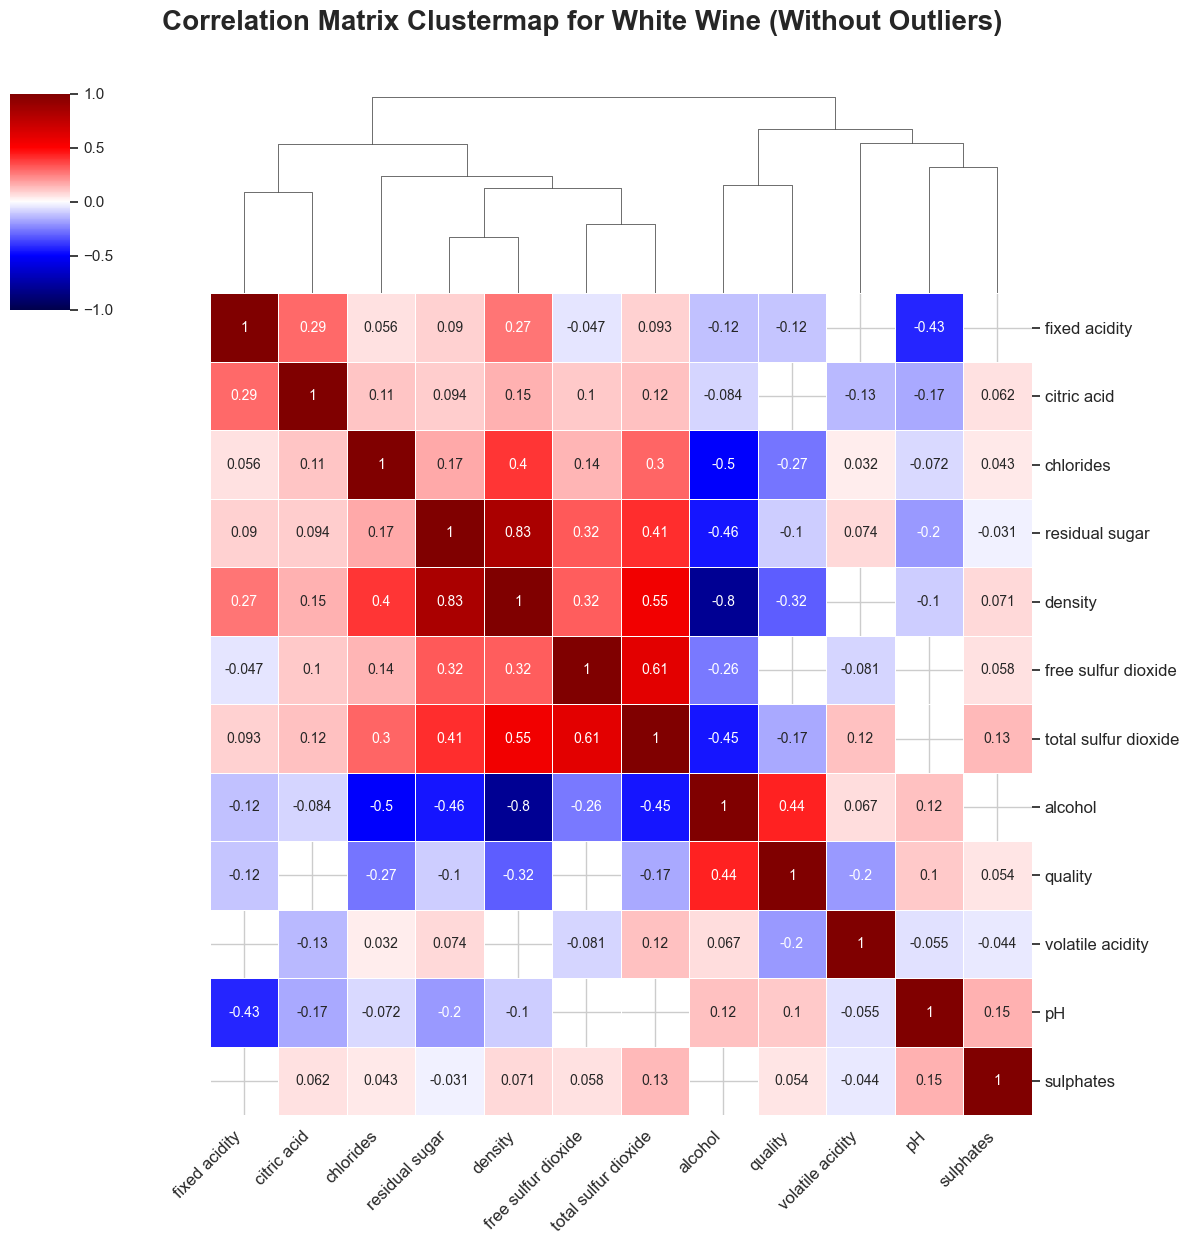

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


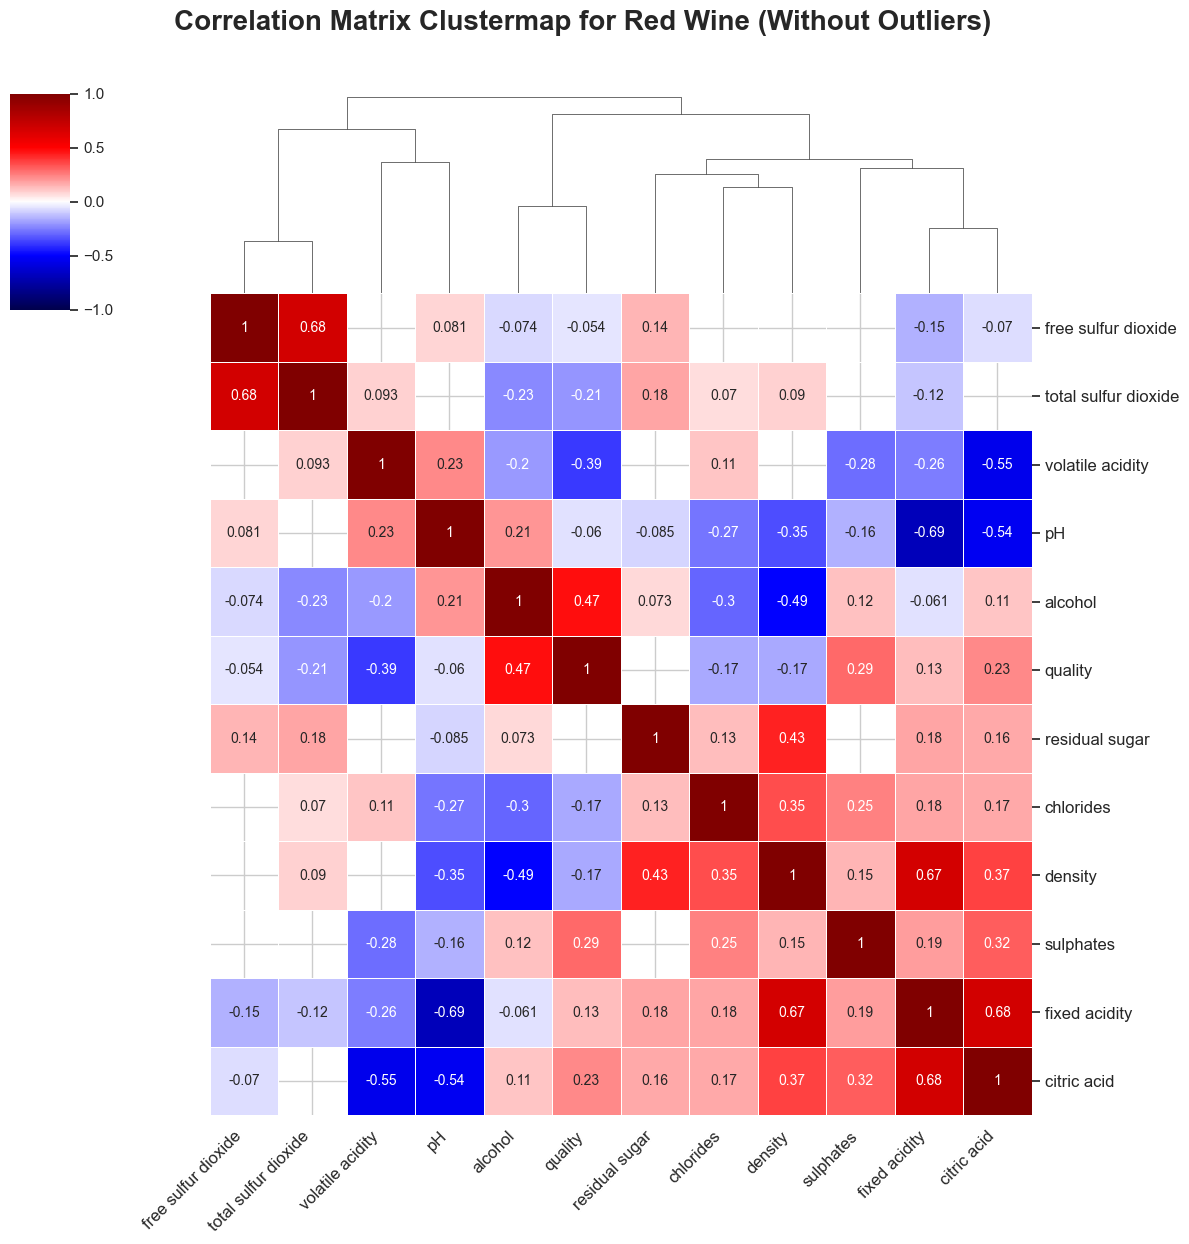

In [540]:
create_plots(create_clustermap, wine_without_outliers_dfs)

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


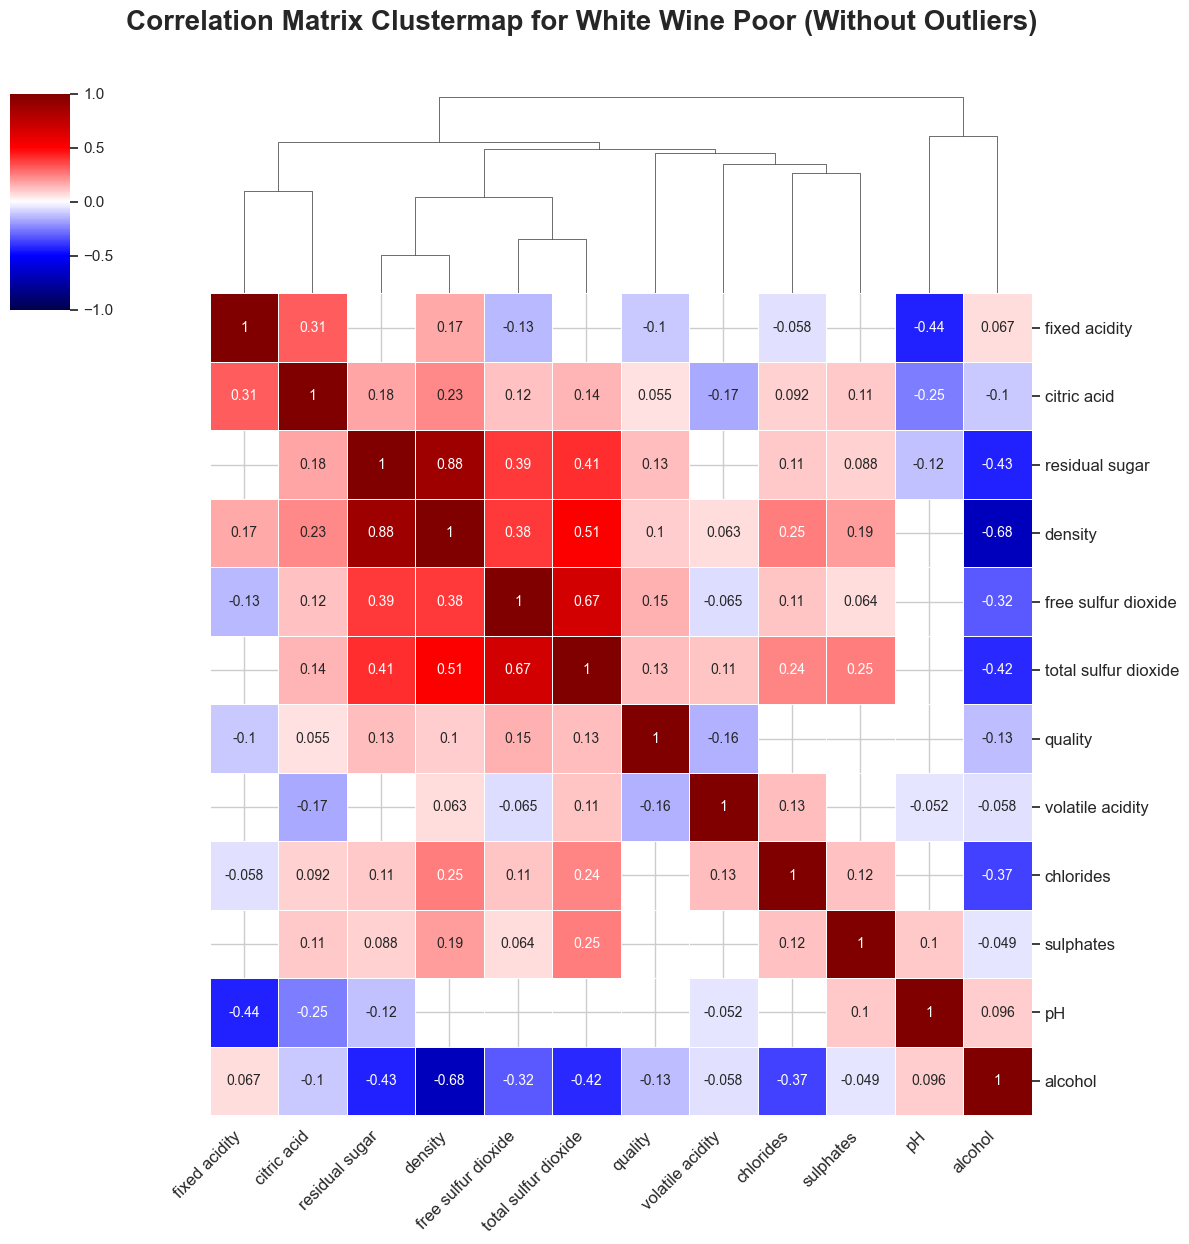

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


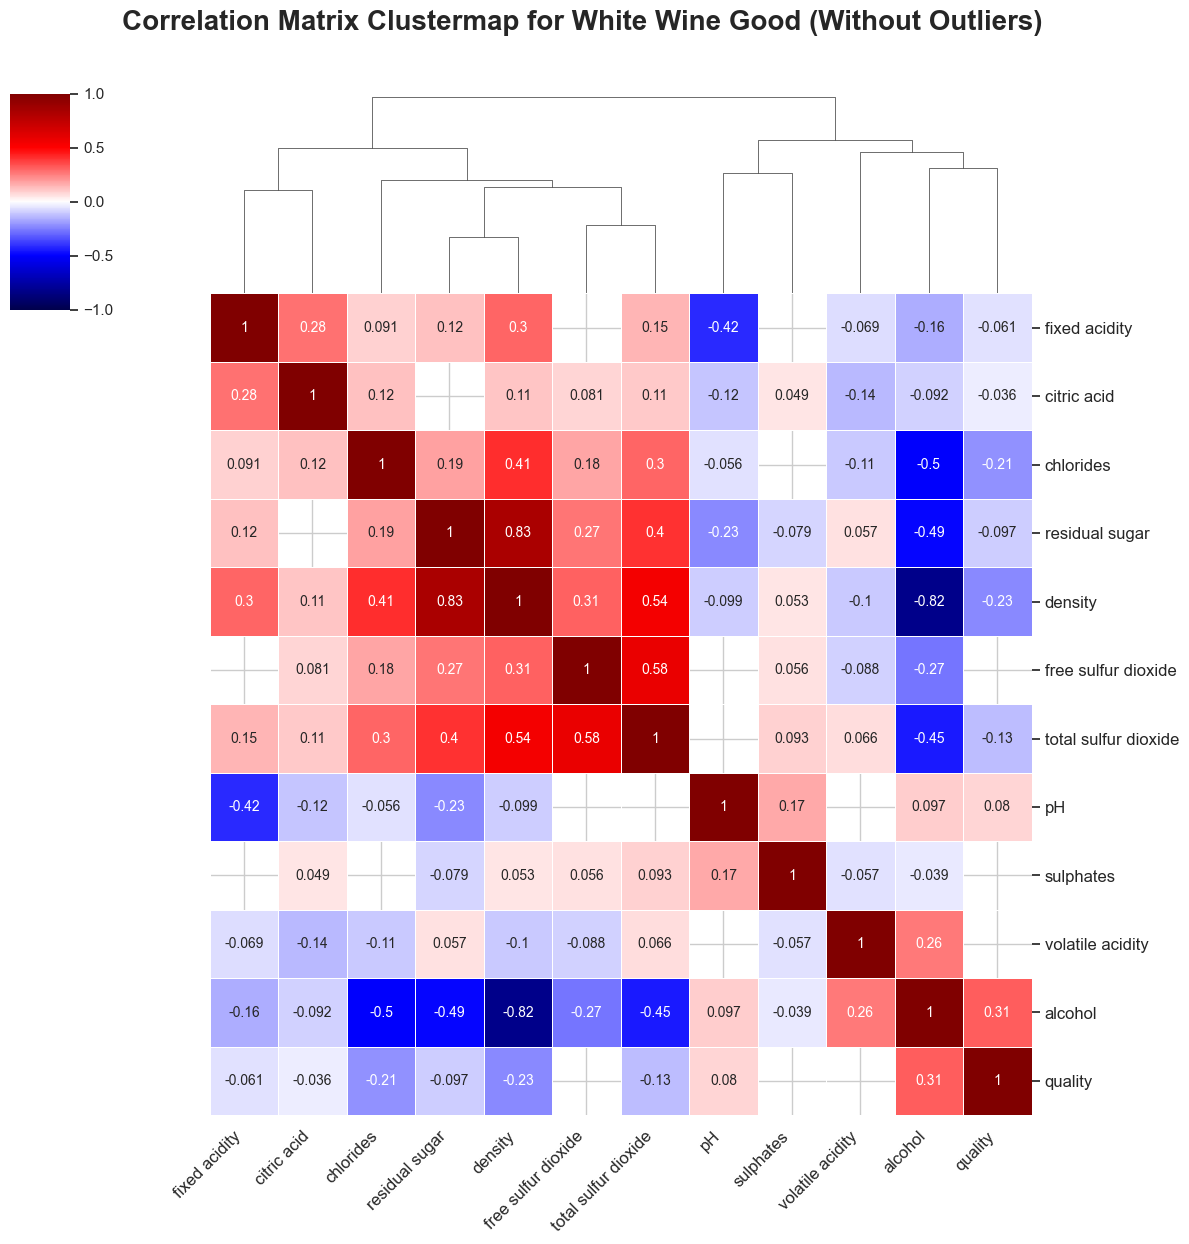

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


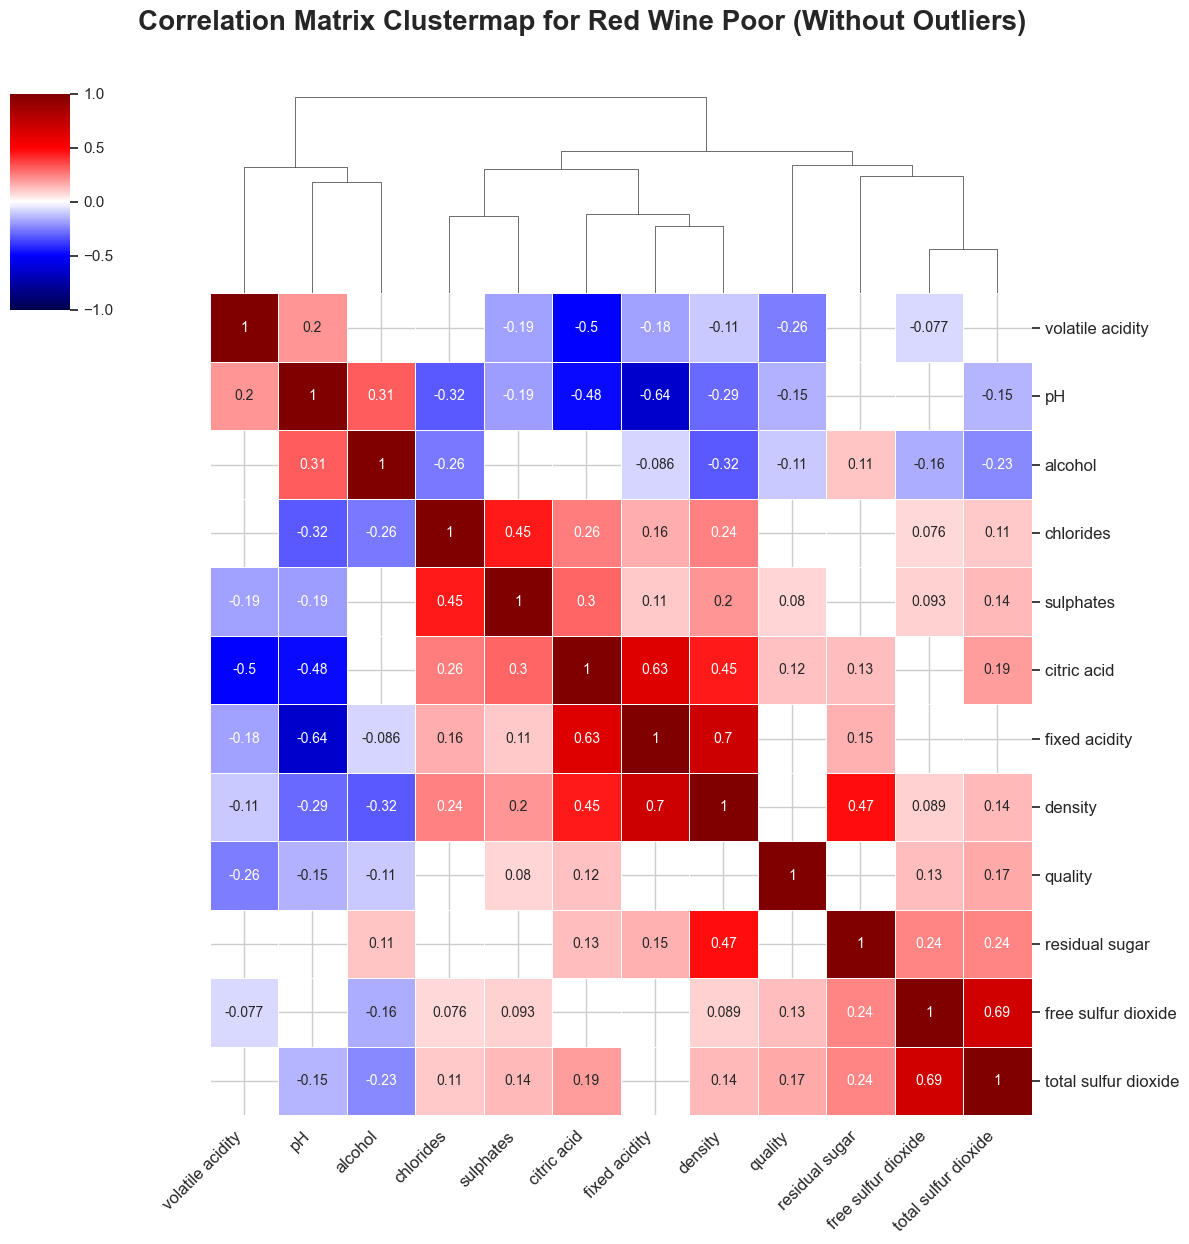

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


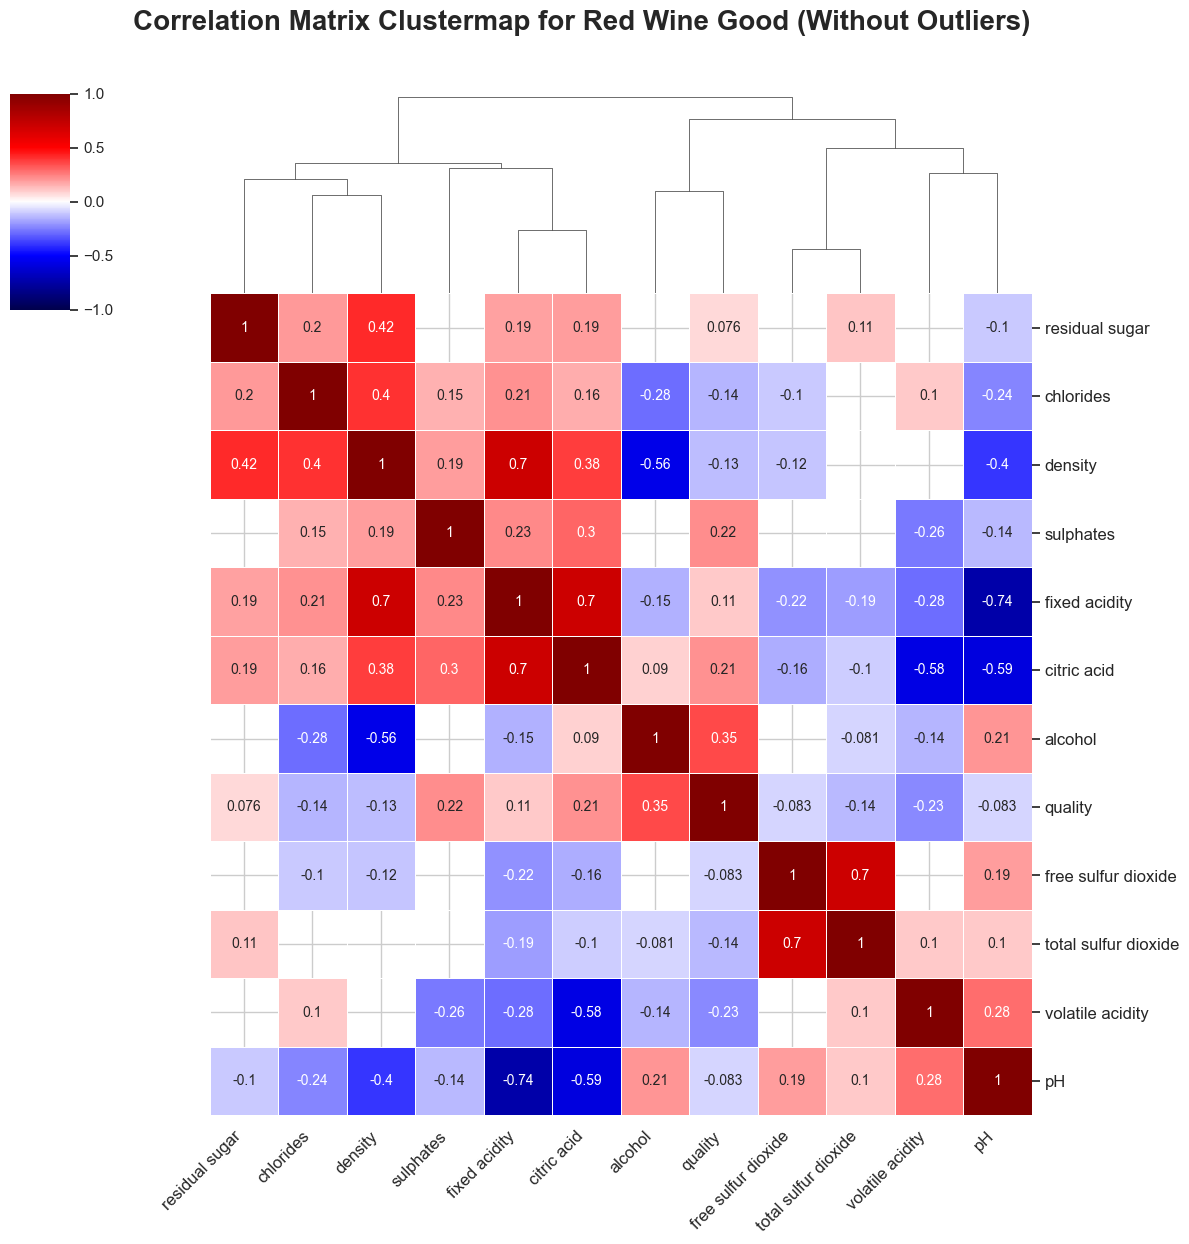

In [541]:
create_plots(create_clustermap, wine_quality_without_outliers_dfs)

In [542]:
def create_corr_with_target(wine_type_df, target = 'quality'):
    correlation_matrix = create_corr_matrix(wine_type_df)
    correlation_with_target = correlation_matrix[target].sort_values(key=abs, ascending=False)

    return correlation_with_target


def return_top_features_with_target(wine_type_df, n = 8):
    '''
    A function that return top features that are related to the target column.
    '''
    correlation_with_target = create_corr_with_target(wine_type_df)

    top_features = correlation_with_target[1:n+1].index.tolist() 
    return top_features

In [684]:
def return_features_among_highly_associated(wine_type_df, threshold = 0.5, n =8 ):

    correlation_matrix = create_corr_matrix(wine_type_df)
    correlation_with_target = create_corr_with_target(wine_type_df)

    selected_features = [correlation_with_target.index[1]] 
    print(correlation_with_target.index[1] )

    for feature in correlation_with_target.index[2:]:
        if all(abs(correlation_matrix[feature][selected_feature]) < threshold for selected_feature in selected_features):
            selected_features.append(feature)
            if len(selected_features) == n: 
                break

    return selected_features

return_features_among_highly_associated(df_red_good_without_outliers)

alcohol


['alcohol',
 'volatile acidity',
 'sulphates',
 'chlorides',
 'total sulfur dioxide',
 'fixed acidity',
 'residual sugar']

In [750]:
import pandas as pd

# Assuming df_wine is your DataFrame
# If not, replace it with your actual DataFrame name
def find_highly_correlated_pairs(df):
    # Compute the correlation matrix
    correlation_matrix = df.iloc[:,:-2].corr()

    # Set a threshold for correlation (adjust as needed)
    correlation_threshold = 0.4

    # Find pairs of highly correlated features
    highly_correlated_pairs = []

    # Iterate through the correlation matrix and find pairs
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
                highly_correlated_pairs.append(pair)
    return highly_correlated_pairs


from itertools import combinations


def find_features_for_model(df,pairs):
    
    all_features = list(df.iloc[:,:-2].columns)

    flat_highly_correlated_pairs = [feature for pair in pairs for feature in pair]

    # Find features not in any highly correlated pair
    features_not_in_pairs = [feature for feature in all_features if feature not in flat_highly_correlated_pairs]

    # Initialize an empty list to store all combinations
    all_feature_combinations = []

    # Print or use the list of all feature combinations
    print("All combinations of feature lists:")
    for combination in all_feature_combinations:
        print(combination)


df_white_good_pairs=find_highly_correlated_pairs(df_white_good_without_outliers)
find_features_for_model(df_red_good_without_outliers, df_white_good_pairs)
# Flatten the list of highly correlated pairs
flat_highly_correlated_pairs = [feature for pair in df_white_good_pairs for feature in pair]

pairs = [('citric acid', 'fixed acidity'), 
         ('citric acid', 'volatile acidity'), 
         ('total sulfur dioxide', 'free sulfur dioxide'), 
         ('density', 'fixed acidity'), 
         ('density', 'residual sugar'), 
         ('pH', 'fixed acidity'), 
         ('pH', 'citric acid'), 
         ('alcohol', 'density')]
def lis(pairs):
    one = []

    l = []
    for first in flat_highly_correlated_pairs:
        
        one.append(l)
        l = []
        l.append(first)
        for j in range(2):
            for i in range(len(pairs)):
                for element in pairs[i]:
                    print(element)
                    if not any(element in par for par in pairs for elemnt in l):
                        #print('taaa')
                        if element not in l:
                            l.append(element)
                        
    return one

lis(pairs)


    
        

All combinations of feature lists:
citric acid
fixed acidity
citric acid
volatile acidity
total sulfur dioxide
free sulfur dioxide
density
fixed acidity
density
residual sugar
pH
fixed acidity
pH
citric acid
alcohol
density
citric acid
fixed acidity
citric acid
volatile acidity
total sulfur dioxide
free sulfur dioxide
density
fixed acidity
density
residual sugar
pH
fixed acidity
pH
citric acid
alcohol
density
citric acid
fixed acidity
citric acid
volatile acidity
total sulfur dioxide
free sulfur dioxide
density
fixed acidity
density
residual sugar
pH
fixed acidity
pH
citric acid
alcohol
density
citric acid
fixed acidity
citric acid
volatile acidity
total sulfur dioxide
free sulfur dioxide
density
fixed acidity
density
residual sugar
pH
fixed acidity
pH
citric acid
alcohol
density
citric acid
fixed acidity
citric acid
volatile acidity
total sulfur dioxide
free sulfur dioxide
density
fixed acidity
density
residual sugar
pH
fixed acidity
pH
citric acid
alcohol
density
citric acid
fixed ac

[[],
 ['total sulfur dioxide'],
 ['free sulfur dioxide'],
 ['density'],
 ['residual sugar'],
 ['density'],
 ['chlorides'],
 ['density'],
 ['total sulfur dioxide'],
 ['pH'],
 ['fixed acidity'],
 ['alcohol'],
 ['residual sugar'],
 ['alcohol'],
 ['chlorides'],
 ['alcohol'],
 ['total sulfur dioxide'],
 ['alcohol']]

In [544]:
top_features_dict = {}
features_among_highly_associated_dict = {}

for wine_df in wine_quality_without_outliers_dfs:
    df_name = get_wine_str(wine_df)
    # print(df_name)
    top_features_dict[df_name] = return_top_features_with_target(wine_df)
    features_among_highly_associated_dict[df_name] = return_features_among_highly_associated(wine_df)

In [545]:
whole_dataset_top_features_dict = {}
whole_dataset_features_among_highly_associated_dict = {}

for wine_df in wine_without_outliers_dfs:
    df_name = get_wine_str(wine_df)
    # print(df_name)
    whole_dataset_top_features_dict[df_name] = return_top_features_with_target(wine_df)
    whole_dataset_features_among_highly_associated_dict[df_name] = return_features_among_highly_associated(wine_df)


In [546]:
whole_dataset_features_among_highly_associated_dict

{'White Wine (Without Outliers)': ['alcohol',
  'volatile acidity',
  'total sulfur dioxide',
  'fixed acidity',
  'pH',
  'residual sugar',
  'sulphates',
  'citric acid'],
 'Red Wine (Without Outliers)': ['alcohol',
  'volatile acidity',
  'sulphates',
  'total sulfur dioxide',
  'density',
  'chlorides',
  'pH',
  'residual sugar']}

## Visualize Data

1) Quality distribiution based on the wine type (color)

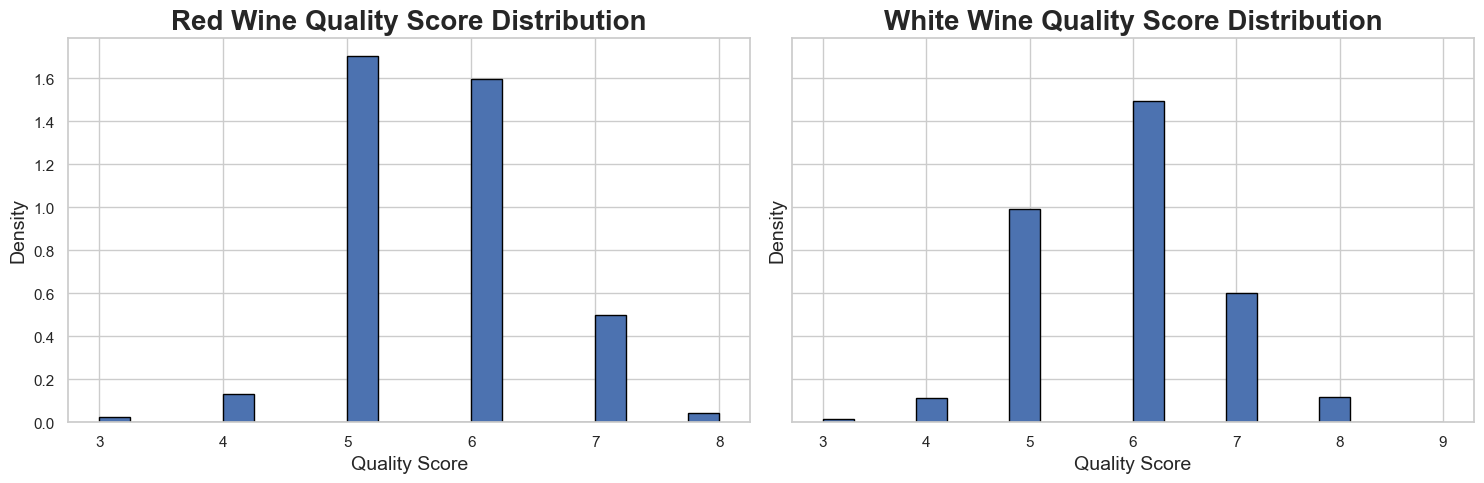

In [547]:
def visualize_quality_histogram(datasets):
    """
    Visualizes the distribution of the 'quality' column for each dataset.
    - datasets: A list of tuples, where each tuple contains a DataFrame and a name.
    """
    num_datasets = len(datasets)
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5), sharey=True)

    # create graphs
    for i, (df, name) in enumerate(datasets):
        quality_column = df['quality']
        axes[i].hist(quality_column, bins=20, edgecolor='black', density=True)
        #describe the plot
        axes[i].set_xlabel('Quality Score', fontsize=14)
        axes[i].set_ylabel('Density', fontsize=14)
        axes[i].set_title(f'{name} Quality Score Distribution', fontsize=20, weight='bold')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

datasets = [
    (df_red_wine, 'Red Wine'),
    (df_white_wine, 'White Wine')
]

visualize_quality_histogram(datasets)



### Clustermap of date

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


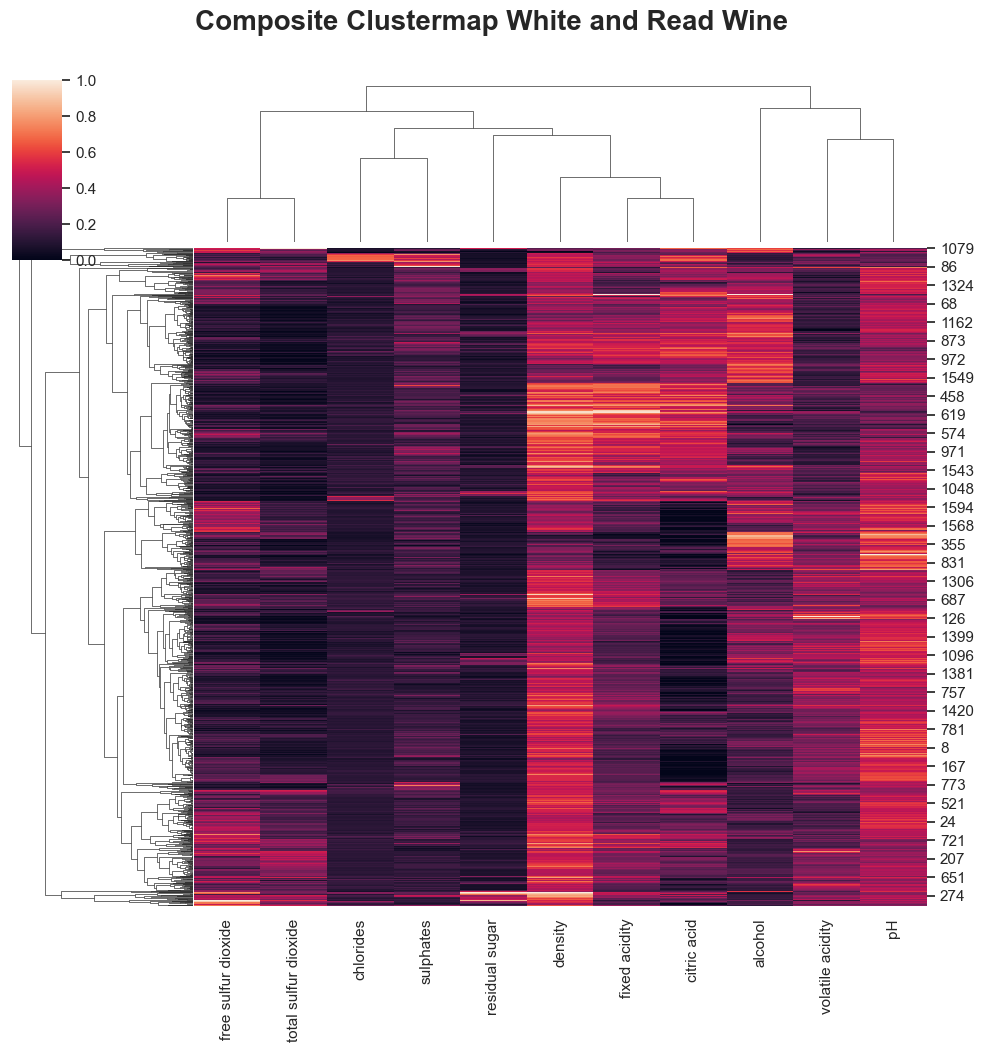

In [548]:
#create clustermap
sns.clustermap(df_red_wine.iloc[:,:-1], metric="correlation", standard_scale=1)
plt.suptitle('Composite Clustermap White and Read Wine', fontsize=20, y=1.05, weight ='bold')
plt.show()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6491            6.2              0.21         0.29             1.6      0.039   
6492            6.6              0.32         0.36             8.0      0.047   
6493            6.5              0.24         0.19             1.2      0.041   
6494            5.5              0.29         0.30             1.1      0.022   
6495            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


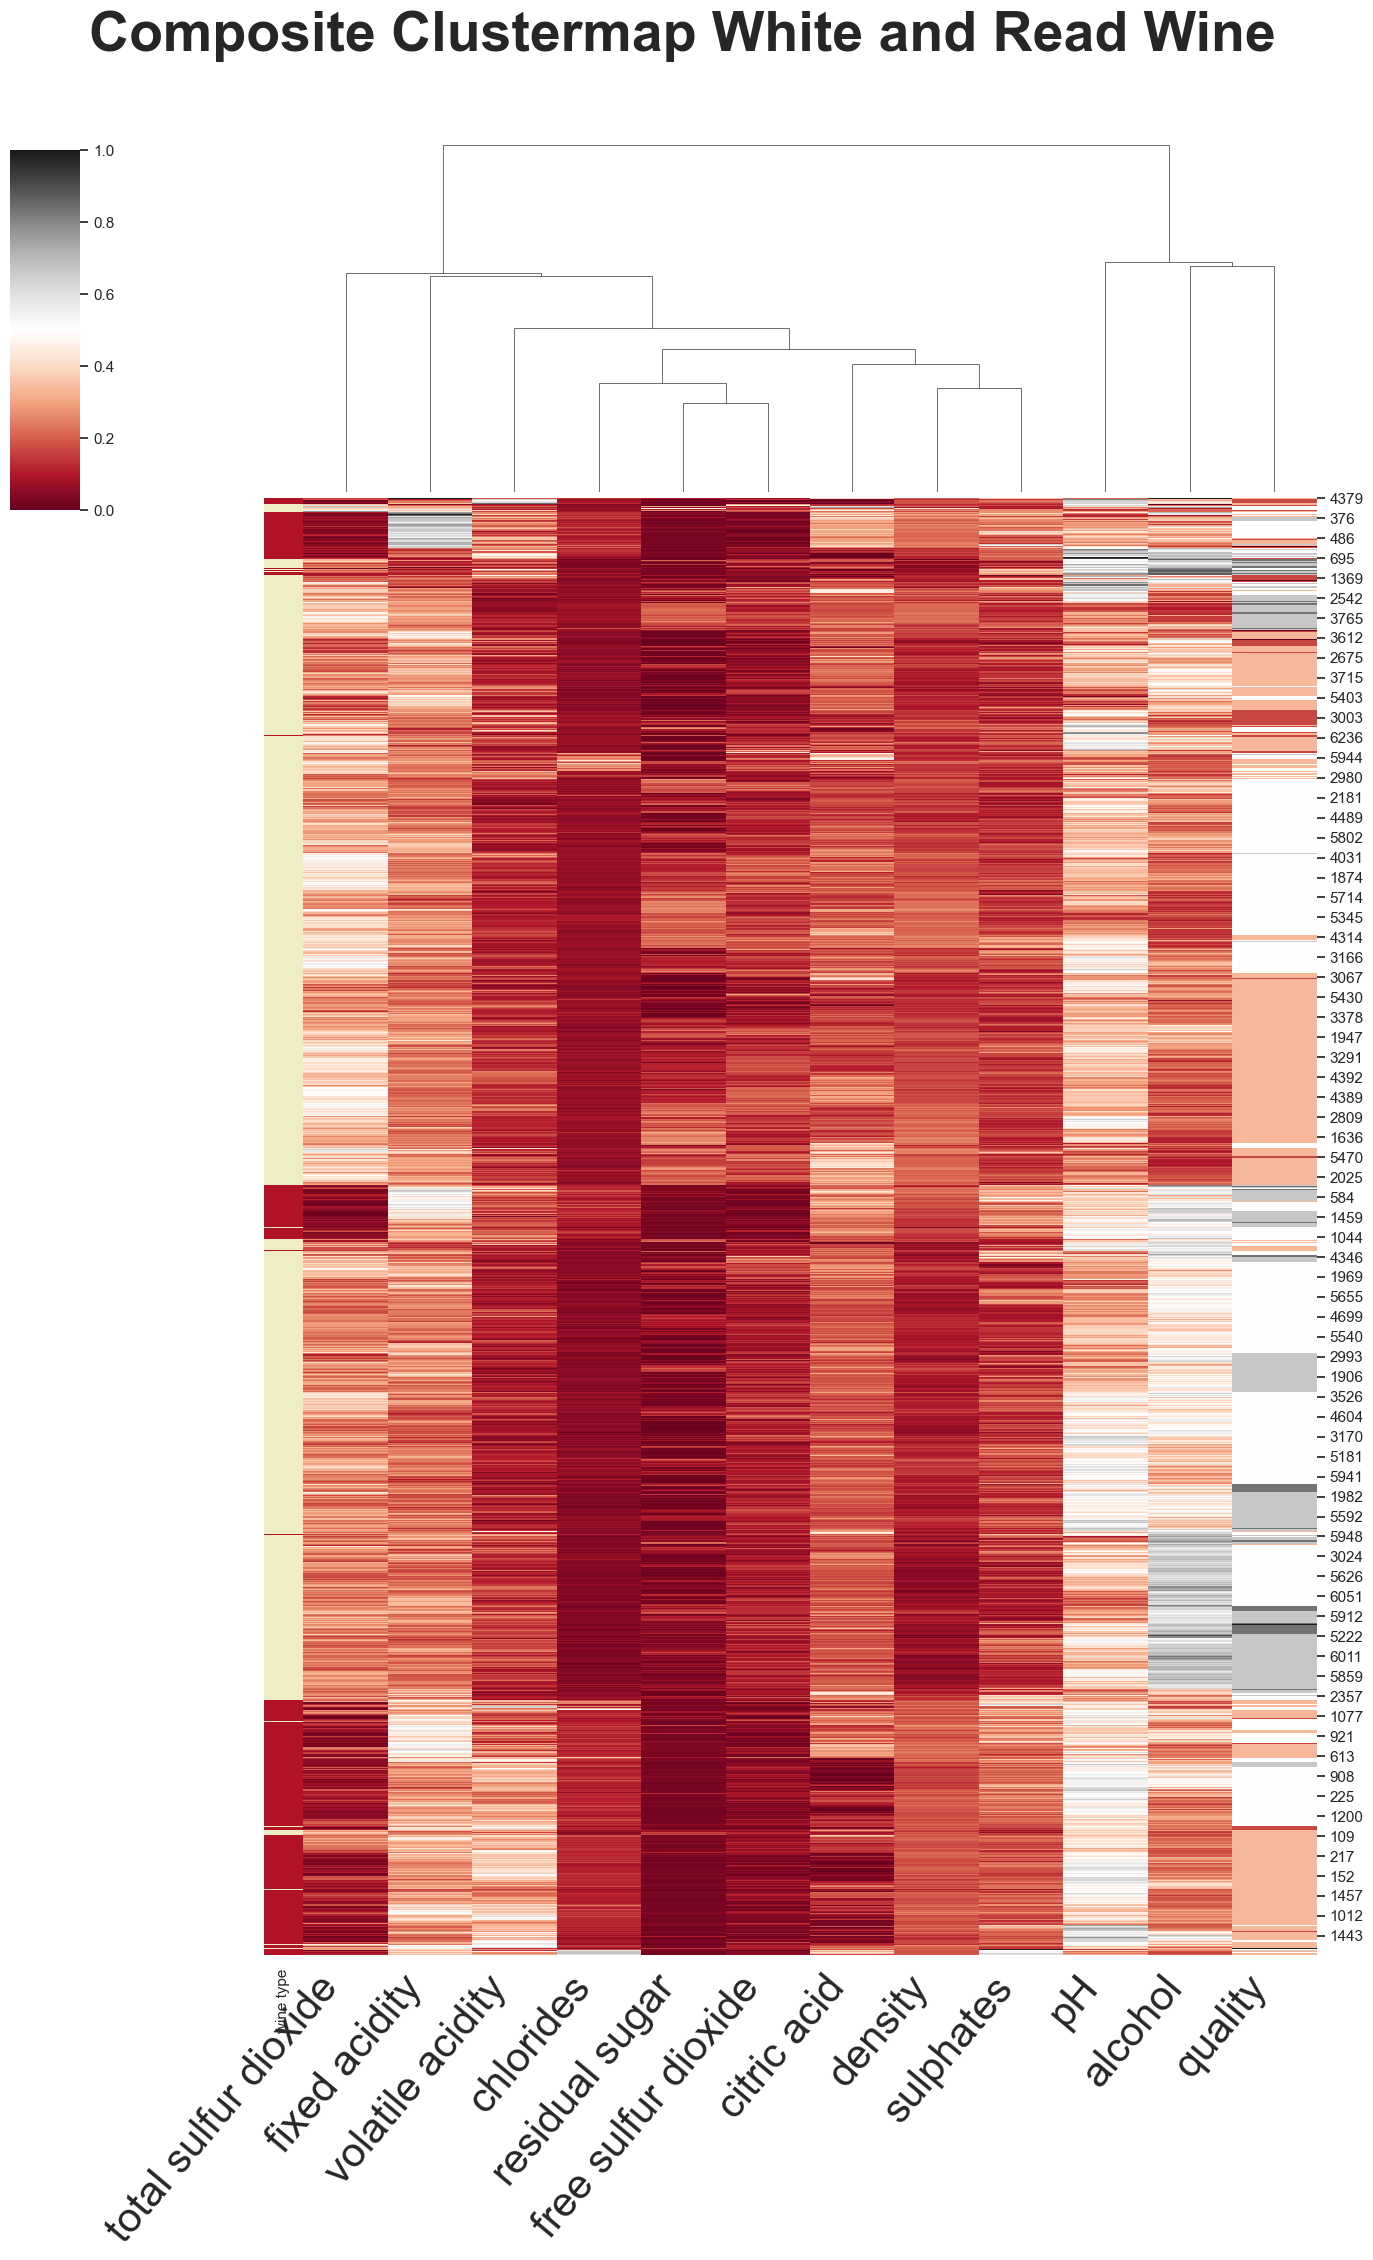

In [599]:
df_red_wine['color'] = 1
df_white_wine['color'] = 2

df_wine = pd.concat([df_red_wine, df_white_wine[1:]], axis=0).reset_index(drop=True)

def create_cluster_by_rows(dataset):
    data = dataset.select_dtypes(include=['number'])
    print(data)

    #adding labels to rows
    agerange = data.pop("color")
    lut = {1: "#b11226", 2: "#EEEDC4"}
    row_colors = agerange.map(lut)
    df_colors = pd.DataFrame(data={'wine type': row_colors})

    #create the clustermap
    fig =sns.clustermap(df_wine.iloc[:,:-1], cmap='RdGy', row_colors=df_colors, annot_kws={'size': 20}, 
                standard_scale=1, figsize=(14, 20))
    
    fig.ax_row_dendrogram.set_visible(False)
    plt.suptitle('Composite Clustermap White and Read Wine', fontsize=40, y=1.05, weight ='bold')
    plt.setp(fig.ax_heatmap.get_xticklabels(), fontsize=30, rotation=50, ha='right')
    plt.show()

create_cluster_by_rows(df_wine)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6491            6.2              0.21         0.29             1.6      0.039   
6492            6.6              0.32         0.36             8.0      0.047   
6493            6.5              0.24         0.19             1.2      0.041   
6494            5.5              0.29         0.30             1.1      0.022   
6495            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


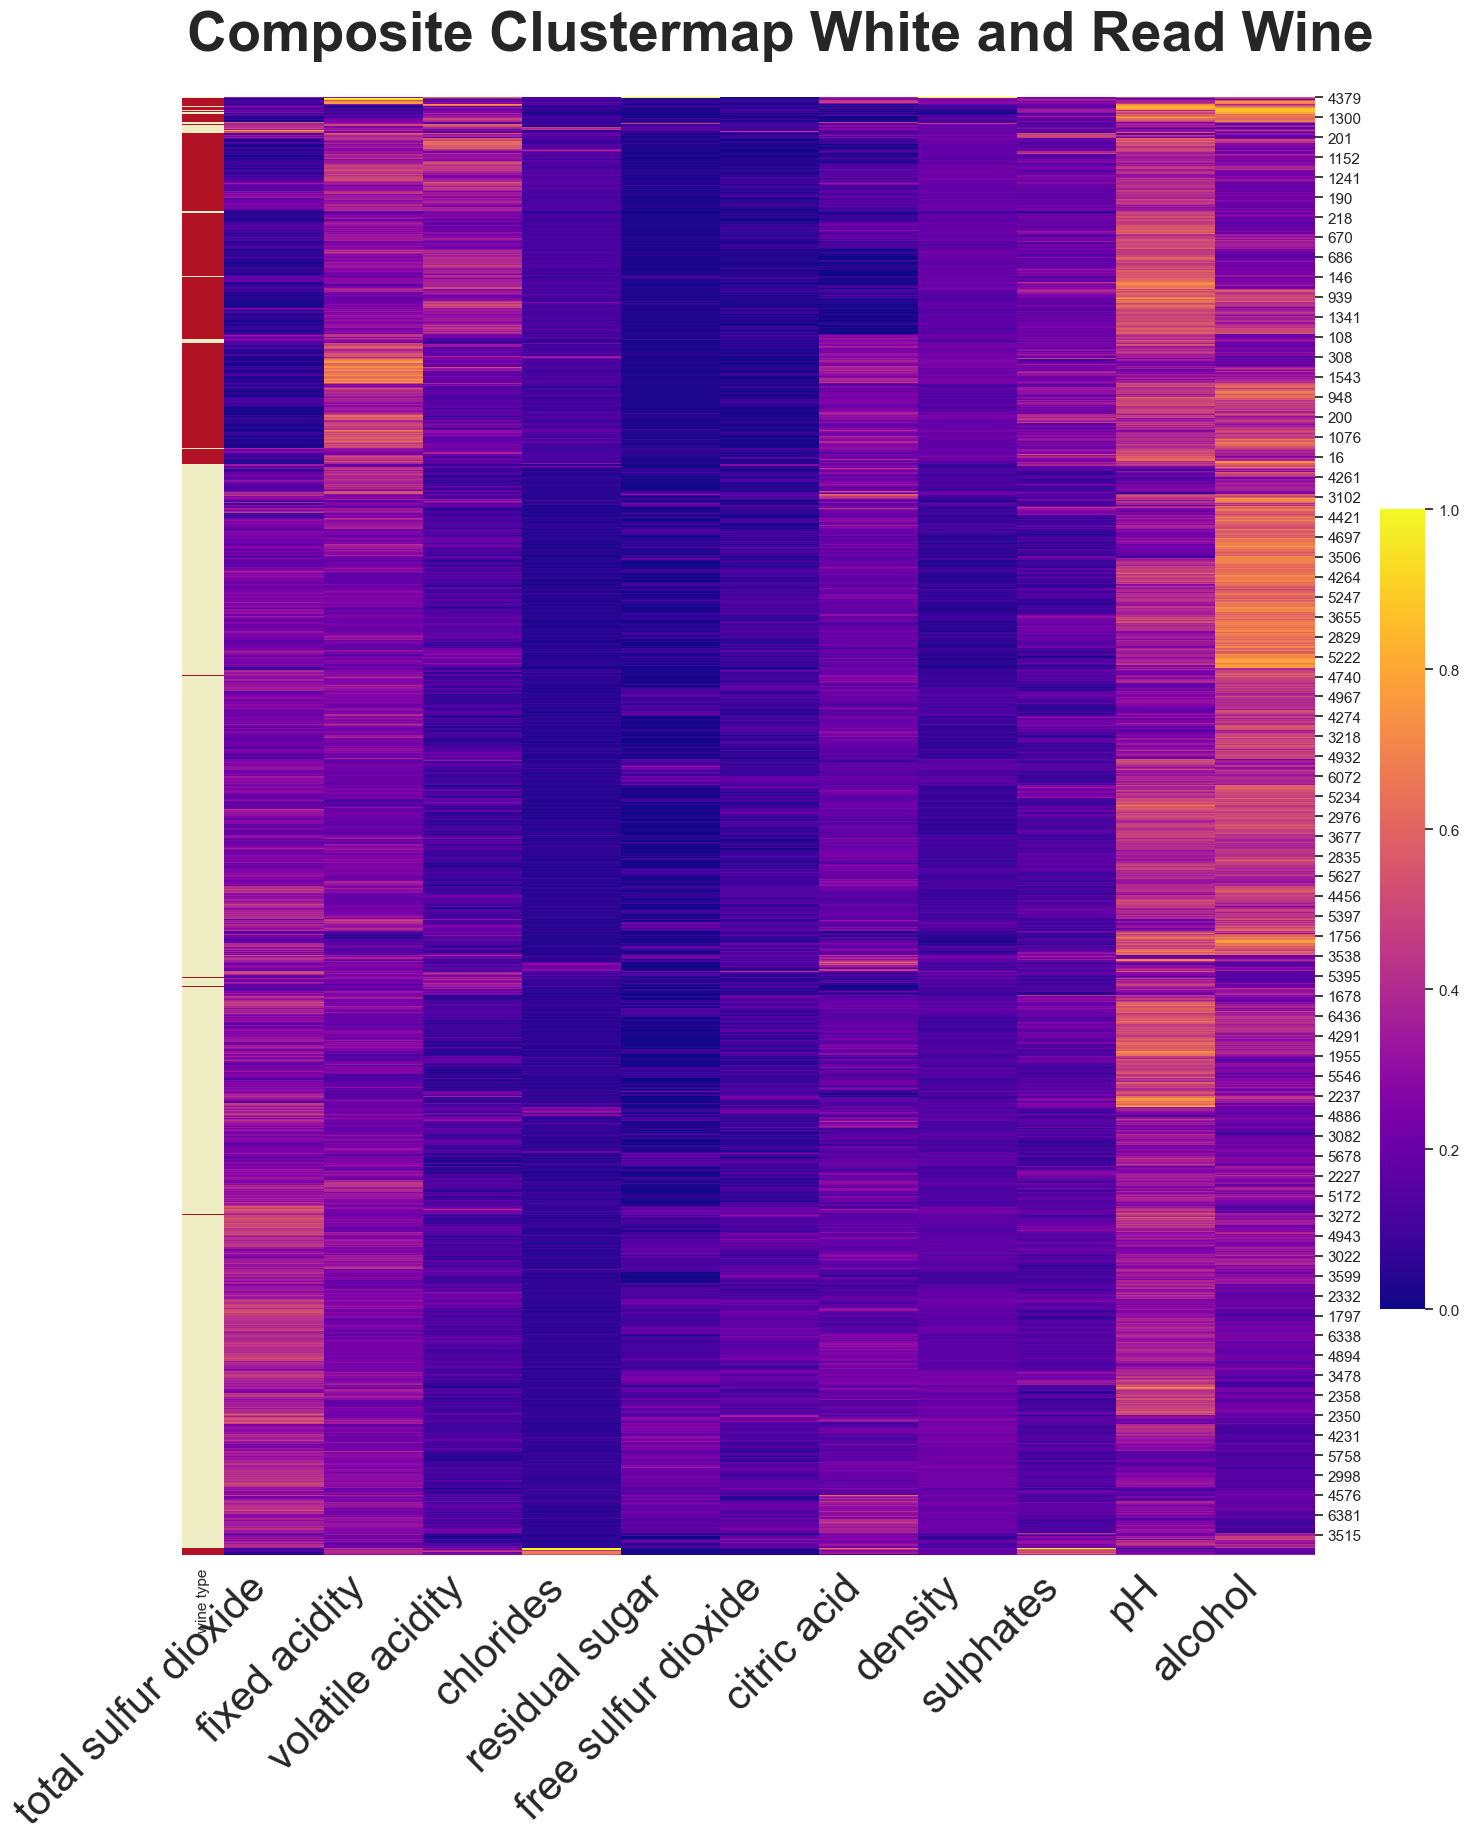

In [646]:
df_red_wine['color'] = 1
df_white_wine['color'] = 2

df_wine = pd.concat([df_red_wine, df_white_wine[1:]], axis=0).reset_index(drop=True)

def create_cluster_by_rows(dataset):
    data = dataset.select_dtypes(include=['number'])
    print(data)

    #adding labels to rows
    agerange = data.pop("color")
    lut = {1: "#b11226", 2: "#EEEDC4"}
    row_colors = agerange.map(lut)
    df_colors = pd.DataFrame(data={'wine type': row_colors})
    #create the clustermap
    g = sns.clustermap(df_wine.iloc[:,:-2], cmap='plasma', row_colors=df_colors, annot_kws={'size': 30}, 
                standard_scale=1, figsize=(15, 20))
    g.ax_row_dendrogram.set_visible(False)
    g.ax_col_dendrogram.set_visible(False)    
    plt.suptitle('Composite Clustermap White and Read Wine', fontsize=40, weight ='bold',y= 0.85, x = 0.60)
    plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=30, rotation = 45, ha='right')
    #g.fig.subplots_adjust(right=0.7)
    g.ax_cbar.set_position((1, .2, .03, .4))
    plt.show()

create_cluster_by_rows(df_wine)


c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


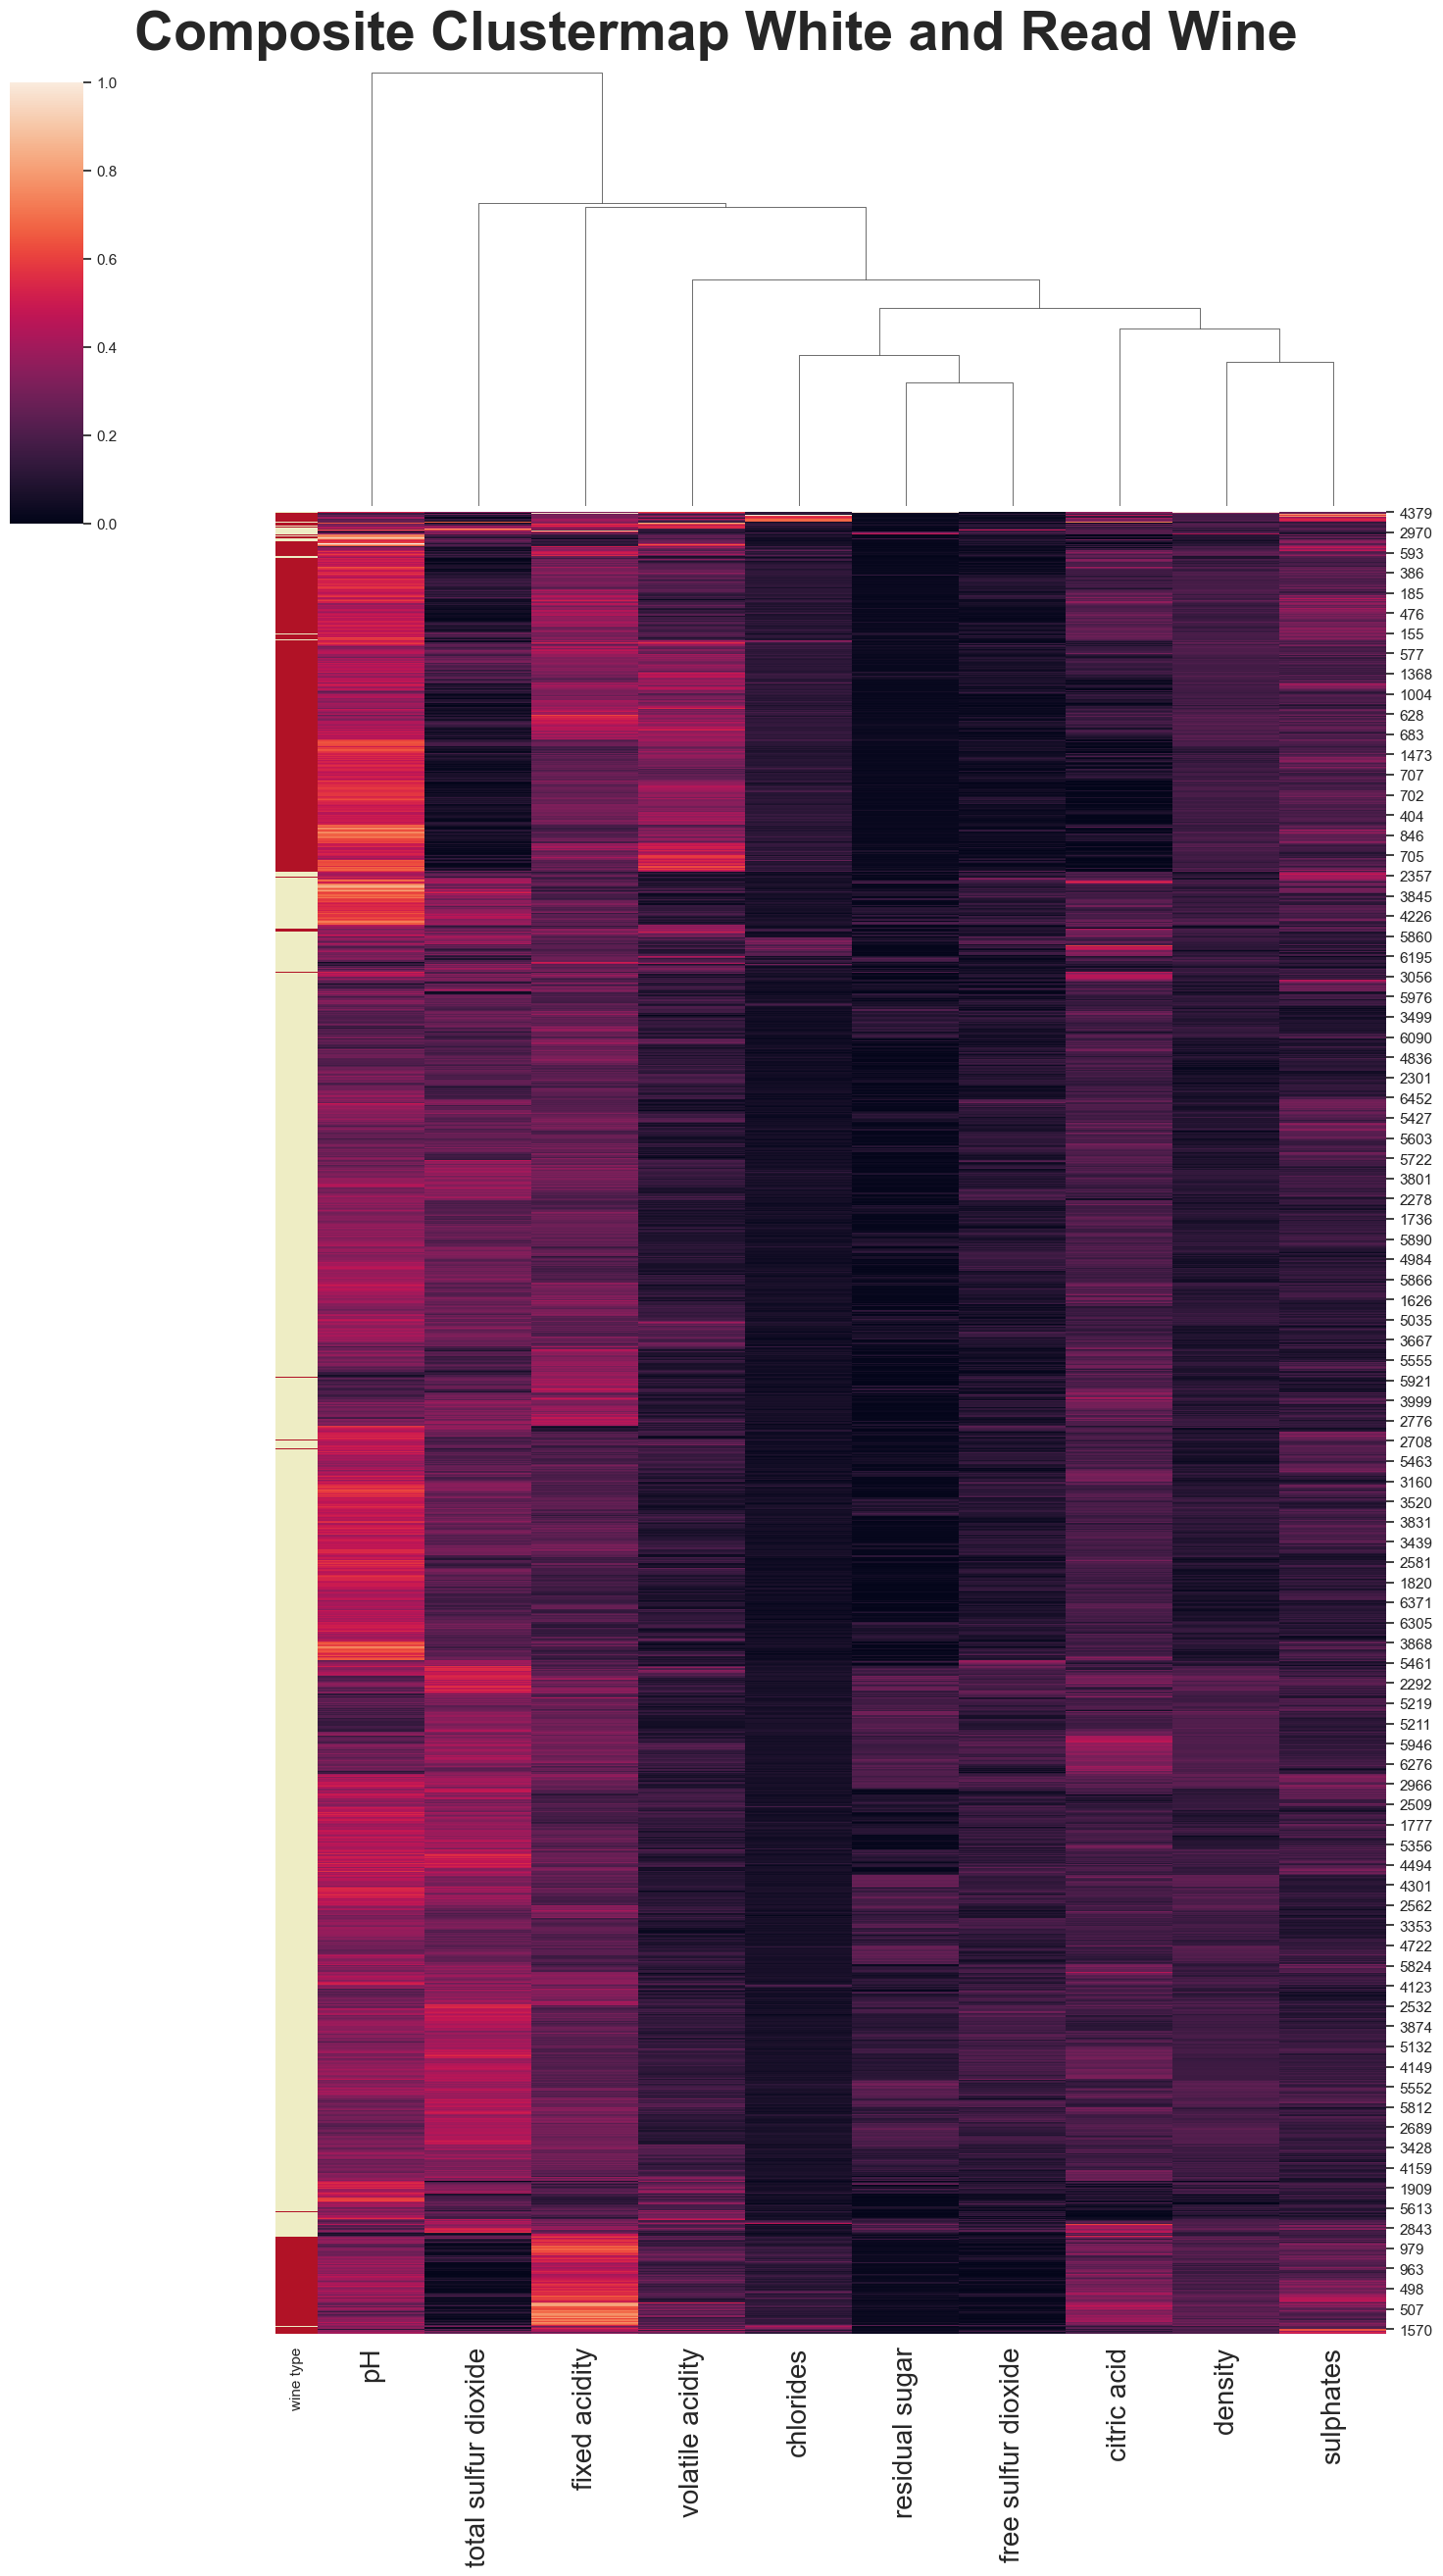

In [602]:
df_red_wine['color'] = 1
df_white_wine['color'] = 2

#create df for both types of wine
df_wine = pd.concat([df_red_wine, df_white_wine[1:]], axis=0).reset_index(drop=True)

#labeling
agerange = df_wine.pop("color")
lut = {1: "#b11226", 2: "#EEEDC4"}
row_colors = agerange.map(lut)
df_colors = pd.DataFrame(data={'wine type': row_colors})

#create the clustermap
fig =sns.clustermap(df_wine.iloc[:, :-2],  row_colors=df_colors, annot_kws={'size': 20}, 
               standard_scale=1, figsize=(15, 25))
fig.ax_row_dendrogram.set_visible(False)
#fig.ax_column_dendrogram.set_visible(False)

plt.suptitle('Composite Clustermap White and Read Wine', fontsize=40, y=1.01, weight ='bold')
plt.setp(fig.ax_heatmap.get_xticklabels(), fontsize=20)
plt.show()


# Regression  

## Function: evaluate_GS_model

**Parameters:**
*   `pipe` - the pipeline through which we pass
*   `X_train`, `y_train`, `X_test`, `y_test` - data
*   `classifier_params` - hyperparameters for the evaluated model
*   `pipeline_name`
*   `cv` - type of cross-validation (StratifiedKFold 5-fold)

We define a `GridSearchCV` refitting on `roc_auc`.
Fit the model.
Predict test data.
Extract the mean `roc_auc` from cross-validation.
Select the model with the best parameters.
Save the results to a dataframe.


- description of the cclusters
- model linear
- coef of features


#from mlinsights.mlmodel import PiecewiseRegressor


In [551]:
def evaluate_GS_model(
    pipe,
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    regression_params,
    pipeline_name,
    cv=KFold(n_splits=5),
    predict_test = True,
    predict_train = True,
    ):
    
    # define grid search
    grid_search_model = GridSearchCV(
        pipe,
        regression_params,
        cv=cv,
        scoring=["r2", "neg_mean_squared_error", "neg_median_absolute_error"],
        refit="neg_mean_squared_error",
        return_train_score=True,
        verbose=3,
    )

    # fit model
    grid_search_model.fit(X_train, y_train)

    # predict test data
    y_test_pred = grid_search_model.predict(X_test) if predict_test is True else None
    test_score = metrics.mean_squared_error(y_test, y_test_pred) if predict_test is True else None

    # predict train data
    y_train_pred = grid_search_model.predict(X_train) if predict_train is True else None
    train_score = metrics.mean_squared_error(y_train, y_train_pred) if predict_train is True else None 

    # extract mean cv scores
    mean_cv_score = grid_search_model.best_score_

    # extract splits scores
    cv_results_df = pd.DataFrame(grid_search_model.cv_results_).iloc[[grid_search_model.best_index_]]
    cv_splits_scores_df = cv_results_df.filter(regex=r"split\d*_test_mean_squared_error").reset_index(drop=True) 
    
    #getting scores based on the matrics define in the score
    metrics_results_df = cv_results_df.filter(regex=r"mean_test_*").reset_index(drop=True)

    best_estimator = grid_search_model.best_estimator_.named_steps[pipe.steps[-1][0]]

    coefficients = best_estimator.coef_
    intercept = best_estimator.intercept_

    # save results in dataframe
    this_result = pd.concat(
        [pd.DataFrame({
            "pipeline_name": [pipeline_name],
            "features": [X_test.columns],
            'coef': [coefficients], 
            "train score": [train_score],
            "mean_cv_score": [mean_cv_score],
            "test_score": [test_score],
            "best_model": [grid_search_model.best_estimator_],
            "parameters": [grid_search_model.best_params_],
            }),
            cv_splits_scores_df,
            metrics_results_df,
        ],
        axis=1) 

    #create evalian matrix
    parameters = np.append(intercept, coefficients)

    y_test_pred = intercept + np.dot(X_test, coefficients)
    newX = np.append(np.ones((len(X_test), 1)), X_test, axis=1)
    MSE = np.mean((y_test - y_test_pred)**2)

    var_b = MSE * np.linalg.inv(np.dot(newX.T, newX)).diagonal()
    sd_b = np.sqrt(var_b)
    ts_b = parameters / sd_b
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), len(newX) - len(newX[0]))) for i in ts_b]

    dataset_column_names = ['Intercept']
    dataset_column_names.extend(list(X_test.columns))

    #create df of  results
    evaluation_matrix_df = pd.DataFrame({
        'df': [pipeline_name for number in range(len(parameters))],
        "Parameters": pd.Series(dataset_column_names),
        "Coefficients": pd.Series(parameters),
        "Standard Errors": pd.Series(sd_b),
        "t values": pd.Series(ts_b),
        "p values": pd.Series(p_values)
    })
    return this_result, evaluation_matrix_df


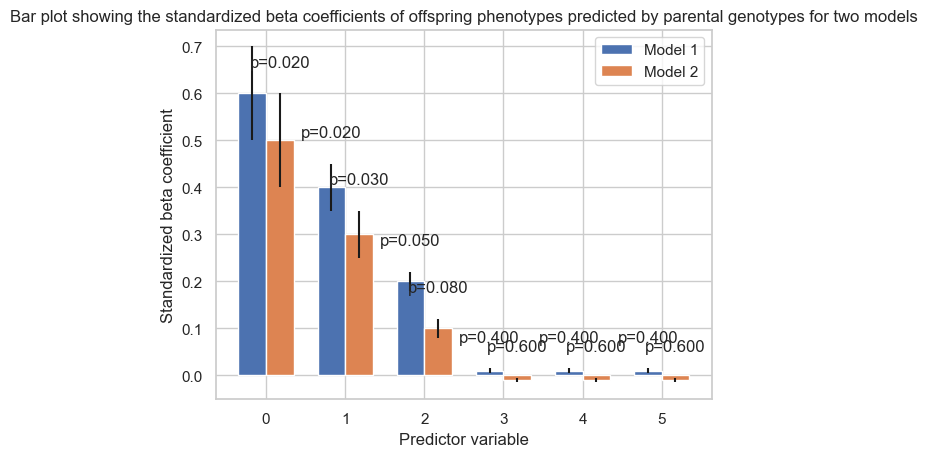

In [552]:
import matplotlib.pyplot as plt

# Data for Model 1
predictor_variables = ["Edu Years", "IQ", "GPA", "SOFT", "Height", "BMI"]
standardized_beta_coefficients_model1 = [0.6, 0.4, 0.2, 0.01, 0.01, 0.01]
standard_errors_model1 = [0.1, 0.05, 0.02, 0.005, 0.005, 0.005]
p_values_model1 = [0.01, 0.02, 0.05, 0.4, 0.4, 0.4]

# Data for Model 2
standardized_beta_coefficients_model2 = [0.5, 0.3, 0.1, -0.01, -0.01, -0.01]
standard_errors_model2 = [0.1, 0.05, 0.02, 0.005, 0.005, 0.005]
p_values_model2 = [0.02, 0.03, 0.08, 0.6, 0.6, 0.6]

# Create a grouped bar plot
x = np.arange(len(predictor_variables))  # the label locations
width = 0.35  # the width of the bars

# Plot Model 1
plt.bar(x - width/2, standardized_beta_coefficients_model1, width, label='Model 1', yerr=standard_errors_model1)

# Plot Model 2
plt.bar(x + width/2, standardized_beta_coefficients_model2, width, label='Model 2', yerr=standard_errors_model2 , )

# Set the x- and y-axis labels
plt.xlabel("Predictor variable")
plt.ylabel("Standardized beta coefficient")

# Set the title of the plot
plt.title("Bar plot showing the standardized beta coefficients of offspring phenotypes predicted by parental genotypes for two models")

# Add a legend
plt.legend()

# Add p-values above the bars
for i, (p_value_model1, p_value_model2) in enumerate(zip(p_values_model1, p_values_model2)):
    y_pos_model1 = standardized_beta_coefficients_model1[i] + standard_errors_model1[i] + 0.05
    y_pos_model2 = standardized_beta_coefficients_model2[i] + standard_errors_model2[i] + 0.05
    plt.annotate(f"p={p_value_model1:.3f}", (x[i] - width/2, y_pos_model1), ha='center', va='bottom')
    plt.annotate(f"p={p_value_model2:.3f}", (x[i] + width/2, y_pos_model2), ha='center', va='bottom')

# Add asterisks based on p-values
for i, p_value_model1 in enumerate(p_values_model1):
    x_pos = x[i] - width/2
    if p_value_model1 < 0.05:
        plt.annotate("*", (x_pos, 1.1), ha='center', va='bottom')
    elif p_value_model1 < 0.001:
        plt.annotate("***", (x_pos, 1.1), ha='center', va='bottom')

for i, p_value_model2 in enumerate(p_values_model2):
    x_pos = x[i] + width/2
    if p_value_model2 < 0.05:
        plt.annotate("*", (x_pos, 1.1), ha='center', va='bottom')
    elif p_value_model2 < 0.001:
        plt.annotate("***", (x_pos, 1.1), ha='center', va='bottom')

# Show the plot
plt.show()


In [682]:
df_white_good_without_outliers.shape

(3249, 13)

## Define Linear Models using pipelines

In [553]:
features = [top_features_dict, features_among_highly_associated_dict]

base_steps = [('scaler', StandardScaler())]
lr = ("lr", LinearRegression())
lr_params = dict(lr__fit_intercept=[True, False])

estimators = [(lr, lr_params)]

* For **y** we take the labels representing the quality of wine form 1 to 10 (1 the lowest score)
* For **X** we select the 8 psychomical features.
* The three pairs of the features that were highly correlated we chose the former, the later or the mean of both. 

3. Train-test split

In [554]:
def building_piplines(df_lists, test_size = 0.2, random_state = 42):
  '''
  Function that create the pipeline for each of the dataset 
  returns the the pipeline, dataframe with the scores evaluation matrics of coeficients.
  '''
  results_df = pd.DataFrame()
  evaluation_matrix_list = []

  #iterating through each dataset
  for dataset in df_lists:
    dataset_name = get_wine_str(dataset)

    #iterating through each feature list 
    for feature_set in features:
      
      # name the pipeline
      pipeline_name = f"Pipeline_{dataset_name}"
      pipeline_name =pipeline_name.replace( ' ', "_")
      print(pipeline_name)

      #create X and y sets
      y = dataset['quality']
      X = dataset[feature_set[dataset_name]]

      # train-test split
      X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=test_size, 
        random_state=random_state
      )

      #GridSearch 
      for (estimator, params) in estimators:
        print(f"Rating {estimator} \n")

        # create pipeline from base steps list and estimator
        pipe = Pipeline(base_steps + [estimator])

        #enter to grid search
        this_results, evaluation_matrix = evaluate_GS_model(
              pipe=pipe,
              pipeline_name=pipeline_name,
              X_train=X_train,
              y_train=y_train,
              X_test=X_test,
              y_test=y_test,
              regression_params=params,
              predict_test = True,
              predict_train = True,
              cv=StratifiedKFold(n_splits=5)
          )
        print(evaluation_matrix)
        results_df = pd.concat([results_df, this_results], ignore_index=True)

        evaluation_matrix_list.append([evaluation_matrix])

  return pipe, results_df, evaluation_matrix_list
      

In [555]:
pipe, results_df, evaluation_matrix_list = building_piplines(wine_quality_without_outliers_dfs)

Pipeline_White_Wine_Poor_(Without_Outliers)
Rating ('lr', LinearRegression()) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.113, test=-0.119) neg_median_absolute_error: (train=-0.118, test=-0.123) r2: (train=0.079, test=0.101) total time=   0.0s
[CV 2/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.110, test=-0.127) neg_median_absolute_error: (train=-0.121, test=-0.122) r2: (train=0.101, test=0.025) total time=   0.0s
[CV 3/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.113, test=-0.119) neg_median_absolute_error: (train=-0.119, test=-0.117) r2: (train=0.103, test=0.006) total time=   0.0s
[CV 4/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.115, test=-0.108) neg_median_absolute_error: (train=-0.117, test=-0.120) r2: (train=0.080, test=0.096) total time=   0.0s
[CV 5/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.115, test=-0.109)

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.310, test=-0.294) neg_median_absolute_error: (train=-0.396, test=-0.380) r2: (train=0.110, test=0.133) total time=   0.0s
[CV 1/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.027, test=-40.875) neg_median_absolute_error: (train=-6.188, test=-6.166) r2: (train=-117.378, test=-116.531) total time=   0.0s
[CV 2/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.035, test=-41.182) neg_median_absolute_error: (train=-6.182, test=-6.192) r2: (train=-117.365, test=-117.570) total time=   0.0s
[CV 3/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.036, test=-40.957) neg_median_absolute_error: (train=-6.174, test=-6.182) r2: (train=-117.367, test=-116.922) total time=   0.0s
[CV 4/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.023, test=-41.196) neg_median_absolute_error: (train=-6.178, test=-6.187) r2: (train=-117.738, test=-116.011) total time=   0.0s

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.312, test=-0.296) neg_median_absolute_error: (train=-0.406, test=-0.398) r2: (train=0.106, test=0.128) total time=   0.0s
[CV 1/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.029, test=-40.905) neg_median_absolute_error: (train=-6.191, test=-6.158) r2: (train=-117.384, test=-116.620) total time=   0.0s
[CV 2/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.037, test=-41.146) neg_median_absolute_error: (train=-6.180, test=-6.198) r2: (train=-117.369, test=-117.465) total time=   0.0s
[CV 3/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.037, test=-41.038) neg_median_absolute_error: (train=-6.182, test=-6.184) r2: (train=-117.370, test=-117.155) total time=   0.0s
[CV 4/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.024, test=-41.204) neg_median_absolute_error: (train=-6.183, test=-6.188) r2: (train=-117.741, test=-116.034) total time=   0.0s

In [556]:
#Coeficience: 
results_df
for i in range(len(evaluation_matrix_list)):
    print(evaluation_matrix_list[i][0])

                                            df            Parameters  \
0  Pipeline_White_Wine_Poor_(Without_Outliers)             Intercept   
1  Pipeline_White_Wine_Poor_(Without_Outliers)      volatile acidity   
2  Pipeline_White_Wine_Poor_(Without_Outliers)   free sulfur dioxide   
3  Pipeline_White_Wine_Poor_(Without_Outliers)        residual sugar   
4  Pipeline_White_Wine_Poor_(Without_Outliers)               alcohol   
5  Pipeline_White_Wine_Poor_(Without_Outliers)  total sulfur dioxide   
6  Pipeline_White_Wine_Poor_(Without_Outliers)         fixed acidity   
7  Pipeline_White_Wine_Poor_(Without_Outliers)               density   
8  Pipeline_White_Wine_Poor_(Without_Outliers)           citric acid   

   Coefficients  Standard Errors  t values  p values  
0      4.879481       619.075800  0.007882  0.993716  
1     -0.056628         1.373506 -0.041229  0.967139  
2      0.015317         0.033378  0.458901  0.646617  
3      0.131678         0.231584  0.568597  0.570030  
4   

In [557]:
results_df

pipeline_name  \
0  Pipeline_White_Wine_Poor_(Without_Outliers)   
1  Pipeline_White_Wine_Poor_(Without_Outliers)   
2  Pipeline_White_Wine_Good_(Without_Outliers)   
3  Pipeline_White_Wine_Good_(Without_Outliers)   
4    Pipeline_Red_Wine_Poor_(Without_Outliers)   
5    Pipeline_Red_Wine_Poor_(Without_Outliers)   
6    Pipeline_Red_Wine_Good_(Without_Outliers)   
7    Pipeline_Red_Wine_Good_(Without_Outliers)   

                                            features  \
0  Index(['volatile acidity', 'free sulfur dioxid...   
1  Index(['volatile acidity', 'free sulfur dioxid...   
2  Index(['alcohol', 'density', 'chlorides', 'tot...   
3  Index(['alcohol', 'total sulfur dioxide', 'res...   
4  Index(['volatile acidity', 'total sulfur dioxi...   
5  Index(['volatile acidity', 'total sulfur dioxi...   
6  Index(['alcohol', 'volatile acidity', 'sulphat...   
7  Index(['alcohol', 'volatile acidity', 'sulphat...   

                                                coef  train score  \
0  [-0.05662777410509342, 0.015317106106095626, 0...     0.113560   
1  [-0.05533000644090073, 0.04206670093453943, 0....     0.114639   
2  [0.024614917690020183, -0.3292139466777053, -0...     0.307169   
3  [0.22304773376286377, -0.0006316284424224342, ...     0.308438   
4  [-0.09380413224263705, 0.05944970058431021, -0...     0.107157   
5  [-0.09317862353644546, 0.05838839678087418, -0...     0.107102   
6  [0.12993460890703012, -0.030543707212247334, 0...     0.201659   
7  [0.141149011388793, -0.05432854948125726, 0.08...     0.200922   

   mean_cv_score  test_score                              best_model  \
0      -0.116368    0.150458  (StandardScaler(), LinearRegression())   
1      -0.117049    0.151447  (StandardScaler(), LinearRegression())   
2      -0.308105    0.329853  (StandardScaler(), LinearRegression())   
3      -0.309216    0.334401  (StandardScaler(), LinearRegression())   
4      -0.111639    0.085281  (StandardScaler(), LinearRegression())   
5      -0.112291    0.084388  (StandardScaler(), LinearRegression())   
6      -0.207719    0.147937  (StandardScaler(), LinearRegression())   
7      -0.206416    0.146568  (StandardScaler(), LinearRegression())   

                    parameters  mean_test_r2  \
0  {'lr__fit_intercept': True}      0.063590   
1  {'lr__fit_intercept': True}      0.058513   
2  {'lr__fit_intercept': True}      0.111671   
3  {'lr__fit_intercept': True}      0.108471   
4  {'lr__fit_intercept': True}      0.054802   
5  {'lr__fit_intercept': True}      0.049212   
6  {'lr__fit_intercept': True}      0.169862   
7  {'lr__fit_intercept': True}      0.175113   

   mean_test_neg_mean_squared_error  mean_test_neg_median_absolute_error  
0                         -0.116368                            -0.118015  
1                         -0.117049                            -0.128203  
2                         -0.308105                            -0.391074  
3                         -0.309216                            -0.403763  
4                         -0.111639                            -0.100340  
5                         -0.112291                            -0.102144  
6                         -0.207719                            -0.314700  
7                         -0.206416                            -0.308385

## Significant Statement

## Conclusion & Discussions

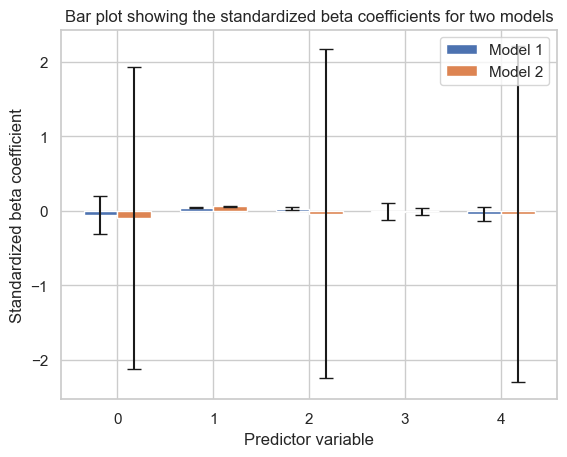

In [751]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming evaluation_matrix_list is your list of dictionaries
# Extracting values for Model 1
model1_data = evaluation_matrix_list[1][0].iloc[1:6]
predictor_variables_model1 = model1_data["Parameters"]
coefficients_model1 = model1_data["Coefficients"]
standard_errors_model1 = model1_data["Standard Errors"]
p_values_model1 = model1_data["p values"]

# Extracting values for Model 2
model2_data = evaluation_matrix_list[4][0].iloc[1:6]
predictor_variables_model2 = model2_data["Parameters"]
coefficients_model2 = model2_data["Coefficients"]
standard_errors_model2 = model2_data["Standard Errors"]
p_values_model2 = model2_data["p values"]

# Create a grouped bar plot
x = np.arange(len(predictor_variables_model1))  # the label locations
width = 0.35  # the width of the bars

# Plot Model 1
plt.bar(x - width/2, coefficients_model1, width, label='Model 1', yerr=standard_errors_model1, capsize=5)

# Plot Model 2
plt.bar(x + width/2, coefficients_model2, width, label='Model 2', yerr=standard_errors_model2, capsize=5)

# Set the x- and y-axis labels
plt.xlabel("Predictor variable")
plt.ylabel("Standardized beta coefficient")

# Set the title of the plot
plt.title("Bar plot showing the standardized beta coefficients for two models")

# Add a legend
plt.legend()


# Show the plot
plt.show()


1    Pipeline_White_Wine_Good_(Without_Outliers)
2    Pipeline_White_Wine_Good_(Without_Outliers)
3    Pipeline_White_Wine_Good_(Without_Outliers)
4    Pipeline_White_Wine_Good_(Without_Outliers)
5    Pipeline_White_Wine_Good_(Without_Outliers)
6    Pipeline_White_Wine_Good_(Without_Outliers)
7    Pipeline_White_Wine_Good_(Without_Outliers)
8    Pipeline_White_Wine_Good_(Without_Outliers)
Name: df, dtype: object
1    Pipeline_Red_Wine_Poor_(Without_Outliers)
2    Pipeline_Red_Wine_Poor_(Without_Outliers)
3    Pipeline_Red_Wine_Poor_(Without_Outliers)
4    Pipeline_Red_Wine_Poor_(Without_Outliers)
5    Pipeline_Red_Wine_Poor_(Without_Outliers)
6    Pipeline_Red_Wine_Poor_(Without_Outliers)
7    Pipeline_Red_Wine_Poor_(Without_Outliers)
8    Pipeline_Red_Wine_Poor_(Without_Outliers)
Name: df, dtype: object


C:\Users\zosia\AppData\Local\Temp\ipykernel_4272\1459078154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1_data['Coefficients'] = model1_data["Coefficients"].abs()
C:\Users\zosia\AppData\Local\Temp\ipykernel_4272\1459078154.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model2_data['Coefficients'] = model2_data["Coefficients"].abs()


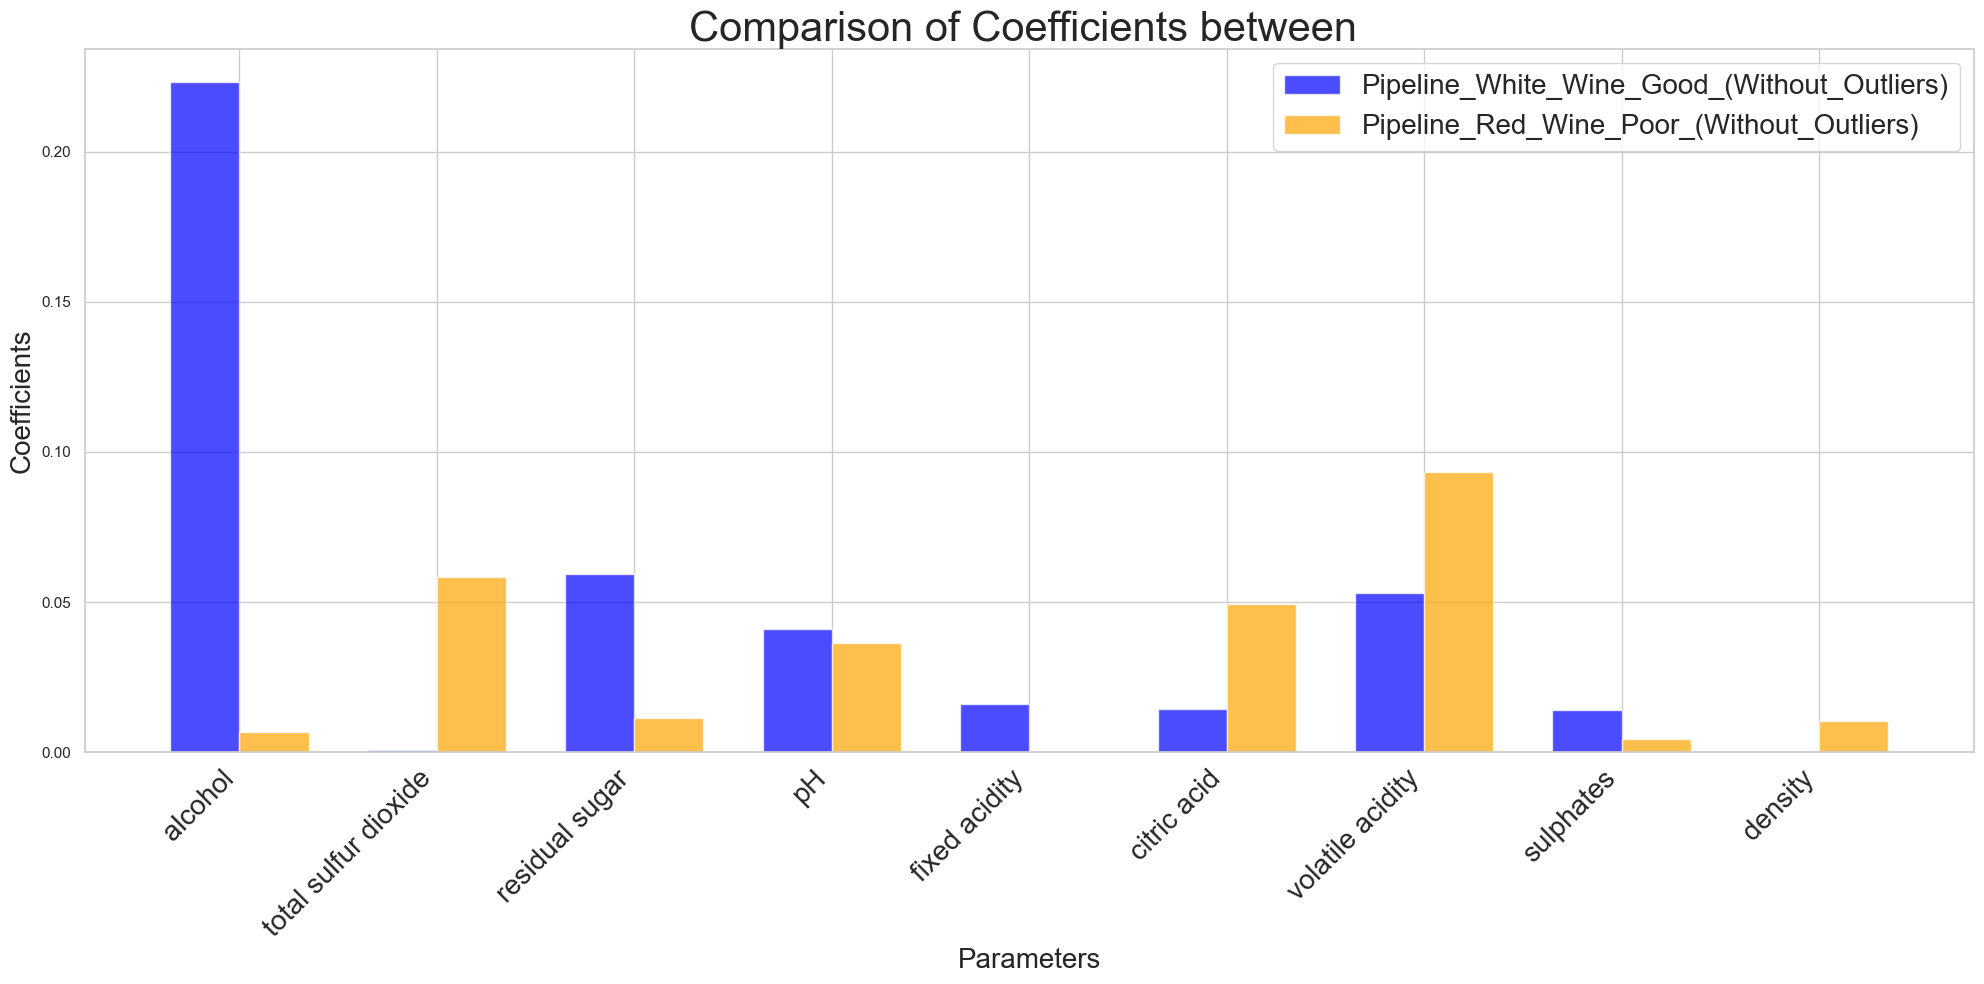

"\n# Bar plot\nfig, ax = plt.subplots(figsize=(10, 6))\n\nbar_width = 0.35\nbar_positions_model1 = np.arange(len(predictor_variables_model1))\nbar_positions_model2 = [pos + bar_width for pos in bar_positions_model1]\n\n# Plot Model 1\nax.bar(bar_positions_model1, coefficients_model1,  label=model1_data['df'][1], width=bar_width, color='blue', alpha=0.7)\n\n# Plot Model 2\nax.bar(bar_positions_model2, coefficients_model2,  label=model2_data['df'][1],  width=bar_width, color='green', alpha=0.7)\n\n# Customize the x-axis\nax.set_xticks([pos + bar_width/2 for pos in bar_positions_model1])\n\nax.set_xticklabels(predictor_variables_model1, rotation=45, ha='right', fontsize=20)\nax.set_xlabel('Predictor Variables', fontsize=14)\nax.set_ylabel('|Coefficients|', fontsize=14)\nax.set_title('Comparison of Coefficients between Model 1 and Model 2', fontsize=16)\nax.legend(loc='upper left')\n\nplt.show()"

In [784]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Model 1
model1_data = evaluation_matrix_list[3][0].iloc[1:]
model1_data['Coefficients'] = model1_data["Coefficients"].abs()
model1_data.sort_values(by='Coefficients', ascending=False).reset_index(drop=True)
model1_data = model1_data.iloc[:]



coefficients_model1 = model1_data["Coefficients"]
standard_errors_model1 = model1_data["Standard Errors"]
predictor_variables_model1 = model1_data["Parameters"]

# Data for Model 2
model2_data = evaluation_matrix_list[5][0].iloc[1:]
model2_data['Coefficients'] = model2_data["Coefficients"].abs()
model2_data .sort_values('Coefficients', ascending=False).reset_index(drop=True)
model2_data = model2_data.iloc[:]
coefficients_model2 = model2_data["Coefficients"]
standard_errors_model2 = model2_data["Standard Errors"]
predictor_variables_model2 = model2_data["Parameters"]
print(model1_data["df"])
print(model2_data["df"])

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming model1_data and model2_data are DataFrames with the necessary columns

# Merge data frames on the common column (e.g., "Parameters")
merged_data = pd.merge(model1_data, model2_data, on="Parameters", how="outer", suffixes=('_model1', '_model2'))

# Fill NaN values with 0 for parameters that are unique to one model
merged_data = merged_data.fillna(0)

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Set the width of the bars
bar_width = 0.35

# Calculate the position for each group of bars
index = np.arange(len(merged_data["Parameters"]))

# Plot coefficients for Model 1
plt.bar(index - bar_width/2, merged_data["Coefficients_model1"], bar_width, label=model1_data['df'][2], color='blue', alpha=0.7)
plt.errorbar(index - bar_width/2, merged_data["Coefficients_model1"],
             #yerr=merged_data["Standard Errors_model1"], 
             fmt='none', ecolor='black', capsize=5)

# Plot coefficients for Model 2
plt.bar(index + bar_width/2, merged_data["Coefficients_model2"], bar_width, label=model2_data['df'][2], color='orange', alpha=0.7)
plt.errorbar(index + bar_width/2, merged_data["Coefficients_model2"],
             #yerr=merged_data["Standard Errors_model2"], 
             fmt='none', ecolor='black', capsize=5)

# Set labels and title
plt.xlabel('Parameters', fontsize=20)
plt.ylabel('Coefficients', fontsize=20)
plt.title(f'Comparison of Coefficients between ', fontsize=30)
plt.legend(fontsize=20)

# Set x-axis ticks and labels
plt.xticks(index, merged_data["Parameters"], rotation=45, ha='right', fontsize = 20)

# Show the plot
plt.tight_layout()
plt.show()




'''
# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_model1 = np.arange(len(predictor_variables_model1))
bar_positions_model2 = [pos + bar_width for pos in bar_positions_model1]

# Plot Model 1
ax.bar(bar_positions_model1, coefficients_model1,  label=model1_data['df'][1], width=bar_width, color='blue', alpha=0.7)

# Plot Model 2
ax.bar(bar_positions_model2, coefficients_model2,  label=model2_data['df'][1],  width=bar_width, color='green', alpha=0.7)

# Customize the x-axis
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_model1])

ax.set_xticklabels(predictor_variables_model1, rotation=45, ha='right', fontsize=20)
ax.set_xlabel('Predictor Variables', fontsize=14)
ax.set_ylabel('|Coefficients|', fontsize=14)
ax.set_title('Comparison of Coefficients between Model 1 and Model 2', fontsize=16)
ax.legend(loc='upper left')

plt.show()'''


In [660]:
evaluation_matrix_list[3][0]['Coefficients'] = evaluation_matrix_list[3][0]['Coefficients'].abs()
evaluation_matrix_list[3][0].iloc[1:].sort_values('Coefficients').reset_index(drop=True)


df            Parameters  \
0  Pipeline_White_Wine_Good_(Without_Outliers)  total sulfur dioxide   
1  Pipeline_White_Wine_Good_(Without_Outliers)             sulphates   
2  Pipeline_White_Wine_Good_(Without_Outliers)           citric acid   
3  Pipeline_White_Wine_Good_(Without_Outliers)         fixed acidity   
4  Pipeline_White_Wine_Good_(Without_Outliers)                    pH   
5  Pipeline_White_Wine_Good_(Without_Outliers)      volatile acidity   
6  Pipeline_White_Wine_Good_(Without_Outliers)        residual sugar   
7  Pipeline_White_Wine_Good_(Without_Outliers)               alcohol   

   Coefficients  Standard Errors  t values  p values  
0      0.000632         0.003692 -0.171077  0.864217  
1      0.014167         0.993612  0.014258  0.988629  
2      0.014402         1.217497 -0.011829  0.990566  
3      0.016001         0.162387  0.098535  0.921538  
4      0.041083         0.860054  0.047767  0.961917  
5      0.052920         0.410197 -0.129011  0.897390  
6      0.059461         0.031844  1.867262  0.062321  
7      0.223048         0.122430  1.821837  0.068946

In [663]:
evaluation_matrix_list[5][0]['Coefficients']=evaluation_matrix_list[5][0]['Coefficients'].abs()
evaluation_matrix_list[5][0].iloc[1:].sort_values('Coefficients').reset_index(drop=True)
#evaluation_matrix_list[5][0]['Standard Errors'].replace(279.740399, 0.2)


df            Parameters  \
0  Pipeline_Red_Wine_Poor_(Without_Outliers)             sulphates   
1  Pipeline_Red_Wine_Poor_(Without_Outliers)               alcohol   
2  Pipeline_Red_Wine_Poor_(Without_Outliers)               density   
3  Pipeline_Red_Wine_Poor_(Without_Outliers)        residual sugar   
4  Pipeline_Red_Wine_Poor_(Without_Outliers)                    pH   
5  Pipeline_Red_Wine_Poor_(Without_Outliers)           citric acid   
6  Pipeline_Red_Wine_Poor_(Without_Outliers)  total sulfur dioxide   
7  Pipeline_Red_Wine_Poor_(Without_Outliers)      volatile acidity   

   Coefficients  Standard Errors  t values      p values  
0      0.004404         1.893610  0.002326  9.981477e-01  
1      0.006712         0.542577  0.012370  9.901480e-01  
2      0.010471       279.740399  0.000037  9.999702e-01  
3      0.011306         1.281565 -0.008822  9.929739e-01  
4      0.036273         2.269050 -0.015986  9.872682e-01  
5      0.049256         2.300936 -0.021407  9.829516e-01  
6      0.058388         0.008896  6.563151  9.501808e-10  
7      0.093179         2.043423 -0.045599  9.636946e-01

In [562]:
dataframe[0]['df'][1]

'Pipeline_Red_Wine_Good_(Without_Outliers)'

In [563]:



def identyfy_three_importnat_features(evaluation_matrix_list): 
    result_dict = {}
    # Iterate through unique dataframes
    for dataframe in evaluation_matrix_list:
        

        df_subset = dataframe[0].iloc[1:].copy()
        df_subset['Coefficients'] = df_subset['Coefficients'].abs()
        
        # Sort the subset based on coefficients in descending order
        sorted_subset = df_subset.sort_values(by='Coefficients', ascending=False).reset_index(drop=True)
        print(sorted_subset)
        # Select the top three important features
        top_three_features = sorted_subset['Parameters'].loc[:2:].tolist()
        print(top_three_features)    
        # Create a dictionary entry for the current dataframe
        result_dict[dataframe[0]['df'][1]] = top_three_features

return result_dict






SyntaxError: 'return' outside function (3954851250.py, line 19)

ConversionError: Failed to convert value(s) to axis units: 1        volatile acidity
2    total sulfur dioxide
3                      pH
4             citric acid
5                 alcohol
6               sulphates
7                 density
8          residual sugar
Name: Parameters, dtype: object

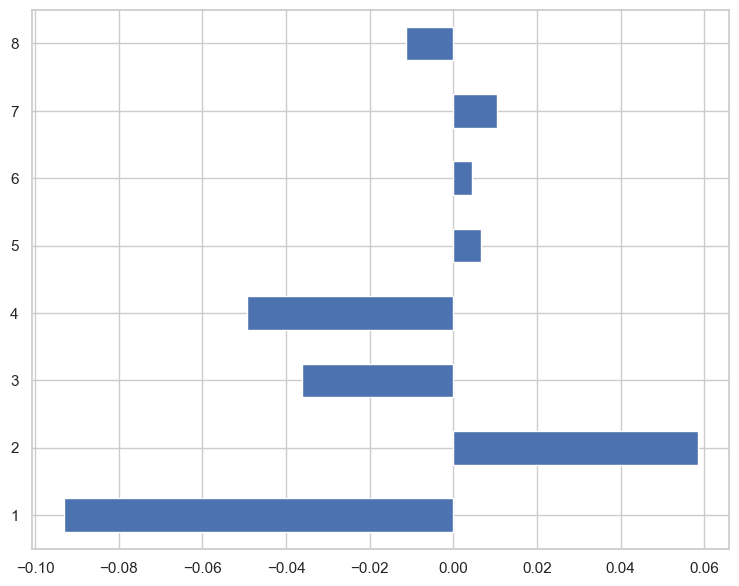

In [ ]:
coefs = evaluation_matrix_list[5][0].iloc[1:]['Coefficients']

coefs.plot(kind="barh", figsize=(9, 7))
plt.xticks(evaluation_matrix_list[5][0].iloc[1:]['Parameters'])
plt.title("Ridge model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)